In [ ]:
import os
DEVELOPMENT_MODE = False


try:
    import google.colab
    IN_COLAB = True
    print("Running as a Colab notebook")
except ImportError:
    IN_COLAB = False


if IN_COLAB:
    print("This code is not designed for local execution when in Google Colab")


if not IN_COLAB:
    from IPython import get_ipython
    ip = get_ipython()
    if not ip.extension_manager.loaded:
        ip.extension_manager.load('autoreload')
        ip.run_line_magic("autoreload", "2")

IN_GITHUB = os.getenv("GITHUB_ACTIONS") == "true"


print(f"IN_COLAB: {IN_COLAB}")
print(f"IN_GITHUB: {IN_GITHUB}")


IN_COLAB: False
IN_GITHUB: False


In [ ]:

import plotly.io as pio


try:
    import google.colab
    IN_COLAB = True
    print("Running as a Colab notebook")
except ImportError:
    IN_COLAB = False


if IN_COLAB:
    pio.renderers.default = "colab"
else:
    
    pio.renderers.default = "notebook_connected"

print(f"Using renderer: {pio.renderers.default}")


Using renderer: notebook_connected


In [ ]:
import circuitsvis as cv

cv.examples.hello("Neel")

In [ ]:

import torch
import torch.nn as nn
import einops
from fancy_einsum import einsum
import tqdm.auto as tqdm
import plotly.express as px

from jaxtyping import Float
from functools import partial

In [ ]:

import transformer_lens.utils as utils
from transformer_lens.hook_points import (
    HookPoint,
    
)  
from transformer_lens import HookedTransformer, FactoredMatrix

In [7]:
def imshow(tensor, renderer=None, xaxis="", yaxis="", **kwargs):
    px.imshow(utils.to_numpy(tensor), color_continuous_midpoint=0.0, color_continuous_scale="RdBu", labels={"x":xaxis, "y":yaxis}, **kwargs).show(renderer)

def line(tensor, renderer=None, xaxis="", yaxis="", **kwargs):
    px.line(utils.to_numpy(tensor), labels={"x":xaxis, "y":yaxis}, **kwargs).show(renderer)

def scatter(x, y, xaxis="", yaxis="", caxis="", renderer=None, **kwargs):
    x = utils.to_numpy(x)
    y = utils.to_numpy(y)
    px.scatter(y=y, x=x, labels={"x":xaxis, "y":yaxis, "color":caxis}, **kwargs).show(renderer)

In [8]:
device = utils.get_device()

Moving model to device:  cuda


Epochs:   1%|          | 3/250 [00:03<04:48,  1.17s/it]

Epoch 4, Step 100, Samples 128, Loss 2.1677839756011963


Epochs:   2%|▏         | 6/250 [00:06<04:39,  1.15s/it]

Epoch 7, Step 200, Samples 256, Loss 1.5463385581970215


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_200.pt


Epochs:   4%|▎         | 9/250 [00:10<04:44,  1.18s/it]

Epoch 10, Step 300, Samples 384, Loss 1.1901048421859741


Epochs:   5%|▍         | 12/250 [00:14<04:41,  1.18s/it]

Epoch 13, Step 400, Samples 512, Loss 1.1625144481658936


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_400.pt


Epochs:   6%|▌         | 15/250 [00:18<04:44,  1.21s/it]

Epoch 16, Step 500, Samples 640, Loss 1.1311931610107422


Epochs:   7%|▋         | 18/250 [00:21<04:39,  1.20s/it]

Epoch 19, Step 600, Samples 768, Loss 1.1733386516571045


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_600.pt


Epochs:   9%|▉         | 22/250 [00:26<04:32,  1.20s/it]

Epoch 22, Step 700, Samples 896, Loss 1.1477720737457275


Epochs:  10%|▉         | 24/250 [00:29<04:29,  1.19s/it]

Epoch 25, Step 800, Samples 1000, Loss 1.1616218090057373


Epochs:  10%|█         | 25/250 [00:30<04:43,  1.26s/it]

Saved model checkpoint at model_checkpoints_mlp_2l/model_step_800.pt


Epochs:  11%|█         | 28/250 [00:34<04:27,  1.21s/it]

Epoch 29, Step 900, Samples 128, Loss 1.1053389310836792


Epochs:  12%|█▏        | 31/250 [00:37<04:26,  1.22s/it]

Epoch 32, Step 1000, Samples 256, Loss 1.0819449424743652


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_1000.pt


Epochs:  14%|█▎        | 34/250 [00:41<04:24,  1.22s/it]

Epoch 35, Step 1100, Samples 384, Loss 1.1587109565734863


Epochs:  15%|█▍        | 37/250 [00:45<04:17,  1.21s/it]

Epoch 38, Step 1200, Samples 512, Loss 1.1024501323699951


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_1200.pt


Epochs:  16%|█▌        | 40/250 [00:49<04:21,  1.24s/it]

Epoch 41, Step 1300, Samples 640, Loss 1.0470678806304932


Epochs:  17%|█▋        | 43/250 [00:52<04:15,  1.24s/it]

Epoch 44, Step 1400, Samples 768, Loss 1.0773853063583374


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_1400.pt


Epochs:  19%|█▉        | 47/250 [00:57<04:20,  1.28s/it]

Epoch 47, Step 1500, Samples 896, Loss 1.1112842559814453


Epochs:  20%|█▉        | 49/250 [01:00<04:09,  1.24s/it]

Epoch 50, Step 1600, Samples 1000, Loss 1.083984136581421


Epochs:  20%|██        | 50/250 [01:01<04:19,  1.30s/it]

Saved model checkpoint at model_checkpoints_mlp_2l/model_step_1600.pt


Epochs:  21%|██        | 53/250 [01:05<04:05,  1.25s/it]

Epoch 54, Step 1700, Samples 128, Loss 1.0268871784210205


Epochs:  22%|██▏       | 56/250 [01:08<03:56,  1.22s/it]

Epoch 57, Step 1800, Samples 256, Loss 1.0498523712158203


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_1800.pt


Epochs:  24%|██▎       | 59/250 [01:12<04:01,  1.26s/it]

Epoch 60, Step 1900, Samples 384, Loss 1.0776402950286865


Epochs:  25%|██▍       | 62/250 [01:16<03:46,  1.20s/it]

Epoch 63, Step 2000, Samples 512, Loss 1.1310670375823975


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_2000.pt


Epochs:  26%|██▌       | 65/250 [01:20<03:50,  1.25s/it]

Epoch 66, Step 2100, Samples 640, Loss 1.1302917003631592


Epochs:  27%|██▋       | 68/250 [01:23<03:36,  1.19s/it]

Epoch 69, Step 2200, Samples 768, Loss 1.0679337978363037


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_2200.pt


Epochs:  29%|██▉       | 72/250 [01:28<03:43,  1.25s/it]

Epoch 72, Step 2300, Samples 896, Loss 1.0592437982559204


Epochs:  30%|██▉       | 74/250 [01:31<03:33,  1.21s/it]

Epoch 75, Step 2400, Samples 1000, Loss 1.0350618362426758


Epochs:  30%|███       | 75/250 [01:32<03:52,  1.33s/it]

Saved model checkpoint at model_checkpoints_mlp_2l/model_step_2400.pt


Epochs:  31%|███       | 78/250 [01:36<03:35,  1.25s/it]

Epoch 79, Step 2500, Samples 128, Loss 0.9934194087982178


Epochs:  32%|███▏      | 81/250 [01:39<03:23,  1.21s/it]

Epoch 82, Step 2600, Samples 256, Loss 1.0365475416183472


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_2600.pt


Epochs:  34%|███▎      | 84/250 [01:43<03:21,  1.21s/it]

Epoch 85, Step 2700, Samples 384, Loss 1.1126792430877686


Epochs:  35%|███▍      | 87/250 [01:47<03:14,  1.19s/it]

Epoch 88, Step 2800, Samples 512, Loss 1.022018313407898


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_2800.pt


Epochs:  36%|███▌      | 90/250 [01:51<03:17,  1.24s/it]

Epoch 91, Step 2900, Samples 640, Loss 1.029412031173706


Epochs:  37%|███▋      | 93/250 [01:54<03:09,  1.21s/it]

Epoch 94, Step 3000, Samples 768, Loss 1.0962028503417969


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_3000.pt


Epochs:  39%|███▉      | 97/250 [01:59<03:07,  1.23s/it]

Epoch 97, Step 3100, Samples 896, Loss 1.1194199323654175


Epochs:  40%|███▉      | 99/250 [02:02<03:05,  1.23s/it]

Epoch 100, Step 3200, Samples 1000, Loss 1.0644668340682983


Epochs:  40%|████      | 100/250 [02:03<03:13,  1.29s/it]

Saved model checkpoint at model_checkpoints_mlp_2l/model_step_3200.pt


Epochs:  41%|████      | 103/250 [02:07<03:01,  1.23s/it]

Epoch 104, Step 3300, Samples 128, Loss 0.9931117296218872


Epochs:  42%|████▏     | 106/250 [02:11<02:56,  1.23s/it]

Epoch 107, Step 3400, Samples 256, Loss 1.0304388999938965


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_3400.pt


Epochs:  44%|████▎     | 109/250 [02:15<02:57,  1.26s/it]

Epoch 110, Step 3500, Samples 384, Loss 1.0683088302612305


Epochs:  45%|████▍     | 112/250 [02:18<02:51,  1.25s/it]

Epoch 113, Step 3600, Samples 512, Loss 1.0571781396865845


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_3600.pt


Epochs:  46%|████▌     | 115/250 [02:22<02:49,  1.26s/it]

Epoch 116, Step 3700, Samples 640, Loss 1.0745534896850586


Epochs:  47%|████▋     | 118/250 [02:26<02:39,  1.21s/it]

Epoch 119, Step 3800, Samples 768, Loss 1.1049273014068604


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_3800.pt


Epochs:  49%|████▉     | 122/250 [02:31<02:38,  1.24s/it]

Epoch 122, Step 3900, Samples 896, Loss 1.090524435043335


Epochs:  50%|████▉     | 124/250 [02:33<02:39,  1.27s/it]

Epoch 125, Step 4000, Samples 1000, Loss 1.0261754989624023


Epochs:  50%|█████     | 125/250 [02:35<02:44,  1.32s/it]

Saved model checkpoint at model_checkpoints_mlp_2l/model_step_4000.pt


Epochs:  51%|█████     | 128/250 [02:39<02:34,  1.27s/it]

Epoch 129, Step 4100, Samples 128, Loss 1.0613807439804077


Epochs:  52%|█████▏    | 131/250 [02:42<02:30,  1.27s/it]

Epoch 132, Step 4200, Samples 256, Loss 1.0347156524658203


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_4200.pt


Epochs:  54%|█████▎    | 134/250 [02:46<02:28,  1.28s/it]

Epoch 135, Step 4300, Samples 384, Loss 1.048111081123352


Epochs:  55%|█████▍    | 137/250 [02:50<02:24,  1.28s/it]

Epoch 138, Step 4400, Samples 512, Loss 1.0985625982284546


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_4400.pt


Epochs:  56%|█████▌    | 140/250 [02:54<02:20,  1.27s/it]

Epoch 141, Step 4500, Samples 640, Loss 1.1190755367279053


Epochs:  57%|█████▋    | 143/250 [02:58<02:11,  1.23s/it]

Epoch 144, Step 4600, Samples 768, Loss 1.0597357749938965


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_4600.pt


Epochs:  59%|█████▉    | 147/250 [03:03<02:07,  1.24s/it]

Epoch 147, Step 4700, Samples 896, Loss 1.051905632019043


Epochs:  60%|█████▉    | 149/250 [03:05<02:01,  1.21s/it]

Epoch 150, Step 4800, Samples 1000, Loss 1.025470495223999


Epochs:  60%|██████    | 150/250 [03:07<02:09,  1.30s/it]

Saved model checkpoint at model_checkpoints_mlp_2l/model_step_4800.pt


Epochs:  61%|██████    | 153/250 [03:10<02:01,  1.25s/it]

Epoch 154, Step 4900, Samples 128, Loss 1.0469555854797363


Epochs:  62%|██████▏   | 156/250 [03:14<01:55,  1.23s/it]

Epoch 157, Step 5000, Samples 256, Loss 1.026619553565979


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_5000.pt


Epochs:  64%|██████▎   | 159/250 [03:18<01:55,  1.27s/it]

Epoch 160, Step 5100, Samples 384, Loss 1.0452452898025513


Epochs:  65%|██████▍   | 162/250 [03:21<01:48,  1.24s/it]

Epoch 163, Step 5200, Samples 512, Loss 1.069824457168579


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_5200.pt


Epochs:  66%|██████▌   | 165/250 [03:25<01:46,  1.25s/it]

Epoch 166, Step 5300, Samples 640, Loss 1.0465173721313477


Epochs:  67%|██████▋   | 168/250 [03:29<01:38,  1.20s/it]

Epoch 169, Step 5400, Samples 768, Loss 1.0797450542449951


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_5400.pt


Epochs:  69%|██████▉   | 172/250 [03:34<01:39,  1.27s/it]

Epoch 172, Step 5500, Samples 896, Loss 1.0818592309951782


Epochs:  70%|██████▉   | 174/250 [03:36<01:33,  1.22s/it]

Epoch 175, Step 5600, Samples 1000, Loss 1.0571818351745605


Epochs:  70%|███████   | 175/250 [03:38<01:39,  1.32s/it]

Saved model checkpoint at model_checkpoints_mlp_2l/model_step_5600.pt


Epochs:  71%|███████   | 178/250 [03:42<01:31,  1.27s/it]

Epoch 179, Step 5700, Samples 128, Loss 1.0006017684936523


Epochs:  72%|███████▏  | 181/250 [03:45<01:23,  1.21s/it]

Epoch 182, Step 5800, Samples 256, Loss 1.081006646156311


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_5800.pt


Epochs:  74%|███████▎  | 184/250 [03:49<01:22,  1.25s/it]

Epoch 185, Step 5900, Samples 384, Loss 1.056549072265625


Epochs:  75%|███████▍  | 187/250 [03:53<01:16,  1.22s/it]

Epoch 188, Step 6000, Samples 512, Loss 1.0568348169326782


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_6000.pt


Epochs:  76%|███████▌  | 190/250 [03:57<01:14,  1.24s/it]

Epoch 191, Step 6100, Samples 640, Loss 1.0794122219085693


Epochs:  77%|███████▋  | 193/250 [04:00<01:09,  1.22s/it]

Epoch 194, Step 6200, Samples 768, Loss 1.055027961730957


Saved model checkpoint at model_checkpoints_mlp_2l/model_step_6200.pt


Epochs:  79%|███████▉  | 197/250 [04:06<01:06,  1.26s/it]

Epoch 197, Step 6300, Samples 896, Loss 1.0824720859527588


Epochs:  80%|███████▉  | 199/250 [04:08<01:04,  1.26s/it]

Epoch 200, Step 6400, Samples 1000, Loss 1.015545129776001


Epochs:  80%|████████  | 200/250 [04:10<01:07,  1.35s/it]

Saved model checkpoint at model_checkpoints_mlp_2l/model_step_6400.pt


Epochs:  81%|████████  | 203/250 [04:13<00:57,  1.23s/it]

Epoch 204, Step 6500, Samples 128, Loss 0.9964134097099304


Epochs:  82%|████████▏ | 206/250 [04:17<00:53,  1.22s/it]

Epoch 207, Step 6600, Samples 256, Loss 1.004148006439209
Saved model checkpoint at model_checkpoints_mlp_2l/model_step_6600.pt


Epochs:  84%|████████▎ | 209/250 [04:21<00:51,  1.25s/it]

Epoch 210, Step 6700, Samples 384, Loss 1.0173395872116089


Epochs:  85%|████████▍ | 212/250 [04:25<00:47,  1.25s/it]

Epoch 213, Step 6800, Samples 512, Loss 1.0310282707214355
Saved model checkpoint at model_checkpoints_mlp_2l/model_step_6800.pt


Epochs:  86%|████████▌ | 215/250 [04:28<00:43,  1.25s/it]

Epoch 216, Step 6900, Samples 640, Loss 1.0568490028381348


Epochs:  87%|████████▋ | 218/250 [04:32<00:38,  1.22s/it]

Epoch 219, Step 7000, Samples 768, Loss 1.0486747026443481
Saved model checkpoint at model_checkpoints_mlp_2l/model_step_7000.pt


Epochs:  89%|████████▉ | 222/250 [04:37<00:33,  1.20s/it]

Epoch 222, Step 7100, Samples 896, Loss 1.1067341566085815


Epochs:  90%|█████████ | 225/250 [04:41<00:31,  1.26s/it]

Epoch 225, Step 7200, Samples 1000, Loss 1.0783672332763672
Saved model checkpoint at model_checkpoints_mlp_2l/model_step_7200.pt


Epochs:  91%|█████████ | 228/250 [04:44<00:27,  1.24s/it]

Epoch 229, Step 7300, Samples 128, Loss 1.0097885131835938


Epochs:  92%|█████████▏| 231/250 [04:48<00:23,  1.23s/it]

Epoch 232, Step 7400, Samples 256, Loss 1.035628318786621
Saved model checkpoint at model_checkpoints_mlp_2l/model_step_7400.pt


Epochs:  94%|█████████▎| 234/250 [04:52<00:19,  1.24s/it]

Epoch 235, Step 7500, Samples 384, Loss 1.042891025543213


Epochs:  95%|█████████▍| 237/250 [04:56<00:16,  1.25s/it]

Epoch 238, Step 7600, Samples 512, Loss 1.0321298837661743
Saved model checkpoint at model_checkpoints_mlp_2l/model_step_7600.pt


Epochs:  96%|█████████▌| 240/250 [05:00<00:12,  1.29s/it]

Epoch 241, Step 7700, Samples 640, Loss 1.0226688385009766


Epochs:  97%|█████████▋| 243/250 [05:03<00:08,  1.27s/it]

Epoch 244, Step 7800, Samples 768, Loss 1.0540952682495117
Saved model checkpoint at model_checkpoints_mlp_2l/model_step_7800.pt


Epochs:  99%|█████████▉| 247/250 [05:08<00:03,  1.24s/it]

Epoch 247, Step 7900, Samples 896, Loss 1.0921194553375244


Epochs: 100%|██████████| 250/250 [05:12<00:00,  1.25s/it]


Epoch 250, Step 8000, Samples 1000, Loss 1.0299543142318726
Saved model checkpoint at model_checkpoints_mlp_2l/model_step_8000.pt


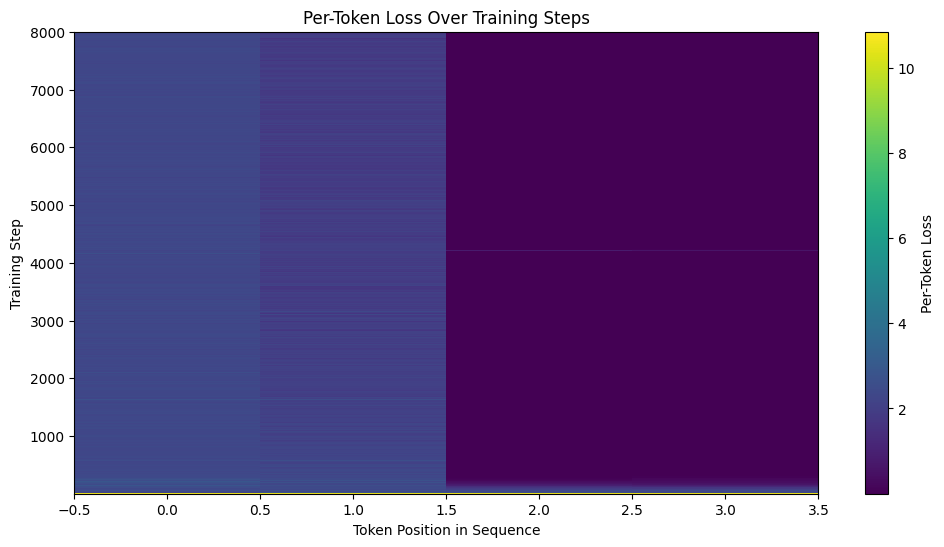

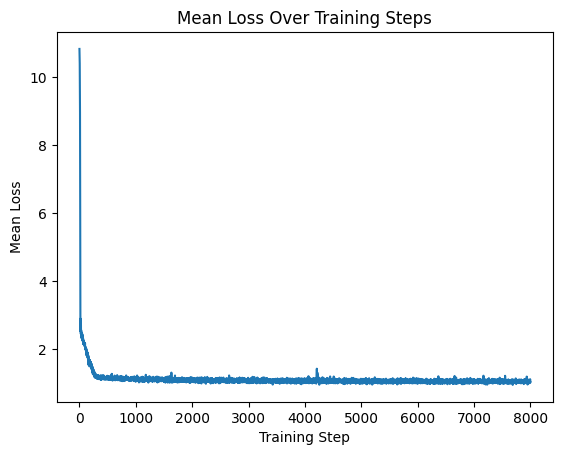

Saved final model at model_checkpoints_mlp_2l/final_model.pt
Input Sequence:  ['1', '2', '3', '4', '5']
Model Output:    ['5', '2', '2', '1']


/tmp/ipykernel_287738/1728961698.py:326: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from dataclasses import dataclass
from typing import Optional, List, Dict
import torch.optim as optim
from torch.optim import Optimizer
from tqdm.auto import tqdm
from transformer_lens import HookedTransformer, utils
from transformers import GPT2Tokenizer
import torch.nn as nn
import random
import os
import matplotlib.pyplot as plt
import numpy as np


def plot_per_token_loss(per_token_loss_array, steps):
    
    X, Y = np.meshgrid(np.arange(per_token_loss_array.shape[1]), steps)
    
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(X, Y, per_token_loss_array, shading='auto', cmap='viridis')
    plt.colorbar(label='Per-Token Loss')
    plt.xlabel('Token Position in Sequence')
    plt.ylabel('Training Step')
    plt.title('Per-Token Loss Over Training Steps')
    plt.show()

def plot_mean_loss(mean_loss_history, steps):
    plt.figure()
    plt.plot(steps, mean_loss_history)
    plt.xlabel('Training Step')
    plt.ylabel('Mean Loss')
    plt.title('Mean Loss Over Training Steps')
    plt.show()


@dataclass
class HookedTransformerTrainConfig:
    num_epochs: int
    batch_size: int
    lr: float = 1e-3
    seed: int = 0
    momentum: float = 0.0
    max_grad_norm: Optional[float] = None
    weight_decay: Optional[float] = None
    optimizer_name: str = "Adam"
    device: Optional[str] = None
    warmup_steps: int = 0
    save_every: Optional[int] = None  
    save_dir: Optional[str] = None
    wandb: bool = False
    wandb_project_name: Optional[str] = None
    print_every: Optional[int] = 50
    max_steps: Optional[int] = None
    collate_fn: Optional[callable] = None


def train(
    model: HookedTransformer,
    config: HookedTransformerTrainConfig,
    dataset: Dataset,
) -> HookedTransformer:
    torch.manual_seed(config.seed)
    model.train()
    if config.wandb:
        if config.wandb_project_name is None:
            config.wandb_project_name = "easy-transformer"
        wandb.init(project=config.wandb_project_name, config=vars(config))

    if config.device is None:
        config.device = utils.get_device()

    optimizer: Optimizer
    if config.optimizer_name in ["Adam", "AdamW"]:
        if config.weight_decay is not None:
            optimizer = optim.AdamW(
                model.parameters(),
                lr=config.lr,
                weight_decay=config.weight_decay,
            )
        else:
            optimizer = optim.Adam(
                model.parameters(),
                lr=config.lr,
            )
    elif config.optimizer_name == "SGD":
        optimizer = optim.SGD(
            model.parameters(),
            lr=config.lr,
            weight_decay=(config.weight_decay if config.weight_decay is not None else 0.0),
            momentum=config.momentum,
        )
    else:
        raise ValueError(f"Optimizer {config.optimizer_name} not supported")

    scheduler = None
    if config.warmup_steps > 0:
        scheduler = optim.lr_scheduler.LambdaLR(
            optimizer,
            lr_lambda=lambda step: min(1.0, step / config.warmup_steps),
        )

    dataloader = DataLoader(
        dataset,
        batch_size=config.batch_size,
        shuffle=True,
        collate_fn=config.collate_fn,
    )

    model.to(config.device)

    
    criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='none')

    per_token_loss_history = []
    mean_loss_history = []
    steps = []

    global_step = 0  

    for epoch in tqdm(range(1, config.num_epochs + 1), desc="Epochs"):
        samples = 0
        for step, batch in enumerate(tqdm(dataloader, desc="Steps", leave=False)):
            inputs = batch["input_ids"].to(config.device)
            targets = batch["target_ids"].to(config.device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets.view(-1))  
            loss = loss.view(inputs.size(0), -1)  

            
            mean_loss = loss.mean()

            
            mean_loss.backward()
            if config.max_grad_norm is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), config.max_grad_norm)
            optimizer.step()
            if config.warmup_steps > 0:
                assert scheduler is not None
                scheduler.step()
            optimizer.zero_grad()

            samples += inputs.size(0)
            global_step += 1

            
            per_token_loss_history.append(loss.mean(dim=0).cpu().detach().numpy())  
            mean_loss_history.append(mean_loss.item())
            steps.append(global_step)

            if config.wandb:
                wandb.log({"train_loss": mean_loss.item(), "samples": samples, "epoch": epoch})

            if config.print_every is not None and global_step % config.print_every == 0:
                print(f"Epoch {epoch}, Step {global_step}, Samples {samples}, Loss {mean_loss.item()}")

            if (
                config.save_every is not None
                and global_step % config.save_every == 0
                and config.save_dir is not None
            ):
                if not os.path.exists(config.save_dir):
                    os.makedirs(config.save_dir)
                checkpoint_path = os.path.join(config.save_dir, f"model_step_{global_step}.pt")
                torch.save(model.state_dict(), checkpoint_path)
                print(f"Saved model checkpoint at {checkpoint_path}")

            if config.max_steps is not None and global_step >= config.max_steps:
                break

        if config.max_steps is not None and global_step >= config.max_steps:
            break

    
    per_token_loss_array = np.stack(per_token_loss_history)  

    
    plot_per_token_loss(per_token_loss_array, steps)

    
    plot_mean_loss(mean_loss_history, steps)

    return model


class SequenceReversalDataset(Dataset):
    def __init__(self, sequences: List[List[str]], tokenizer, max_seq_length):
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length
        self.data = []
        for seq in sequences:
            input_seq = seq
            target_seq = seq[::-1]  
            
            input_ids = self.tokenizer.convert_tokens_to_ids(input_seq)
            target_ids = self.tokenizer.convert_tokens_to_ids(target_seq)
            
            input_ids = input_ids[:self.max_seq_length]
            target_ids = target_ids[:self.max_seq_length]
            self.data.append({
                "input_ids": torch.tensor(input_ids, dtype=torch.long),
                "target_ids": torch.tensor(target_ids, dtype=torch.long),
            })

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  


max_seq_length = 5  

def generate_reversal_data(tokenizer, num_samples=1000, seq_len=5):
    sequences = []
    for _ in range(num_samples):
        seq = [str(random.randint(0, 9)) for _ in range(seq_len)]  
        sequences.append(seq)
    return sequences


sequences = generate_reversal_data(tokenizer, num_samples=1000, seq_len=max_seq_length)
dataset = SequenceReversalDataset(sequences, tokenizer, max_seq_length)


def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    target_ids = [item['target_ids'] for item in batch]

    
    input_ids_padded = torch.nn.utils.rnn.pad_sequence(
        input_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    target_ids_padded = torch.nn.utils.rnn.pad_sequence(
        target_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    
    input_ids_padded = input_ids_padded[:, :max_seq_length]
    if input_ids_padded.size(1) < max_seq_length:
        padding = torch.full(
            (input_ids_padded.size(0), max_seq_length - input_ids_padded.size(1)),
            tokenizer.pad_token_id,
            dtype=torch.long
        )
        input_ids_padded = torch.cat([input_ids_padded, padding], dim=1)

    target_ids_padded = target_ids_padded[:, :max_seq_length]
    if target_ids_padded.size(1) < max_seq_length:
        padding = torch.full(
            (target_ids_padded.size(0), max_seq_length - target_ids_padded.size(1)),
            tokenizer.pad_token_id,
            dtype=torch.long
        )
        target_ids_padded = torch.cat([target_ids_padded, padding], dim=1)

    return {'input_ids': input_ids_padded, 'target_ids': target_ids_padded}


from transformer_lens.HookedTransformerConfig import HookedTransformerConfig


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=False,
    n_devices=1,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)


model = HookedTransformer(model_config)


config = HookedTransformerTrainConfig(
    num_epochs=250,  
    batch_size=32,
    lr=1e-3,
    seed=42,
    optimizer_name='Adam',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    print_every=100,
    save_every=200,  
    save_dir='model_checkpoints_mlp_2l',  
    collate_fn=collate_fn
)


trained_model = train(model, config, dataset)


final_model_path = os.path.join(config.save_dir, 'final_model.pt')
torch.save(trained_model.state_dict(), final_model_path)
print(f"Saved final model at {final_model_path}")



def load_model(model_path, model_config):
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model


loaded_model = load_model(final_model_path, model_config)


def test_model(model, tokenizer, input_sequence):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer.convert_tokens_to_ids(input_sequence)
        input_ids = torch.tensor([input_ids], dtype=torch.long).to(model.cfg.device)
        outputs = model(input_ids)  
        
        logits = outputs[:, :-1, :]  
        
        predicted_ids = logits.argmax(dim=-1).squeeze().tolist()
        
        predicted_tokens = tokenizer.convert_ids_to_tokens(predicted_ids)
        print("Input Sequence: ", input_sequence)
        print("Model Output:   ", predicted_tokens)


test_sequence = ['1', '2', '3', '4', '5']
test_model(loaded_model, tokenizer, test_sequence)


In [ ]:

checkpoint_steps = [200, 400, 800, 1200, 1600, 5000, 8000]  
checkpoint_paths = [os.path.join(config.save_dir, f"model_step_{step}.pt") for step in checkpoint_steps]

for checkpoint_path in checkpoint_paths:
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue
    
    model_checkpoint = HookedTransformer(model_config)
    model_checkpoint.load_state_dict(torch.load(checkpoint_path))
    model_checkpoint.to(device)
    model_checkpoint.eval()



/tmp/ipykernel_287738/2682700810.py:11: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda


In [ ]:
model_config_attn = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=True,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)

model_config_mlp =  HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=False,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)

model_mapping = {}
model_mapping["model_checkpoints_attn_2l"] = model_config_attn
model_mapping["model_checkpoints_mlp_2l"] = model_config_mlp

2

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import einops
from fancy_einsum import einsum
import tqdm.auto as tqdm
import random
from pathlib import Path
import plotly.express as px
from torch.utils.data import DataLoader

from torchtyping import TensorType as TT
from typing import List, Union, Optional
from functools import partial
import copy

import itertools
from transformers import AutoModelForCausalLM, AutoConfig, AutoTokenizer
import dataclasses
import datasets
from IPython.display import HTML

In [91]:
batch_size = 10
seq_len = 2

random_tokens = torch.randint(1000, 10000, (batch_size, seq_len)).to(model.cfg.device)
repeated_tokens = einops.repeat(random_tokens, "batch seq_len -> batch (2 seq_len)")
repeated_tokens[:, 0] = model.tokenizer.bos_token_id

In [92]:
repeated_tokens[0]

tensor([50256,  8412,  3462,  8412], device='cuda:0')

In [ ]:

def induction_score_hook(
    pattern: TT["batch", "head_index", "dest_pos", "source_pos"],
    hook: HookPoint,
):
    
    
    induction_stripe = pattern.diagonal(dim1=-2, dim2=-1, offset=1-seq_len)
    
    induction_score = einops.reduce(induction_stripe, "batch head_index position -> head_index", "mean")
    
    induction_score_store[hook.layer(), :] = induction_score


pattern_hook_names_filter = lambda name: name.endswith("pattern")

In [ ]:
checkpoint_indices = [200, 400, 800, 1200, 1600, 5000, 7800] 
model_to_scores_per_layer_head = {}
model_to_tokens_trained_on = {}
tokens_per_step = batch_size * max_seq_length
for model_name in ["model_checkpoints_attn_2l", "model_checkpoints_mlp_2l"]:
    tokens_trained_on = []
    induction_scores_per_layer_head = collections.defaultdict(list)
    for index in checkpoint_indices:
        
        model_path = f"{model_name}/model_step_{index}.pt"
        
        
        model_for_this_checkpoint = HookedTransformer(model_mapping[model_name])
        
        model_for_this_checkpoint.load_state_dict(torch.load(model_path))
        model_for_this_checkpoint = model_for_this_checkpoint.to(device)
        

        tokens_seen_for_this_checkpoint = index * tokens_per_step
        tokens_trained_on.append(tokens_seen_for_this_checkpoint)

    
        induction_score_store = torch.zeros((model_for_this_checkpoint.cfg.n_layers, model_for_this_checkpoint.cfg.n_heads), device=model_for_this_checkpoint.cfg.device)

        model_for_this_checkpoint.run_with_hooks( 
            repeated_tokens, 
            return_type=None, 
            fwd_hooks=[(
                pattern_hook_names_filter,
                induction_score_hook
            )]
        )

        for layer in range(model_for_this_checkpoint.cfg.n_layers):
            for head in range(model_for_this_checkpoint.cfg.n_heads):
                induction_scores_per_layer_head[str(layer) + ',' + str(head)].append(induction_score_store[layer][head].item())
    model_to_scores_per_layer_head[model_name] = induction_scores_per_layer_head
    model_to_tokens_trained_on[model_name] = tokens_trained_on

/tmp/ipykernel_287738/3343826245.py:15: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda


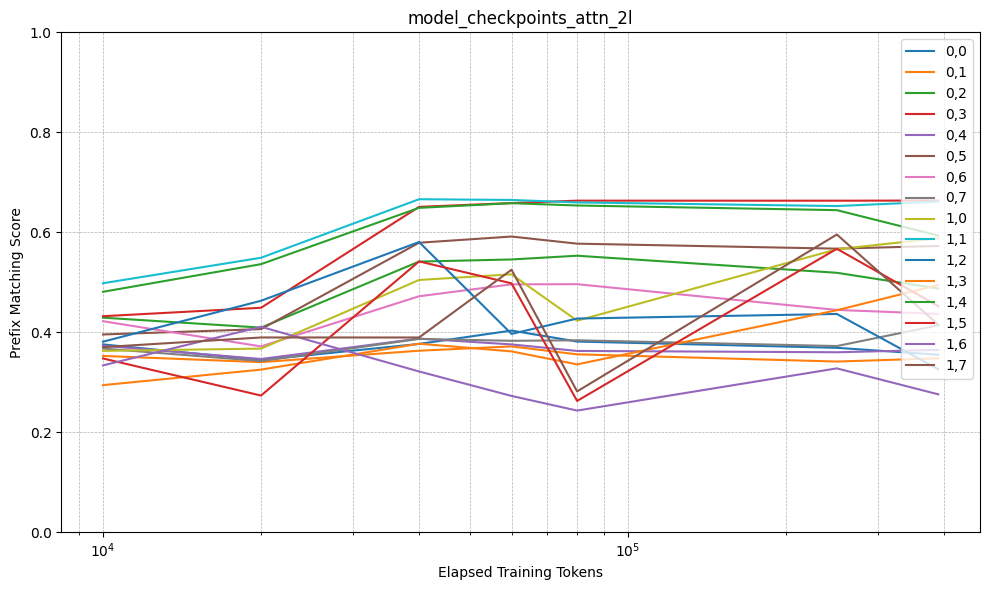

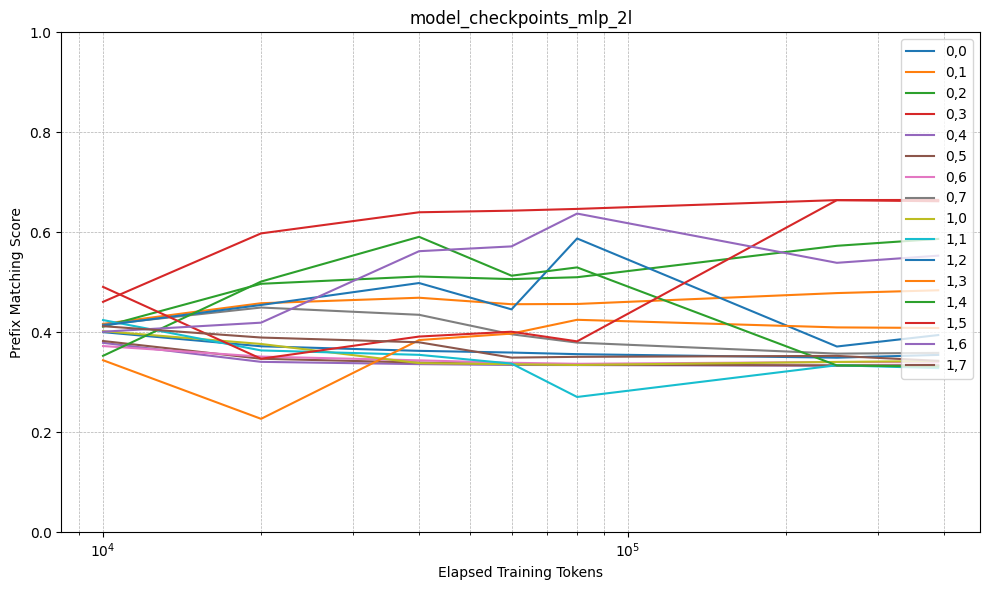

In [ ]:

import matplotlib.pyplot as plt

for model_name in model_to_scores_per_layer_head:
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    scores_per_layer_head = model_to_scores_per_layer_head[model_name]

    plt.figure(figsize=(10, 6))
    plt.title(model_name)
    plt.xscale('log')
    plt.xlabel("Elapsed Training Tokens")
    plt.ylabel("Prefix Matching Score")
    plt.ylim(0.0, 1.0)

    
    

    
    for layer_head, scores in scores_per_layer_head.items():
        plt.plot(tokens_trained_on, scores, label=layer_head)

    plt.legend(loc="best")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


Moving model to device:  cuda


Epochs:   6%|▌         | 6/100 [00:03<00:55,  1.69it/s]

Epoch 7, Step 100, Samples 128, Loss 0.00039257179014384747


Epochs:  12%|█▏        | 12/100 [00:06<00:53,  1.64it/s]

Epoch 13, Step 200, Samples 256, Loss 0.0001256433897651732


Saved model checkpoint at model_checkpoints_attn_2l/model_step_200.pt


Epochs:  19%|█▉        | 19/100 [00:11<00:48,  1.67it/s]

Epoch 19, Step 300, Samples 384, Loss 8.137616532621905e-05


Epochs:  24%|██▍       | 24/100 [00:13<00:42,  1.79it/s]

Epoch 25, Step 400, Samples 500, Loss 5.562915248447098e-05


Epochs:  25%|██▌       | 25/100 [00:14<00:51,  1.47it/s]

Saved model checkpoint at model_checkpoints_attn_2l/model_step_400.pt


Epochs:  31%|███       | 31/100 [00:18<00:38,  1.79it/s]

Epoch 32, Step 500, Samples 128, Loss 4.0007016650633886e-05


Epochs:  37%|███▋      | 37/100 [00:21<00:35,  1.78it/s]

Epoch 38, Step 600, Samples 256, Loss 3.00137198792072e-05


Saved model checkpoint at model_checkpoints_attn_2l/model_step_600.pt


Epochs:  44%|████▍     | 44/100 [00:26<00:32,  1.74it/s]

Epoch 44, Step 700, Samples 384, Loss 2.3331587726715952e-05


Epochs:  49%|████▉     | 49/100 [00:29<00:29,  1.73it/s]

Epoch 50, Step 800, Samples 500, Loss 1.859644726209808e-05


Epochs:  50%|█████     | 50/100 [00:29<00:33,  1.51it/s]

Saved model checkpoint at model_checkpoints_attn_2l/model_step_800.pt


Epochs:  56%|█████▌    | 56/100 [00:33<00:25,  1.73it/s]

Epoch 57, Step 900, Samples 128, Loss 1.5159313988988288e-05


Epochs:  62%|██████▏   | 62/100 [00:36<00:22,  1.73it/s]

Epoch 63, Step 1000, Samples 256, Loss 1.2569866157718934e-05


Saved model checkpoint at model_checkpoints_attn_2l/model_step_1000.pt


Epochs:  69%|██████▉   | 69/100 [00:41<00:18,  1.66it/s]

Epoch 69, Step 1100, Samples 384, Loss 1.0576448403298855e-05


Epochs:  74%|███████▍  | 74/100 [00:44<00:15,  1.67it/s]

Epoch 75, Step 1200, Samples 500, Loss 9.020122888614424e-06


Epochs:  75%|███████▌  | 75/100 [00:44<00:17,  1.44it/s]

Saved model checkpoint at model_checkpoints_attn_2l/model_step_1200.pt


Epochs:  81%|████████  | 81/100 [00:48<00:11,  1.62it/s]

Epoch 82, Step 1300, Samples 128, Loss 7.761815140838735e-06


Epochs:  87%|████████▋ | 87/100 [00:51<00:07,  1.81it/s]

Epoch 88, Step 1400, Samples 256, Loss 6.7419214246911e-06


Saved model checkpoint at model_checkpoints_attn_2l/model_step_1400.pt


Epochs:  94%|█████████▍| 94/100 [00:56<00:03,  1.69it/s]

Epoch 94, Step 1500, Samples 384, Loss 5.914085249969503e-06


Epochs:  99%|█████████▉| 99/100 [00:59<00:00,  1.69it/s]

Epoch 100, Step 1600, Samples 500, Loss 5.231947852735175e-06


Epochs: 100%|██████████| 100/100 [01:00<00:00,  1.67it/s]

Saved model checkpoint at model_checkpoints_attn_2l/model_step_1600.pt


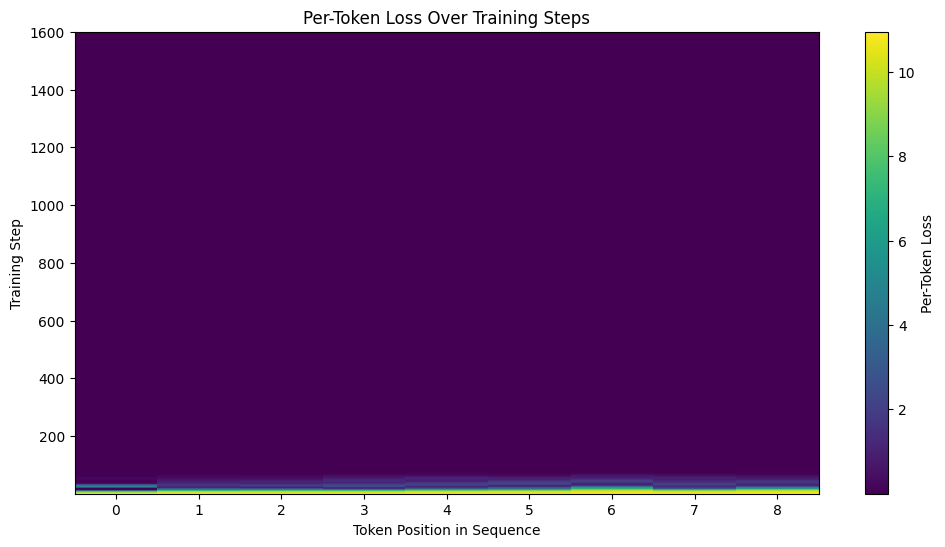

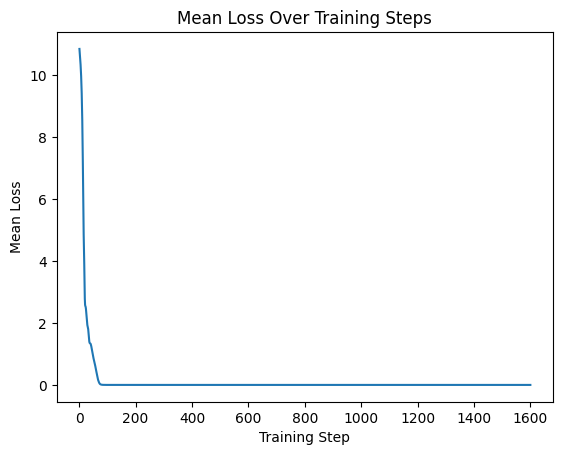

Saved final model at model_checkpoints_attn_2l/final_model.pt
Moving model to device:  cuda


/tmp/ipykernel_287738/3269935619.py:375: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-1): 2 x TransformerBlock(
      (ln1): Identity()
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (hook_resid_pre): HookPoint()
      (hook_resid_post): HookPoint()
    )
  )
  (unembed): Unembed()
)

In [ ]:

import torch
from torch.utils.data import Dataset, DataLoader
from dataclasses import dataclass
from typing import Optional, List, Dict
import torch.optim as optim
from torch.optim import Optimizer
from tqdm.auto import tqdm
from transformer_lens import HookedTransformer, utils
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import random
import os
import numpy as np
import matplotlib.pyplot as plt


random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


device = 'cuda' if torch.cuda.is_available() else 'cpu'
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


def generate_arithmetic_sequence(start, difference, length):
    return [str(start + i * difference) for i in range(length)]

def generate_fibonacci_sequence(length):
    seq = [0, 1]
    while len(seq) < length:
        seq.append(seq[-1] + seq[-2])
    return [str(num) for num in seq[:length]]

def generate_modular_sequence(start, modulus, length):
    return [str((start + i) % modulus) for i in range(length)]


class NumberTokenizer:
    def __init__(self):
        
        self.vocab = {str(i): i for i in range(-1000, 1001)}  
        self.vocab_size = len(self.vocab)
        self.pad_token = '<PAD>'
        self.pad_token_id = self.vocab_size
        self.vocab[self.pad_token] = self.pad_token_id

        
        self.id_to_token = {v: k for k, v in self.vocab.items()}

    def convert_tokens_to_ids(self, tokens):
        return [self.vocab[token] for token in tokens]

    def convert_ids_to_tokens(self, ids):
        return [self.id_to_token[id_] for id_ in ids]

    def encode(self, tokens):
        return self.convert_tokens_to_ids(tokens)

    def decode(self, ids):
        return self.convert_ids_to_tokens(ids)





class SequencePredictionDataset(Dataset):
    def __init__(self, sequences: List[List[str]], tokenizer, max_seq_length):
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length
        self.data = []
        for seq in sequences:
            input_seq = seq[:-1]  
            target_seq = seq[1:]  
            
            input_ids = self.tokenizer.convert_tokens_to_ids(input_seq)
            target_ids = self.tokenizer.convert_tokens_to_ids(target_seq)
            
            input_ids = input_ids[:self.max_seq_length]
            target_ids = target_ids[:self.max_seq_length]
            self.data.append({
                "input_ids": torch.tensor(input_ids, dtype=torch.long),
                "target_ids": torch.tensor(target_ids, dtype=torch.long),
            })

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    target_ids = [item['target_ids'] for item in batch]

    
    input_ids_padded = torch.nn.utils.rnn.pad_sequence(
        input_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    target_ids_padded = torch.nn.utils.rnn.pad_sequence(
        target_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    return {'input_ids': input_ids_padded, 'target_ids': target_ids_padded}


@dataclass
class HookedTransformerTrainConfig:
    num_epochs: int
    batch_size: int
    lr: float = 1e-3
    seed: int = 0
    momentum: float = 0.0
    max_grad_norm: Optional[float] = None
    weight_decay: Optional[float] = None
    optimizer_name: str = "Adam"
    device: Optional[str] = None
    warmup_steps: int = 0
    save_every: Optional[int] = None  
    save_dir: Optional[str] = None
    print_every: Optional[int] = 50
    max_steps: Optional[int] = None
    collate_fn: Optional[callable] = None


def train(
    model: HookedTransformer,
    config: HookedTransformerTrainConfig,
    dataset: Dataset,
) -> HookedTransformer:
    torch.manual_seed(config.seed)
    model.train()

    if config.device is None:
        config.device = utils.get_device()

    optimizer: Optimizer
    if config.optimizer_name in ["Adam", "AdamW"]:
        if config.weight_decay is not None:
            optimizer = optim.AdamW(
                model.parameters(),
                lr=config.lr,
                weight_decay=config.weight_decay,
            )
        else:
            optimizer = optim.Adam(
                model.parameters(),
                lr=config.lr,
            )
    elif config.optimizer_name == "SGD":
        optimizer = optim.SGD(
            model.parameters(),
            lr=config.lr,
            weight_decay=(config.weight_decay if config.weight_decay is not None else 0.0),
            momentum=config.momentum,
        )
    else:
        raise ValueError(f"Optimizer {config.optimizer_name} not supported")

    scheduler = None
    if config.warmup_steps > 0:
        scheduler = optim.lr_scheduler.LambdaLR(
            optimizer,
            lr_lambda=lambda step: min(1.0, step / config.warmup_steps),
        )

    dataloader = DataLoader(
        dataset,
        batch_size=config.batch_size,
        shuffle=True,
        collate_fn=config.collate_fn,
    )

    model.to(config.device)

    
    criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='none')

    per_token_loss_history = []
    mean_loss_history = []
    steps = []

    global_step = 0  

    for epoch in tqdm(range(1, config.num_epochs + 1), desc="Epochs"):
        samples = 0
        for step, batch in enumerate(tqdm(dataloader, desc="Steps", leave=False)):
            inputs = batch["input_ids"].to(config.device)
            targets = batch["target_ids"].to(config.device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets.view(-1))
            loss = loss.view(inputs.size(0), -1)  

            
            mean_loss = loss.mean()

            
            mean_loss.backward()
            if config.max_grad_norm is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), config.max_grad_norm)
            optimizer.step()
            if config.warmup_steps > 0:
                assert scheduler is not None
                scheduler.step()
            optimizer.zero_grad()

            samples += inputs.size(0)
            global_step += 1

            
            per_token_loss_history.append(loss.mean(dim=0).cpu().detach().numpy())  
            mean_loss_history.append(mean_loss.item())
            steps.append(global_step)

            if config.print_every is not None and global_step % config.print_every == 0:
                print(f"Epoch {epoch}, Step {global_step}, Samples {samples}, Loss {mean_loss.item()}")

            if (
                config.save_every is not None
                and global_step % config.save_every == 0
                and config.save_dir is not None
            ):
                if not os.path.exists(config.save_dir):
                    os.makedirs(config.save_dir)
                checkpoint_path = os.path.join(config.save_dir, f"model_step_{global_step}.pt")
                torch.save(model.state_dict(), checkpoint_path)
                print(f"Saved model checkpoint at {checkpoint_path}")

            if config.max_steps is not None and global_step >= config.max_steps:
                break

        if config.max_steps is not None and global_step >= config.max_steps:
            break

    
    per_token_loss_array = np.stack(per_token_loss_history)  

    
    plot_per_token_loss(per_token_loss_array, steps)

    
    plot_mean_loss(mean_loss_history, steps)

    return model


def plot_per_token_loss(per_token_loss_array, steps):
    
    X, Y = np.meshgrid(np.arange(per_token_loss_array.shape[1]), steps)
    
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(X, Y, per_token_loss_array, shading='auto', cmap='viridis')
    plt.colorbar(label='Per-Token Loss')
    plt.xlabel('Token Position in Sequence')
    plt.ylabel('Training Step')
    plt.title('Per-Token Loss Over Training Steps')
    plt.show()

def plot_mean_loss(mean_loss_history, steps):
    plt.figure()
    plt.plot(steps, mean_loss_history)
    plt.xlabel('Training Step')
    plt.ylabel('Mean Loss')
    plt.title('Mean Loss Over Training Steps')
    plt.show()


def generate_training_data(num_sequences, seq_length, rule):
    sequences = []
    for _ in range(num_sequences):
        if rule == 'arithmetic':
            start = random.randint(0, 10)
            difference = random.randint(1, 5)
            seq = generate_arithmetic_sequence(start, difference, seq_length + 1)  
        elif rule == 'fibonacci':
            seq = generate_fibonacci_sequence(seq_length + 1)
        elif rule == 'modular':
            start = random.randint(0, 10)
            modulus = random.randint(2, 10)
            seq = generate_modular_sequence(start, modulus, seq_length + 1)
        sequences.append(seq)
    return sequences

def generate_testing_data(num_sequences, seq_length, rule):
    sequences = []
    for _ in range(num_sequences):
        if rule == 'arithmetic':
            start = random.randint(100, 200)  
            difference = random.randint(1, 5)
            seq = generate_arithmetic_sequence(start, difference, seq_length + 1)
        elif rule == 'fibonacci':
            seq = generate_fibonacci_sequence(seq_length + 1)
        elif rule == 'modular':
            start = random.randint(100, 200)
            modulus = random.randint(2, 10)
            seq = generate_modular_sequence(start, modulus, seq_length + 1)
        sequences.append(seq)
    return sequences


max_seq_length = 10  


train_sequences = generate_training_data(num_sequences=500, seq_length=max_seq_length, rule='fibonacci')
test_sequences = generate_testing_data(num_sequences=50, seq_length=max_seq_length, rule='fibonacci')


train_dataset = SequencePredictionDataset(train_sequences, tokenizer, max_seq_length)
test_dataset = SequencePredictionDataset(test_sequences, tokenizer, max_seq_length)


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length,  
    d_vocab=tokenizer.vocab_size + 1,  
    act_fn="solu",
    tokenizer_name="gpt2",
    normalization_type=None,
   
    attn_only= True,
    device=device,
)


model = HookedTransformer(model_config)


config = HookedTransformerTrainConfig(
    num_epochs=100,  
    batch_size=32,
    lr=1e-3,
    seed=42,
    optimizer_name='Adam',
    device=device,
    print_every=100,
    save_every=200,  
    save_dir='model_checkpoints_attn_2l',  
    collate_fn=collate_fn
)


trained_model = train(model, config, train_dataset)


if not os.path.exists(config.save_dir):
    os.makedirs(config.save_dir)
final_model_path = os.path.join(config.save_dir, 'final_model.pt')
torch.save(trained_model.state_dict(), final_model_path)
print(f"Saved final model at {final_model_path}")


def load_model(model_path, model_config):
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model


loaded_model = load_model(final_model_path, model_config)
loaded_model.to(device)






In [ ]:
def generate_custom_fibonacci_sequence(start1, start2, length):
    """
    Generates a Fibonacci-like sequence starting with custom values.
    :param start1: First number in the sequence.
    :param start2: Second number in the sequence.
    :param length: Length of the sequence.
    :return: List representing the sequence.
    """
    seq = [start1, start2]
    while len(seq) < length:
        seq.append(seq[-1] + seq[-2])
    return seq[:length]


def generate_testing_data_custom(num_sequences, seq_length, start_range):
    """
    Generates a dataset for testing with sequences starting from custom values.
    :param num_sequences: Number of sequences to generate.
    :param seq_length: Length of each sequence.
    :param start_range: Tuple specifying the range for random starts (start1, start2).
    :return: List of sequences for testing.
    """
    sequences = []
    for _ in range(num_sequences):
        start1 = random.randint(*start_range)
        start2 = random.randint(*start_range)
        seq = generate_custom_fibonacci_sequence(start1, start2, seq_length + 1)  
        sequences.append(seq)
    return sequences


seq_length = 10  
num_test_sequences = 50  
start_range = (5, 50)  


custom_test_sequences = generate_testing_data_custom(num_test_sequences, seq_length, start_range)


custom_test_dataset = SequencePredictionDataset(custom_test_sequences, tokenizer, max_seq_length)

correct_predictions = 0
total_predictions = len(custom_test_dataset)

for i in range(total_predictions):
    sample = custom_test_dataset[i]
    input_ids = sample['input_ids'].tolist()
    target_ids = sample['target_ids'].tolist()
    print(target_ids)
    print(input_ids)

    
    sequence = input_ids + [target_ids[-1]]  

    
    is_correct = test_model_on_sequence(loaded_model, sequence, device)

    if is_correct:
        correct_predictions += 1


accuracy = correct_predictions / total_predictions * 100
print(f"Model accuracy on unseen sequences (custom start): {accuracy:.2f}%")


[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
[50256

In [ ]:
model_config_attn = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length ,  
    d_vocab=tokenizer.vocab_size+1,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=True,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)

model_config_mlp =  HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length ,  
    d_vocab=tokenizer.vocab_size+1,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=False,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)

model_mapping = {}
model_mapping["model_checkpoints_attn_2l"] = model_config_attn
model_mapping["model_checkpoints_mlp_2l"] = model_config_mlp

In [158]:
max_seq_length

10

In [ ]:
import torch.nn as nn
import numpy as np
import collections
from torch.utils.data import DataLoader


checkpoint_indices = [200, 400, 600, 800, 1000, 1200, 1400, 1600]
model_to_loss_curve = {}
model_to_tokens_trained_on = {}


tokens_per_step = config.batch_size * max_seq_length  
criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='mean')  


for model_name in ["model_checkpoints_attn_2l"]:
    tokens_trained_on = []
    losses = []

    for index in checkpoint_indices:
        
        model_path = f"{model_name}/model_step_{index}.pt"
        model_for_this_checkpoint = HookedTransformer(model_mapping[model_name])
        model_for_this_checkpoint.load_state_dict(torch.load(model_path))
        model_for_this_checkpoint = model_for_this_checkpoint.to(device)

        
        tokens_seen_for_this_checkpoint = index * tokens_per_step
        tokens_trained_on.append(tokens_seen_for_this_checkpoint)

        
        total_loss_for_checkpoint = 0
        num_batches = 40  

        
        for i, batch in enumerate(DataLoader(test_dataset, batch_size=32, collate_fn=collate_fn)):
            input_seq = batch['input_ids'].to(device)  
            target_seq = batch['target_ids'].to(device)  

            
            logits = model_for_this_checkpoint(input_seq)  

            
            batch_size, seq_length, vocab_size = logits.shape
            logits_flat = logits.view(-1, vocab_size)  
            target_flat = target_seq.view(-1)  

            
            batch_loss = criterion(logits_flat, target_flat).item()
            total_loss_for_checkpoint += batch_loss

            
            if i == num_batches - 1:
                break

        
        avg_loss_for_checkpoint = total_loss_for_checkpoint / num_batches
        losses.append(avg_loss_for_checkpoint)

    
    model_to_loss_curve[model_name] = losses
    model_to_tokens_trained_on[model_name] = tokens_trained_on


print("Loss Curve by Checkpoint:", model_to_loss_curve)
print("Tokens Trained On:", model_to_tokens_trained_on)


/tmp/ipykernel_287738/54275279.py:24: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Loss Curve by Checkpoint: {'model_checkpoints_attn_2l': [0.467978310585022, 0.5010980367660522, 0.5246220350265502, 0.5418828964233399, 0.5564611911773681, 0.56925048828125, 0.5807361364364624, 0.5911242485046386]}
Tokens Trained On: {'model_checkpoints_attn_2l': [64000, 128000, 192000, 256000, 320000, 384000, 448000, 512000]}


In [187]:
model_to_loss_curve

{'model_checkpoints_attn_2l': [0.467978310585022,
  0.5010980367660522,
  0.5246220350265502,
  0.5418828964233399,
  0.5564611911773681,
  0.56925048828125,
  0.5807361364364624,
  0.5911242485046386]}

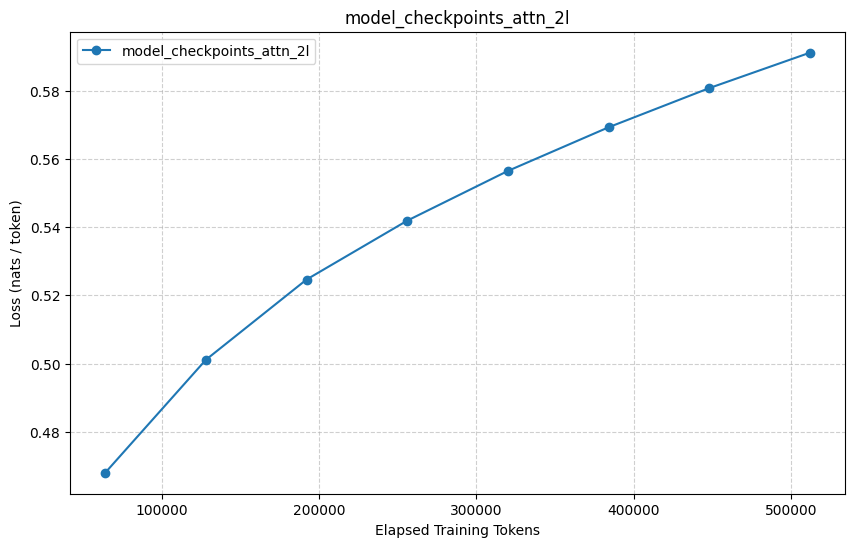

In [ ]:
import matplotlib.pyplot as plt

for model_name in model_to_loss_curve:
    
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    losses = model_to_loss_curve[model_name]

    
    plt.figure(figsize=(10, 6))

    
    plt.plot(tokens_trained_on, losses, label=model_name, marker='o')

    
    plt.xlabel("Elapsed Training Tokens")
    plt.ylabel("Loss (nats / token)")
    plt.title(model_name)
    

    
    

    
    plt.legend()

    
    plt.grid(True, linestyle='--', alpha=0.6)

    
    plt.show()


In [ ]:
  

import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os
import matplotlib.pyplot as plt


from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


device = 'cuda' if torch.cuda.is_available() else 'cpu'
max_seq_length=20

model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length,  
    d_vocab=tokenizer.vocab_size + 1,  
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only= True,
    device=device,
)


criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='mean')


checkpoint_steps = [200,400, 1400, 2400, 3000, 3400]  
checkpoint_paths = [f'model_checkpoints_attn_2l/model_step_{step}.pt' for step in checkpoint_steps]


losses = []
tokens_trained_on = []


from torch.utils.data import DataLoader, Subset













eval_sequences = generate_testing_data(num_sequences=100, seq_length=max_seq_length, rule='fibboncci')  


eval_dataset = SequencePredictionDataset(eval_sequences, tokenizer, max_seq_length)


eval_dataloader = DataLoader(
    eval_dataset,
    batch_size=32,
    collate_fn=collate_fn,
)


for checkpoint_path, tokens_seen in zip(checkpoint_paths, checkpoint_steps):
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue

    
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(checkpoint_path))
    model.to(device)
    model.eval()
    total_token_seen=20*32*tokens_seen
    
    tokens_trained_on.append(total_token_seen)

    
    total_loss = 0
    num_batches = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            inputs = batch["input_ids"].to(device)
            targets = batch["target_ids"].to(device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets_shifted = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets_shifted.view(-1))
            total_loss += loss.item()
            num_batches += 1

    average_loss = total_loss / num_batches
    losses.append(average_loss)
    print(f"Checkpoint {checkpoint_path}: Loss = {average_loss}")


plt.figure()
plt.plot(tokens_trained_on, losses, marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss Curve Over Training')
plt.show()


UnboundLocalError: cannot access local variable 'seq' where it is not associated with a value

In [ ]:
model_config_attn = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length ,  
    d_vocab=tokenizer.vocab_size+1,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=True,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)

model_config_mlp =  HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length ,  
    d_vocab=tokenizer.vocab_size+1,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=False,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)

model_mapping = {}
model_mapping["model_checkpoints_attn_2l"] = model_config_attn
model_mapping["model_checkpoints_mlp_2l"] = model_config_mlp

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np

class ArithmeticSequenceDataset(Dataset):
    def __init__(self, seq_length=10, total_samples=1000):
        """
        Dataset for generating arithmetic sequences.

        :param seq_length: Length of each sequence (number of elements in the sequence).
        :param total_samples: Total number of samples in the dataset.
        """
        self.seq_length = seq_length
        self.data = []
        for _ in range(total_samples):
            
            start = np.random.uniform(0, 10)  
            difference = np.random.uniform(1, 5)  
            arith_seq = self.generate_arithmetic_sequence(start, difference, seq_length + 1)
            self.data.append((arith_seq[:-1], arith_seq[1:]))

    def generate_arithmetic_sequence(self, start, difference, length):
        """
        Generate an arithmetic sequence.

        :param start: Starting value of the sequence.
        :param difference: Common difference between elements.
        :param length: Total length of the sequence.
        :return: List of sequence elements as floats.
        """
        return np.array([start + i * difference for i in range(length)], dtype=np.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        """
        Get a sample from the dataset.

        :param idx: Index of the sample.
        :return: A dictionary with 'input' and 'target' tensors.
        """
        return {
            'input': torch.tensor(self.data[idx][0]),
            'target': torch.tensor(self.data[idx][1]),
        }



























batch_size = 4
dataset = ArithmeticSequenceDataset(seq_length=20, total_samples=100)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


import torch
import torch.nn.functional as F

import torch
import torch.nn.functional as F

def in_context_learning_score(model, input_seq, target_seq):
    
    """
    Measures loss difference between the last token and early tokens in the sequence.
    """
    
    
    
    predictions = model(input_seq)  
    batch_size, seq_length, vocab_size = predictions.shape
    
    
    predictions = F.log_softmax(predictions, dim=-1)  
    
    
    target_seq = target_seq.long()  
    
    
    target_seq = target_seq.view(-1)  
    
    
    predictions = predictions.view(-1, vocab_size)  
    print(predictions)
    
    
    loss_fn = F.nll_loss
    loss_vec = loss_fn(predictions, target_seq, reduction='none')  
    
    
    loss_vec = loss_vec.view(batch_size, seq_length)
    
    
    last_token_loss = loss_vec[:, -1].mean()  
    
    
    early_tokens_loss = loss_vec[:, :5].mean()  
    
    
    metric = last_token_loss - early_tokens_loss
    
    return metric



checkpoint_indices = [200, 400,600, 800, 1200, 1600, 2000]
model_to_in_context_learning_scores = {}
model_to_tokens_trained_on = {}









for model_name in ["model_checkpoints_attn_2l"]:
    tokens_trained_on = []
    in_context_learning_scores = []
    induction_scores_per_layer_head = collections.defaultdict(list)
    for index in checkpoint_indices:
        
        model_path = f"{model_name}/model_step_{index}.pt"
        
        
        model_for_this_checkpoint = HookedTransformer(model_mapping[model_name])
        
        model_for_this_checkpoint.load_state_dict(torch.load(model_path))
        model_for_this_checkpoint = model_for_this_checkpoint.to(device)
        

        
        



        tokens_seen_for_this_checkpoint = index * 100  
        tokens_trained_on.append(tokens_seen_for_this_checkpoint)

        in_context_learning_score_for_this_checkpoint = 0
        num_batches = 1000 // batch_size

        for i, batch in enumerate(dataloader):
            input_seq = batch['input'].to(device)
            input_seq = input_seq.long()
            target_seq = batch['target'].to(device)
            in_context_learning_score_for_this_checkpoint += in_context_learning_score(model, input_seq, target_seq).item()
            if i == num_batches:
                break

        in_context_learning_score_for_this_checkpoint /= num_batches
        in_context_learning_scores.append(in_context_learning_score_for_this_checkpoint)

    model_to_in_context_learning_scores[model_name] = in_context_learning_scores
    model_to_tokens_trained_on[model_name] = tokens_trained_on


print("In-Context Learning Scores:", model_to_in_context_learning_scores)
print("Tokens Trained On:", model_to_tokens_trained_on)


/tmp/ipykernel_287738/861552468.py:152: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
tensor([[-15.1334, -14.1047, -12.6030,  ..., -15.0009, -14.7258, -14.5443],
        [-31.4222, -33.3223, -33.1767,  ..., -31.9860, -29.6871, -31.3298],
        [-29.6089, -32.5404, -32.1527,  ..., -31.3001, -28.8248, -30.8061],
        ...,
        [-18.8129, -18.9692, -19.0027,  ..., -18.0782, -17.4177, -17.8173],
        [-17.8598, -17.7112, -17.5794,  ..., -17.0631, -16.9990, -16.4175],
        [-17.3053, -17.3639, -18.2990,  ..., -17.0548, -17.3538, -16.4594]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[-26.1701, -24.4438, -23.1549,  ..., -25.6255, -25.0140, -26.1045],
        [-35.5628, -36.7460, -37.8849,  ..., -36.0187, -33.1708, -35.8676],
        [-28.9721, -29.8257, -30.4219,  ..., -28.0895, -26.6073, -28.2938],
        ...,
        [-21.9244, -19.7516, -21.2695,  ..., -18.7002, -19.3305, -19.9007],
        [-17.5975, -16.3059, -16.1437,  ..., -15.2331, -15.7956, -15.1222],
        [-16.7337, -15.3020, -19.5954,  ..., -14.8900, -16

In [131]:
in_context_learning_scores

[-1.728688362121582,
 -1.7286883659362793,
 -1.728688362121582,
 -1.7286883506774902,
 -1.7286883430480957]

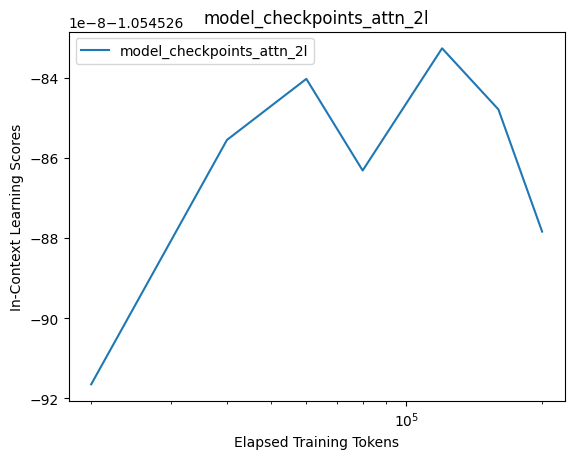

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for model_name in model_to_in_context_learning_scores:
    in_context_learning_scores = model_to_in_context_learning_scores[model_name]
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    
    
    fig, ax = plt.subplots()
    
    
    ax.plot(tokens_trained_on, in_context_learning_scores, label=model_name)
    
    
    ax.set_xlabel("Elapsed Training Tokens")
    ax.set_ylabel("In-Context Learning Scores")
    ax.set_title(model_name)
    ax.set_xscale("log")
    
    
    
    
    
    
    ax.legend()
    
    
    plt.show()


In [102]:
sample_batch = next(iter(pile_dataloader))

torch.Size([1024])

In [ ]:

checkpoint_steps = [10, 20, 150, 400, 1400]  
checkpoint_paths = [os.path.join(config.save_dir, f"model_step_{step}.pt") for step in checkpoint_steps]

for checkpoint_path in checkpoint_paths:
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue
    
    model_checkpoint = HookedTransformer(model_config)
    model_checkpoint.load_state_dict(torch.load(checkpoint_path))
    model_checkpoint.to(device)
    model_checkpoint.eval()
    
    correct_predictions = 0
    total_predictions = len(test_dataset)
    for i in range(total_predictions):
        sample = test_dataset[i]
        input_ids = sample['input_ids']
        target_ids = sample['target_ids']
        input_sequence = tokenizer.convert_ids_to_tokens(input_ids.tolist())
        target_sequence = tokenizer.convert_ids_to_tokens(target_ids.tolist())
        sequence = input_sequence + [target_sequence[-1]]
        is_correct = test_model_on_sequence(model_checkpoint, tokenizer, sequence)
        if is_correct:
            correct_predictions += 1
    accuracy = correct_predictions / total_predictions * 100
    print(f"Model accuracy at checkpoint {checkpoint_path}: {accuracy:.2f}%")


/tmp/ipykernel_1107602/2924749375.py:11: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 12
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 12
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 12
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 12
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 12
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 12
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 12
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 12
Input Sequence: ['0', '1',

In [ ]:
import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os
import plotly.express as px
from tqdm.auto import tqdm
from transformers import GPT2Tokenizer
from torch.utils.data import DataLoader, Subset


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


device = 'cuda' if torch.cuda.is_available() else 'cpu'


batch_size = config.batch_size  
max_seq_length = max_seq_length  

















criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='mean')


checkpoint_steps = [200, 400, 600, 800, 1000, 1400]  
checkpoint_paths = [f'model_checkpoints/model_step_{step}.pt' for step in checkpoint_steps]


tokens_per_step = batch_size * max_seq_length  



eval_dataset = Subset(dataset, range(100))  
eval_dataloader = DataLoader(
    eval_dataset,
    batch_size=batch_size,
    collate_fn=collate_fn,
)


tokens_trained_on = []
losses = []

for index in checkpoint_steps:
    checkpoint_path = f'model_checkpoints_sequence_prediction/model_step_{index}.pt'
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue

    
    model_for_this_checkpoint = HookedTransformer(model_config)
    model_for_this_checkpoint.load_state_dict(torch.load(checkpoint_path))
    model_for_this_checkpoint.to(device)
    model_for_this_checkpoint.eval()

    
    tokens_trained = index * tokens_per_step
    tokens_trained_on.append(tokens_trained)

    
    total_loss = 0
    num_batches = 0
    num_batches_to_evaluate = 10  

    with torch.no_grad():
        for i, batch in enumerate(eval_dataloader):
            inputs = batch["input_ids"].to(device)
            targets = batch["target_ids"].to(device)

            
            outputs = model_for_this_checkpoint(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets_shifted = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets_shifted.view(-1))
            total_loss += loss.item()
            num_batches += 1

            if num_batches >= num_batches_to_evaluate:
                break

    average_loss = total_loss / num_batches
    losses.append(average_loss)
    print(f"Checkpoint {checkpoint_path}: Tokens Trained = {tokens_trained}, Loss = {average_loss}")


fig = px.line(
    x=tokens_trained_on,
    y=losses,
    title="Model Loss Over Training",
    labels={"x": "Elapsed Training Tokens", "y": "Loss (nats / token)"}
)

min_loss = min(losses)
max_loss = max(losses)
fig.update_layout(yaxis_range=[min_loss * 0.9, max_loss * 1.1])




fig.show()


/tmp/ipykernel_1107602/2545392356.py:68: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_200.pt: Tokens Trained = 64000, Loss = 20.10816240310669
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_400.pt: Tokens Trained = 128000, Loss = 20.815447330474854
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_600.pt: Tokens Trained = 192000, Loss = 21.30323600769043
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_800.pt: Tokens Trained = 256000, Loss = 21.690383911132812
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_1000.pt: Tokens Trained = 320000, Loss = 22.00627088546753
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_1400.pt: Tokens Trained = 448000, Loss = 22.495824337005615


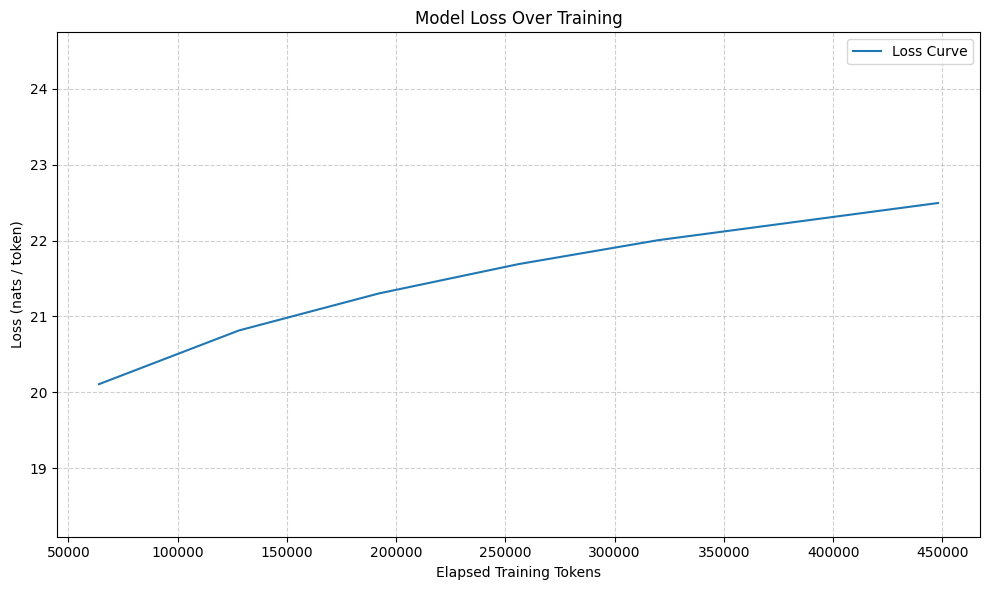

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.title("Model Loss Over Training")
plt.xlabel("Elapsed Training Tokens")
plt.ylabel("Loss (nats / token)")


plt.plot(tokens_trained_on, losses, label="Loss Curve")


min_loss = min(losses)
max_loss = max(losses)
plt.ylim(min_loss * 0.9, max_loss * 1.1)






plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()


plt.tight_layout()
plt.show()


In [ ]:
import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from tqdm.auto import tqdm
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=4,
    d_model=128,
    d_head=16,
    d_mlp=256,
    n_ctx=20,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    device=device,
)

from torch.utils.data import DataLoader, Subset


example_batch_size = 32  
num_examples = 200  










examples = []
for batch in eval_dataloader:
  
    
    inputs = batch["input_ids"].to(device)
    examples.append(inputs)


In [ ]:
checkpoint_steps = [200, 400, 600, 800, 1000, 1400]  
checkpoint_paths = [f'model_checkpoints_sequence_prediction/model_step_{step}.pt' for step in checkpoint_steps]


In [89]:
pca = PCA(n_components=2)
model_name = "My Trained Model"
loss_data_matrix = []
tokens_trained_on = []


In [ ]:
import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from tqdm.auto import tqdm
from transformers import GPT2Tokenizer
from torch.utils.data import DataLoader, Subset


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

device = 'cuda' if torch.cuda.is_available() else 'cpu'


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=4,
    d_model=128,
    d_head=32,
    d_mlp=256,
    n_ctx=max_seq_length ,  
    d_vocab=tokenizer.vocab_size+1,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    device=device,
)


example_batch_size = 32  
num_examples = 200  
example_dataset = Subset(dataset, range(num_examples))
example_dataloader = DataLoader(
    example_dataset,
    batch_size=example_batch_size,
    collate_fn=collate_fn,
)

examples = []
for batch in eval_dataloader:
    inputs = batch["input_ids"].to(device)
    examples.append(inputs)


checkpoint_steps = [200, 400, 600, 800, 1000]  
checkpoint_paths = [f'model_checkpoints_sequence_prediction/model_step_{step}.pt' for step in checkpoint_steps]


pca = PCA(n_components=2)
model_name = "My Trained Model"
loss_data_matrix = []
tokens_trained_on = []


tokens_per_step = config.batch_size * max_seq_length  

for index, checkpoint_path in zip(checkpoint_steps, checkpoint_paths):
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue

    
    model_for_this_checkpoint = HookedTransformer(model_config)
    model_for_this_checkpoint.load_state_dict(torch.load(checkpoint_path))
    model_for_this_checkpoint.to(device)
    model_for_this_checkpoint.eval()

    
    tokens_trained = index * tokens_per_step
    tokens_trained_on.append(tokens_trained)

    
    loss_vec_store = []
    with torch.no_grad():
        for inputs in examples:
            outputs = model_for_this_checkpoint(inputs)
            
            logits = outputs[:, :-1, :].contiguous()
            targets = inputs[:, 1:].contiguous()
            
            loss_fn = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='none')
            loss = loss_fn(logits.view(-1, logits.size(-1)), targets.view(-1))
            loss = loss.view(inputs.size(0), -1)  
            
            loss_per_example = loss.sum(dim=1)  
            loss_vec_store.extend(loss_per_example.cpu().numpy())

    
    loss_vec_store = np.array(loss_vec_store)
    loss_data_matrix.append(loss_vec_store)


loss_data_matrix = np.stack(loss_data_matrix)  


loss_data_scaled = StandardScaler().fit_transform(loss_data_matrix)
pca_features = pca.fit_transform(loss_data_scaled)


pca_features = np.array(pca_features)  
tokens_trained_on = np.array(tokens_trained_on)

fig1 = go.Figure()
for i in range(1, len(pca_features)):
    
    phase_change_start = 60000  
    phase_change_end = 120000   
    line_color = "red" if phase_change_start <= tokens_trained_on[i] <= phase_change_end else 'blue'
    fig1.add_trace(go.Scatter(
        x=pca_features[i-1: i+1, 0],
        y=pca_features[i-1: i+1, 1],
        line={"width": 1, "dash": "dash", "color": line_color},
        showlegend=False
    ))
fig1.update(layout_showlegend=False)

fig2 = px.scatter(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    color=list(map(str, tokens_trained_on)),
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2', 'color': 'Tokens Trained'}
)
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.update_layout(legend_title="Elapsed Training Tokens", title=model_name)
fig3.show()


/tmp/ipykernel_1107602/2540005069.py:71: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda


Moving model to device:  cuda


Epochs:   3%|▎         | 3/100 [00:03<01:51,  1.15s/it]

Epoch 4, Step 100, Samples 128, Loss 2.157449960708618


Epochs:   6%|▌         | 6/100 [00:06<01:31,  1.03it/s]

Epoch 7, Step 200, Samples 256, Loss 1.0771552324295044


Saved model checkpoint at model_checkpoints/model_step_200.pt


Epochs:   9%|▉         | 9/100 [00:09<01:29,  1.02it/s]

Epoch 10, Step 300, Samples 384, Loss 1.0359183549880981


Epochs:  12%|█▏        | 12/100 [00:12<01:23,  1.05it/s]

Epoch 13, Step 400, Samples 512, Loss 1.0056445598602295


Saved model checkpoint at model_checkpoints/model_step_400.pt


Epochs:  15%|█▌        | 15/100 [00:15<01:25,  1.01s/it]

Epoch 16, Step 500, Samples 640, Loss 0.9962401986122131


Epochs:  18%|█▊        | 18/100 [00:18<01:20,  1.02it/s]

Epoch 19, Step 600, Samples 768, Loss 1.0078353881835938


Saved model checkpoint at model_checkpoints/model_step_600.pt


Epochs:  22%|██▏       | 22/100 [00:22<01:16,  1.02it/s]

Epoch 22, Step 700, Samples 896, Loss 0.9789458513259888


Epochs:  24%|██▍       | 24/100 [00:24<01:15,  1.01it/s]

Epoch 25, Step 800, Samples 1000, Loss 1.0290926694869995


Epochs:  25%|██▌       | 25/100 [00:25<01:20,  1.07s/it]

Saved model checkpoint at model_checkpoints/model_step_800.pt


Epochs:  28%|██▊       | 28/100 [00:28<01:12,  1.01s/it]

Epoch 29, Step 900, Samples 128, Loss 0.9494982957839966


Epochs:  31%|███       | 31/100 [00:31<01:05,  1.05it/s]

Epoch 32, Step 1000, Samples 256, Loss 0.9510372877120972


Saved model checkpoint at model_checkpoints/model_step_1000.pt


Epochs:  34%|███▍      | 34/100 [00:34<01:06,  1.01s/it]

Epoch 35, Step 1100, Samples 384, Loss 0.8723757266998291


Epochs:  37%|███▋      | 37/100 [00:37<01:01,  1.02it/s]

Epoch 38, Step 1200, Samples 512, Loss 0.883747398853302


Saved model checkpoint at model_checkpoints/model_step_1200.pt


Epochs:  40%|████      | 40/100 [00:40<01:02,  1.03s/it]

Epoch 41, Step 1300, Samples 640, Loss 0.8424243330955505


Epochs:  43%|████▎     | 43/100 [00:43<00:59,  1.05s/it]

Epoch 44, Step 1400, Samples 768, Loss 0.8237005472183228


Saved model checkpoint at model_checkpoints/model_step_1400.pt


Epochs:  47%|████▋     | 47/100 [00:48<00:56,  1.06s/it]

Epoch 47, Step 1500, Samples 896, Loss 0.7370426654815674


Epochs:  49%|████▉     | 49/100 [00:50<00:53,  1.04s/it]

Epoch 50, Step 1600, Samples 1000, Loss 0.8539503812789917


Epochs:  50%|█████     | 50/100 [00:51<00:58,  1.16s/it]

Saved model checkpoint at model_checkpoints/model_step_1600.pt


Epochs:  53%|█████▎    | 53/100 [00:54<00:50,  1.07s/it]

Epoch 54, Step 1700, Samples 128, Loss 0.6626681089401245


Epochs:  56%|█████▌    | 56/100 [00:58<00:46,  1.05s/it]

Epoch 57, Step 1800, Samples 256, Loss 0.6358683705329895


Saved model checkpoint at model_checkpoints/model_step_1800.pt


Epochs:  59%|█████▉    | 59/100 [01:01<00:42,  1.04s/it]

Epoch 60, Step 1900, Samples 384, Loss 0.6298295259475708


Epochs:  62%|██████▏   | 62/100 [01:04<00:38,  1.03s/it]

Epoch 63, Step 2000, Samples 512, Loss 0.6434802412986755


Saved model checkpoint at model_checkpoints/model_step_2000.pt


Epochs:  65%|██████▌   | 65/100 [01:07<00:37,  1.07s/it]

Epoch 66, Step 2100, Samples 640, Loss 0.5798986554145813


Epochs:  68%|██████▊   | 68/100 [01:10<00:32,  1.03s/it]

Epoch 69, Step 2200, Samples 768, Loss 0.60371994972229


Saved model checkpoint at model_checkpoints/model_step_2200.pt


Epochs:  72%|███████▏  | 72/100 [01:15<00:29,  1.05s/it]

Epoch 72, Step 2300, Samples 896, Loss 0.6158079504966736


Epochs:  74%|███████▍  | 74/100 [01:16<00:26,  1.01s/it]

Epoch 75, Step 2400, Samples 1000, Loss 0.5960052609443665


Epochs:  75%|███████▌  | 75/100 [01:18<00:27,  1.12s/it]

Saved model checkpoint at model_checkpoints/model_step_2400.pt


Epochs:  78%|███████▊  | 78/100 [01:21<00:22,  1.03s/it]

Epoch 79, Step 2500, Samples 128, Loss 0.5583128333091736


Epochs:  81%|████████  | 81/100 [01:24<00:18,  1.01it/s]

Epoch 82, Step 2600, Samples 256, Loss 0.5696002244949341


Saved model checkpoint at model_checkpoints/model_step_2600.pt


Epochs:  84%|████████▍ | 84/100 [01:27<00:16,  1.05s/it]

Epoch 85, Step 2700, Samples 384, Loss 0.577357828617096


Epochs:  87%|████████▋ | 87/100 [01:30<00:13,  1.02s/it]

Epoch 88, Step 2800, Samples 512, Loss 0.5685599446296692


Saved model checkpoint at model_checkpoints/model_step_2800.pt


Epochs:  90%|█████████ | 90/100 [01:33<00:10,  1.05s/it]

Epoch 91, Step 2900, Samples 640, Loss 0.5711408257484436


Epochs:  93%|█████████▎| 93/100 [01:36<00:07,  1.04s/it]

Epoch 94, Step 3000, Samples 768, Loss 0.5414798855781555


Saved model checkpoint at model_checkpoints/model_step_3000.pt


Epochs:  97%|█████████▋| 97/100 [01:41<00:03,  1.02s/it]

Epoch 97, Step 3100, Samples 896, Loss 0.582274317741394


Epochs:  99%|█████████▉| 99/100 [01:43<00:00,  1.02it/s]

Epoch 100, Step 3200, Samples 1000, Loss 0.6542699933052063


Epochs: 100%|██████████| 100/100 [01:44<00:00,  1.04s/it]

Saved model checkpoint at model_checkpoints/model_step_3200.pt


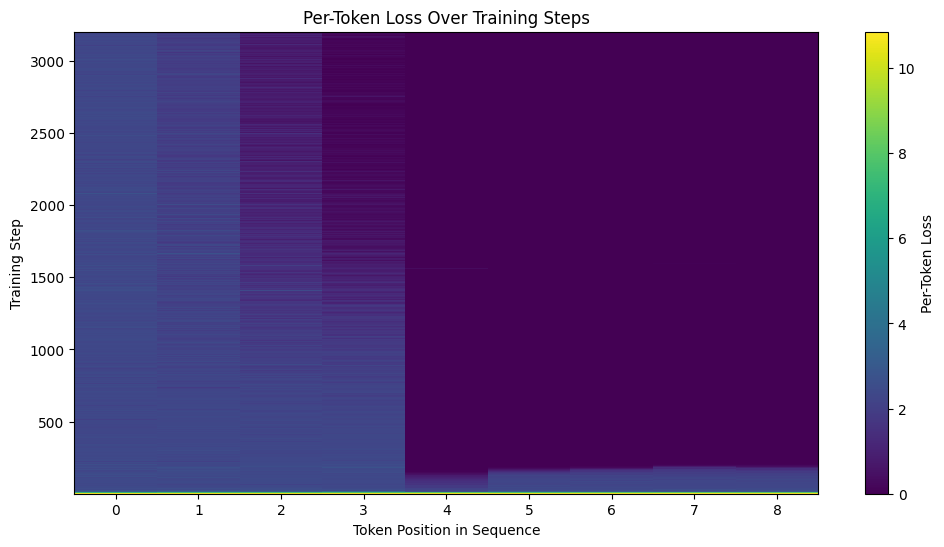

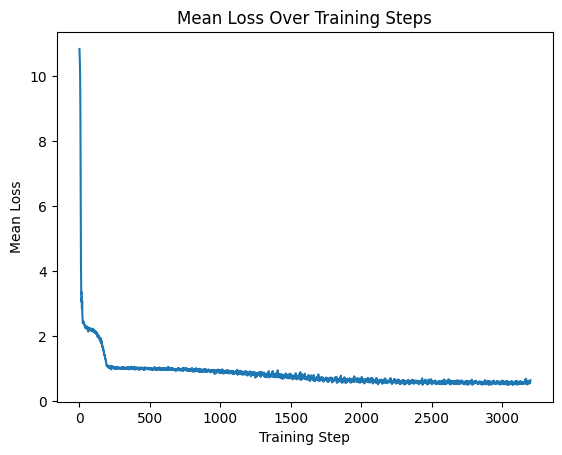

Saved final model at model_checkpoints/final_model.pt
Input Sequence:  ['1', '2', '3', '4', '5']
Model Output:    ['3', '6', '6', '8']


/tmp/ipykernel_1107602/3211937781.py:324: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from dataclasses import dataclass
from typing import Optional, List, Dict
import torch.optim as optim
from torch.optim import Optimizer
from tqdm.auto import tqdm
from transformer_lens import HookedTransformer, utils
from transformers import GPT2Tokenizer
import torch.nn as nn
import random
import os
import matplotlib.pyplot as plt
import numpy as np


def plot_per_token_loss(per_token_loss_array, steps):
    
    X, Y = np.meshgrid(np.arange(per_token_loss_array.shape[1]), steps)
    
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(X, Y, per_token_loss_array, shading='auto', cmap='viridis')
    plt.colorbar(label='Per-Token Loss')
    plt.xlabel('Token Position in Sequence')
    plt.ylabel('Training Step')
    plt.title('Per-Token Loss Over Training Steps')
    plt.show()

def plot_mean_loss(mean_loss_history, steps):
    plt.figure()
    plt.plot(steps, mean_loss_history)
    plt.xlabel('Training Step')
    plt.ylabel('Mean Loss')
    plt.title('Mean Loss Over Training Steps')
    plt.show()


@dataclass
class HookedTransformerTrainConfig:
    num_epochs: int
    batch_size: int
    lr: float = 1e-3
    seed: int = 0
    momentum: float = 0.0
    max_grad_norm: Optional[float] = None
    weight_decay: Optional[float] = None
    optimizer_name: str = "Adam"
    device: Optional[str] = None
    warmup_steps: int = 0
    save_every: Optional[int] = None  
    save_dir: Optional[str] = None
    wandb: bool = False
    wandb_project_name: Optional[str] = None
    print_every: Optional[int] = 50
    max_steps: Optional[int] = None
    collate_fn: Optional[callable] = None


def train(
    model: HookedTransformer,
    config: HookedTransformerTrainConfig,
    dataset: Dataset,
) -> HookedTransformer:
    torch.manual_seed(config.seed)
    model.train()
    if config.wandb:
        if config.wandb_project_name is None:
            config.wandb_project_name = "easy-transformer"
        wandb.init(project=config.wandb_project_name, config=vars(config))

    if config.device is None:
        config.device = utils.get_device()

    optimizer: Optimizer
    if config.optimizer_name in ["Adam", "AdamW"]:
        if config.weight_decay is not None:
            optimizer = optim.AdamW(
                model.parameters(),
                lr=config.lr,
                weight_decay=config.weight_decay,
            )
        else:
            optimizer = optim.Adam(
                model.parameters(),
                lr=config.lr,
            )
    elif config.optimizer_name == "SGD":
        optimizer = optim.SGD(
            model.parameters(),
            lr=config.lr,
            weight_decay=(config.weight_decay if config.weight_decay is not None else 0.0),
            momentum=config.momentum,
        )
    else:
        raise ValueError(f"Optimizer {config.optimizer_name} not supported")

    scheduler = None
    if config.warmup_steps > 0:
        scheduler = optim.lr_scheduler.LambdaLR(
            optimizer,
            lr_lambda=lambda step: min(1.0, step / config.warmup_steps),
        )

    dataloader = DataLoader(
        dataset,
        batch_size=config.batch_size,
        shuffle=True,
        collate_fn=config.collate_fn,
    )

    model.to(config.device)

    
    criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='none')

    per_token_loss_history = []
    mean_loss_history = []
    steps = []

    global_step = 0  

    for epoch in tqdm(range(1, config.num_epochs + 1), desc="Epochs"):
        samples = 0
        for step, batch in enumerate(tqdm(dataloader, desc="Steps", leave=False)):
            inputs = batch["input_ids"].to(config.device)
            targets = batch["target_ids"].to(config.device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets.view(-1))  
            loss = loss.view(inputs.size(0), -1)  

            
            mean_loss = loss.mean()

            
            mean_loss.backward()
            if config.max_grad_norm is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), config.max_grad_norm)
            optimizer.step()
            if config.warmup_steps > 0:
                assert scheduler is not None
                scheduler.step()
            optimizer.zero_grad()

            samples += inputs.size(0)
            global_step += 1

            
            per_token_loss_history.append(loss.mean(dim=0).cpu().detach().numpy())  
            mean_loss_history.append(mean_loss.item())
            steps.append(global_step)

            if config.wandb:
                wandb.log({"train_loss": mean_loss.item(), "samples": samples, "epoch": epoch})

            if config.print_every is not None and global_step % config.print_every == 0:
                print(f"Epoch {epoch}, Step {global_step}, Samples {samples}, Loss {mean_loss.item()}")

            if (
                config.save_every is not None
                and global_step % config.save_every == 0
                and config.save_dir is not None
            ):
                if not os.path.exists(config.save_dir):
                    os.makedirs(config.save_dir)
                checkpoint_path = os.path.join(config.save_dir, f"model_step_{global_step}.pt")
                torch.save(model.state_dict(), checkpoint_path)
                print(f"Saved model checkpoint at {checkpoint_path}")

            if config.max_steps is not None and global_step >= config.max_steps:
                break

        if config.max_steps is not None and global_step >= config.max_steps:
            break

    
    per_token_loss_array = np.stack(per_token_loss_history)  

    
    plot_per_token_loss(per_token_loss_array, steps)

    
    plot_mean_loss(mean_loss_history, steps)

    return model


class SequenceReversalDataset(Dataset):
    def __init__(self, sequences: List[List[str]], tokenizer, max_seq_length):
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length
        self.data = []
        for seq in sequences:
            input_seq = seq
            target_seq = seq[::-1]  
            
            input_ids = self.tokenizer.convert_tokens_to_ids(input_seq)
            target_ids = self.tokenizer.convert_tokens_to_ids(target_seq)
            
            input_ids = input_ids[:self.max_seq_length]
            target_ids = target_ids[:self.max_seq_length]
            self.data.append({
                "input_ids": torch.tensor(input_ids, dtype=torch.long),
                "target_ids": torch.tensor(target_ids, dtype=torch.long),
            })

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  


max_seq_length = 10  

def generate_reversal_data(tokenizer, num_samples=1000, seq_len=10):
    sequences = []
    for _ in range(num_samples):
        seq = [str(random.randint(0, 9)) for _ in range(seq_len)]  
        sequences.append(seq)
    return sequences


sequences = generate_reversal_data(tokenizer, num_samples=1000, seq_len=max_seq_length)
dataset = SequenceReversalDataset(sequences, tokenizer, max_seq_length)


def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    target_ids = [item['target_ids'] for item in batch]

    
    input_ids_padded = torch.nn.utils.rnn.pad_sequence(
        input_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    target_ids_padded = torch.nn.utils.rnn.pad_sequence(
        target_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    
    input_ids_padded = input_ids_padded[:, :max_seq_length]
    if input_ids_padded.size(1) < max_seq_length:
        padding = torch.full(
            (input_ids_padded.size(0), max_seq_length - input_ids_padded.size(1)),
            tokenizer.pad_token_id,
            dtype=torch.long
        )
        input_ids_padded = torch.cat([input_ids_padded, padding], dim=1)

    target_ids_padded = target_ids_padded[:, :max_seq_length]
    if target_ids_padded.size(1) < max_seq_length:
        padding = torch.full(
            (target_ids_padded.size(0), max_seq_length - target_ids_padded.size(1)),
            tokenizer.pad_token_id,
            dtype=torch.long
        )
        target_ids_padded = torch.cat([target_ids_padded, padding], dim=1)

    return {'input_ids': input_ids_padded, 'target_ids': target_ids_padded}


from transformer_lens.HookedTransformerConfig import HookedTransformerConfig


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=4,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="relu",
    normalization_type=None,
    tokenizer_name="gpt2",
    device='cuda' if torch.cuda.is_available() else 'cpu',
)


model = HookedTransformer(model_config)


config = HookedTransformerTrainConfig(
    num_epochs=100,  
    batch_size=32,
    lr=1e-3,
    seed=42,
    optimizer_name='Adam',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    print_every=100,
    save_every=200,  
    save_dir='model_checkpoints',  
    collate_fn=collate_fn
)


trained_model = train(model, config, dataset)


final_model_path = os.path.join(config.save_dir, 'final_model.pt')
torch.save(trained_model.state_dict(), final_model_path)
print(f"Saved final model at {final_model_path}")



def load_model(model_path, model_config):
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model


loaded_model = load_model(final_model_path, model_config)


def test_model(model, tokenizer, input_sequence):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer.convert_tokens_to_ids(input_sequence)
        input_ids = torch.tensor([input_ids], dtype=torch.long).to(model.cfg.device)
        outputs = model(input_ids)  
        
        logits = outputs[:, :-1, :]  
        
        predicted_ids = logits.argmax(dim=-1).squeeze().tolist()
        
        predicted_tokens = tokenizer.convert_ids_to_tokens(predicted_ids)
        print("Input Sequence: ", input_sequence)
        print("Model Output:   ", predicted_tokens)


test_sequence = ['1', '2', '3', '4', '5']
test_model(loaded_model, tokenizer, test_sequence)


Moving model to device:  cuda


Epochs:  10%|▉         | 99/1000 [00:05<00:46, 19.51it/s]

Epoch 100, Step 100, Samples 100, Loss 0.005602462682873011


Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_100.pt


Epochs:  20%|█▉        | 199/1000 [00:10<00:39, 20.21it/s]

Epoch 200, Step 200, Samples 100, Loss 0.00019550647994037718


Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_200.pt


Epochs:  30%|██▉       | 298/1000 [00:15<00:34, 20.21it/s]

Epoch 300, Step 300, Samples 100, Loss 9.542830230202526e-05


Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_300.pt


Epochs:  40%|███▉      | 397/1000 [00:21<00:32, 18.28it/s]

Epoch 400, Step 400, Samples 100, Loss 5.607952698483132e-05


Epochs:  40%|████      | 400/1000 [00:21<00:54, 11.05it/s]

Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_400.pt


Epochs:  50%|████▉     | 498/1000 [00:26<00:24, 20.27it/s]

Epoch 500, Step 500, Samples 100, Loss 3.625873796408996e-05


Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_500.pt


Epochs:  60%|█████▉    | 598/1000 [00:31<00:19, 20.69it/s]

Epoch 600, Step 600, Samples 100, Loss 2.506670352886431e-05


Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_600.pt


Epochs:  70%|██████▉   | 698/1000 [00:37<00:15, 19.72it/s]

Epoch 700, Step 700, Samples 100, Loss 1.823220736696385e-05


Epochs:  70%|███████   | 700/1000 [00:37<00:25, 11.55it/s]

Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_700.pt


Epochs:  80%|███████▉  | 799/1000 [00:42<00:09, 21.30it/s]

Epoch 800, Step 800, Samples 100, Loss 1.3854657481715549e-05


Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_800.pt


Epochs:  90%|█████████ | 900/1000 [00:48<00:07, 13.39it/s]

Epoch 900, Step 900, Samples 100, Loss 1.0854598258447368e-05
Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_900.pt


Epochs: 100%|██████████| 1000/1000 [00:53<00:00, 18.63it/s]


Epoch 1000, Step 1000, Samples 100, Loss 8.794951099844184e-06
Saved model checkpoint at model_checkpoints_sequence_prediction/model_step_1000.pt


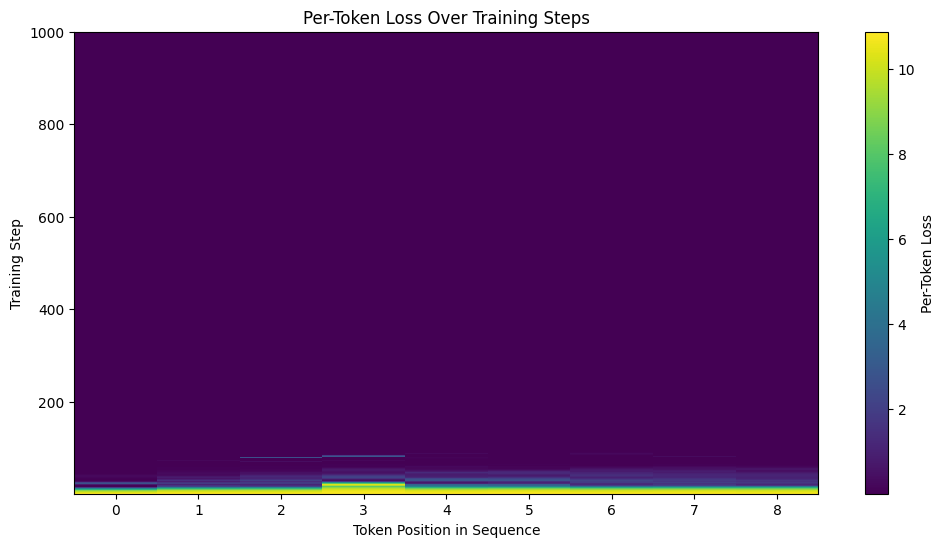

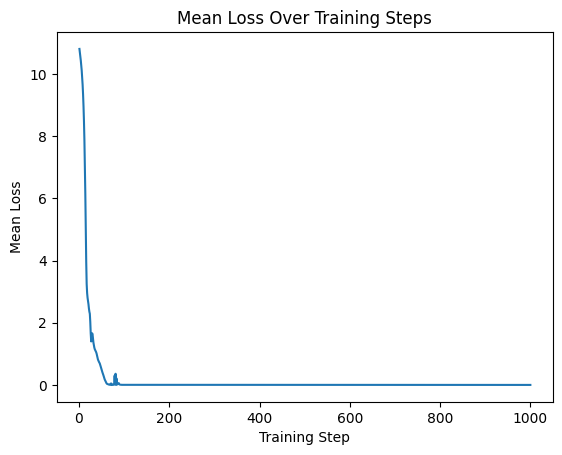

Saved final model at model_checkpoints_sequence_prediction/final_model.pt
Moving model to device:  cuda


/tmp/ipykernel_1107602/178811798.py:407: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [ ]:
import circuitsvis as cv

cv.examples.hello("Neel")


import torch
import torch.nn as nn
import einops
from fancy_einsum import einsum
import tqdm.auto as tqdm
import plotly.express as px

from jaxtyping import Float
from functools import partial


import transformer_lens.utils as utils
from transformer_lens.hook_points import (
    HookPoint,
)  
from transformer_lens import HookedTransformer, FactoredMatrix


def imshow(tensor, renderer=None, xaxis="", yaxis="", **kwargs):
    px.imshow(utils.to_numpy(tensor), color_continuous_midpoint=0.0, color_continuous_scale="RdBu", labels={"x":xaxis, "y":yaxis}, **kwargs).show(renderer)

def line(tensor, renderer=None, xaxis="", yaxis="", **kwargs):
    px.line(utils.to_numpy(tensor), labels={"x":xaxis, "y":yaxis}, **kwargs).show(renderer)

def scatter(x, y, xaxis="", yaxis="", caxis="", renderer=None, **kwargs):
    x = utils.to_numpy(x)
    y = utils.to_numpy(y)
    px.scatter(y=y, x=x, labels={"x":xaxis, "y":yaxis, "color":caxis}, **kwargs).show(renderer)

    
import torch
from torch.utils.data import Dataset, DataLoader
from dataclasses import dataclass
from typing import Optional, List, Dict
import torch.optim as optim
from torch.optim import Optimizer
from tqdm.auto import tqdm
from transformer_lens import HookedTransformer, utils
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import random
import os
import numpy as np
import matplotlib.pyplot as plt


random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


device = 'cuda' if torch.cuda.is_available() else 'cpu'


def generate_arithmetic_sequence(start, difference, length):
    return [str(start + i * difference) for i in range(length)]

def generate_fibonacci_sequence(length):
    seq = [0, 1]
    while len(seq) < length:
        seq.append(seq[-1] + seq[-2])
    return [str(num) for num in seq[:length]]

def generate_modular_sequence(start, modulus, length):
    return [str((start + i) % modulus) for i in range(length)]


class NumberTokenizer:
    def __init__(self):
        
        self.vocab = {str(i): i for i in range(-1000, 1001)}  
        self.vocab_size = len(self.vocab)
        self.pad_token = '<PAD>'
        self.pad_token_id = self.vocab_size
        self.vocab[self.pad_token] = self.pad_token_id

        
        self.id_to_token = {v: k for k, v in self.vocab.items()}

    def convert_tokens_to_ids(self, tokens):
        return [self.vocab[token] for token in tokens]

    def convert_ids_to_tokens(self, ids):
        return [self.id_to_token[id_] for id_ in ids]

    def encode(self, tokens):
        return self.convert_tokens_to_ids(tokens)

    def decode(self, ids):
        return self.convert_ids_to_tokens(ids)



from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


class SequencePredictionDataset(Dataset):
    def __init__(self, sequences: List[List[str]], tokenizer, max_seq_length):
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length
        self.data = []
        for seq in sequences:
            input_seq = seq[:-1]  
            target_seq = seq[1:]  
            
            input_ids = self.tokenizer.convert_tokens_to_ids(input_seq)
            target_ids = self.tokenizer.convert_tokens_to_ids(target_seq)
            
            input_ids = input_ids[:self.max_seq_length]
            target_ids = target_ids[:self.max_seq_length]
            self.data.append({
                "input_ids": torch.tensor(input_ids, dtype=torch.long),
                "target_ids": torch.tensor(target_ids, dtype=torch.long),
            })

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    target_ids = [item['target_ids'] for item in batch]

    
    input_ids_padded = torch.nn.utils.rnn.pad_sequence(
        input_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    target_ids_padded = torch.nn.utils.rnn.pad_sequence(
        target_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    return {'input_ids': input_ids_padded, 'target_ids': target_ids_padded}


@dataclass
class HookedTransformerTrainConfig:
    num_epochs: int
    batch_size: int
    lr: float = 1e-3
    seed: int = 0
    momentum: float = 0.0
    max_grad_norm: Optional[float] = None
    weight_decay: Optional[float] = None
    optimizer_name: str = "Adam"
    device: Optional[str] = None
    warmup_steps: int = 0
    save_every: Optional[int] = 10  
    save_dir: Optional[str] = None
    print_every: Optional[int] = 50
    max_steps: Optional[int] = None
    collate_fn: Optional[callable] = None


def train(
    model: HookedTransformer,
    config: HookedTransformerTrainConfig,
    dataset: Dataset,
) -> HookedTransformer:
    torch.manual_seed(config.seed)
    model.train()

    if config.device is None:
        config.device = utils.get_device()

    optimizer: Optimizer
    if config.optimizer_name in ["Adam", "AdamW"]:
        if config.weight_decay is not None:
            optimizer = optim.AdamW(
                model.parameters(),
                lr=config.lr,
                weight_decay=config.weight_decay,
            )
        else:
            optimizer = optim.Adam(
                model.parameters(),
                lr=config.lr,
            )
    elif config.optimizer_name == "SGD":
        optimizer = optim.SGD(
            model.parameters(),
            lr=config.lr,
            weight_decay=(config.weight_decay if config.weight_decay is not None else 0.0),
            momentum=config.momentum,
        )
    else:
        raise ValueError(f"Optimizer {config.optimizer_name} not supported")

    scheduler = None
    if config.warmup_steps > 0:
        scheduler = optim.lr_scheduler.LambdaLR(
            optimizer,
            lr_lambda=lambda step: min(1.0, step / config.warmup_steps),
        )

    dataloader = DataLoader(
        dataset,
        batch_size=config.batch_size,
        shuffle=True,
        collate_fn=config.collate_fn,
    )

    model.to(config.device)

    
    criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='none')

    per_token_loss_history = []
    mean_loss_history = []
    steps = []

    global_step = 0  

    for epoch in tqdm(range(1, config.num_epochs + 1), desc="Epochs"):
        samples = 0
        for step, batch in enumerate(tqdm(dataloader, desc="Steps", leave=False)):
            inputs = batch["input_ids"].to(config.device)
            targets = batch["target_ids"].to(config.device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets.view(-1))
            loss = loss.view(inputs.size(0), -1)  

            
            mean_loss = loss.mean()

            
            mean_loss.backward()
            if config.max_grad_norm is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), config.max_grad_norm)
            optimizer.step()
            if config.warmup_steps > 0:
                assert scheduler is not None
                scheduler.step()
            optimizer.zero_grad()

            samples += inputs.size(0)
            global_step += 1

            
            per_token_loss_history.append(loss.mean(dim=0).cpu().detach().numpy())  
            mean_loss_history.append(mean_loss.item())
            steps.append(global_step)

            if config.print_every is not None and global_step % config.print_every == 0:
                print(f"Epoch {epoch}, Step {global_step}, Samples {samples}, Loss {mean_loss.item()}")

            if (
                config.save_every is not None
                and global_step % config.save_every == 0
                and config.save_dir is not None
            ):
                if not os.path.exists(config.save_dir):
                    os.makedirs(config.save_dir)
                checkpoint_path = os.path.join(config.save_dir, f"model_step_{global_step}.pt")
                torch.save(model.state_dict(), checkpoint_path)
                print(f"Saved model checkpoint at {checkpoint_path}")

            if config.max_steps is not None and global_step >= config.max_steps:
                break

        if config.max_steps is not None and global_step >= config.max_steps:
            break

    
    per_token_loss_array = np.stack(per_token_loss_history)  

    
    plot_per_token_loss(per_token_loss_array, steps)

    
    plot_mean_loss(mean_loss_history, steps)

    return model


def plot_per_token_loss(per_token_loss_array, steps):
    
    X, Y = np.meshgrid(np.arange(per_token_loss_array.shape[1]), steps)
    
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(X, Y, per_token_loss_array, shading='auto', cmap='viridis')
    plt.colorbar(label='Per-Token Loss')
    plt.xlabel('Token Position in Sequence')
    plt.ylabel('Training Step')
    plt.title('Per-Token Loss Over Training Steps')
    plt.show()

def plot_mean_loss(mean_loss_history, steps):
    plt.figure()
    plt.plot(steps, mean_loss_history)
    plt.xlabel('Training Step')
    plt.ylabel('Mean Loss')
    plt.title('Mean Loss Over Training Steps')
    plt.show()


def generate_training_data(num_sequences, seq_length, rule):
    sequences = []
    for _ in range(num_sequences):
        if rule == 'arithmetic':
            start = random.randint(0, 10)
            difference = random.randint(1, 5)
            seq = generate_arithmetic_sequence(start, difference, seq_length + 1)  
        elif rule == 'fibonacci':
            seq = generate_fibonacci_sequence(seq_length + 1)
        elif rule == 'modular':
            start = random.randint(0, 10)
            modulus = random.randint(2, 10)
            seq = generate_modular_sequence(start, modulus, seq_length + 1)
        sequences.append(seq)
    return sequences

def generate_testing_data(num_sequences, seq_length, rule):
    sequences = []
    for _ in range(num_sequences):
        if rule == 'arithmetic':
            start = random.randint(100, 200)  
            difference = random.randint(1, 5)
            seq = generate_arithmetic_sequence(start, difference, seq_length + 1)
        elif rule == 'fibonacci':
            seq = generate_fibonacci_sequence(seq_length + 1)
        elif rule == 'modular':
            start = random.randint(100, 200)
            modulus = random.randint(2, 10)
            seq = generate_modular_sequence(start, modulus, seq_length + 1)
        sequences.append(seq)
    return sequences


max_seq_length = 10  


train_sequences = generate_training_data(num_sequences=100, seq_length=max_seq_length, rule='fibonacci')
test_sequences = generate_testing_data(num_sequences=50, seq_length=max_seq_length, rule='fibonacci')


train_dataset = SequencePredictionDataset(train_sequences, tokenizer, max_seq_length)
test_dataset = SequencePredictionDataset(test_sequences, tokenizer, max_seq_length)


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=4,
    d_model=128,
    d_head=32,  
    d_mlp=256,
    n_ctx=max_seq_length,  
    d_vocab=tokenizer.vocab_size + 1,  
    act_fn="solu",
    normalization_type=None,
    tokenizer_name='gpt2',
    device=device,
)


model = HookedTransformer(model_config)


config = HookedTransformerTrainConfig(
    num_epochs=1000,  
    batch_size=128,
    lr=1e-3,
    seed=42,
    optimizer_name='Adam',
    device=device,
    print_every=100,
    save_every=100,  
    save_dir='model_checkpoints_sequence_prediction',  
    collate_fn=collate_fn
)


trained_model = train(model, config, train_dataset)


if not os.path.exists(config.save_dir):
    os.makedirs(config.save_dir)
final_model_path = os.path.join(config.save_dir, 'final_model.pt')
torch.save(trained_model.state_dict(), final_model_path)
print(f"Saved final model at {final_model_path}")


def load_model(model_path, model_config):
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model


loaded_model = load_model(final_model_path, model_config)
loaded_model.to(device)


def test_model_on_sequence(model, tokenizer, input_sequence):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer.convert_tokens_to_ids(input_sequence[:-1])  
        input_ids = torch.tensor([input_ids], dtype=torch.long).to(model.cfg.device)
        outputs = model(input_ids)
        logits = outputs[:, -1, :]  
        predicted_id = logits.argmax(dim=-1).item()
        predicted_token = tokenizer.convert_ids_to_tokens([predicted_id])[0]
        actual_token = input_sequence[-1]
        print(f"Input Sequence: {input_sequence[:-1]}")
        print(f"Actual Next Token: {actual_token}")
        print(f"Model Predicted Token: {predicted_token}")
        return actual_token == predicted_token



In [ ]:

correct_predictions = 0
total_predictions = len(test_dataset)

for i in range(total_predictions):
    sample = test_dataset[i]
    input_ids = sample['input_ids']
    target_ids = sample['target_ids']
    input_sequence = tokenizer.convert_ids_to_tokens(input_ids.tolist())
    target_sequence = tokenizer.convert_ids_to_tokens(target_ids.tolist())
    sequence = input_sequence + [target_sequence[-1]]
    is_correct = test_model_on_sequence(loaded_model, tokenizer, sequence)
    if is_correct:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions * 100
print(f"Model accuracy on unseen sequences: {accuracy:.2f}%")


checkpoint_steps = [100, 200,300, 500, 700, 800,900,1000]  
checkpoint_paths = [os.path.join(config.save_dir, f"model_step_{step}.pt") for step in checkpoint_steps]

for checkpoint_path in checkpoint_paths:
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue
    
    model_checkpoint = HookedTransformer(model_config)
    model_checkpoint.load_state_dict(torch.load(checkpoint_path))
    model_checkpoint.to(device)
    model_checkpoint.eval()
    
    correct_predictions = 0
    total_predictions = len(test_dataset)
    for i in range(total_predictions):
        sample = test_dataset[i]
        input_ids = sample['input_ids']
        target_ids = sample['target_ids']
        input_sequence = tokenizer.convert_ids_to_tokens(input_ids.tolist())
        
        target_sequence = tokenizer.convert_ids_to_tokens(target_ids.tolist())
        sequence = input_sequence + [target_sequence[-1]]
        is_correct = test_model_on_sequence(model_checkpoint, tokenizer, sequence)
        if is_correct:
            correct_predictions += 1
    accuracy = correct_predictions / total_predictions * 100
    print(f"Model accuracy at checkpoint {checkpoint_path}: {accuracy:.2f}%")



Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 55
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 55
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 55
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 55
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 55
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 55
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 55
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 55
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13'

/tmp/ipykernel_1107602/2024128265.py:29: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 21
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 21
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 21
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 21
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 21
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 21
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 21
Input Sequence: ['0', '1', '1', '2', '3', '5', '8', '13', '21', '34']
Actual Next Token: 55
Model Predicted Token: 21
Input Sequence: ['0', '1',

/tmp/ipykernel_1107602/3891928876.py:79: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_100.pt: Loss = 0.005191353382542729
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_200.pt: Loss = 0.00019377840726519935
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_300.pt: Loss = 9.485216287430376e-05
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_500.pt: Loss = 3.6113040550844744e-05
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_700.pt: Loss = 1.8185846784035675e-05
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_800.pt: Loss = 1.384141296512098e-05
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_900.pt: Loss = 1.082148378372949e-05
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_1000.pt: Loss = 8.7

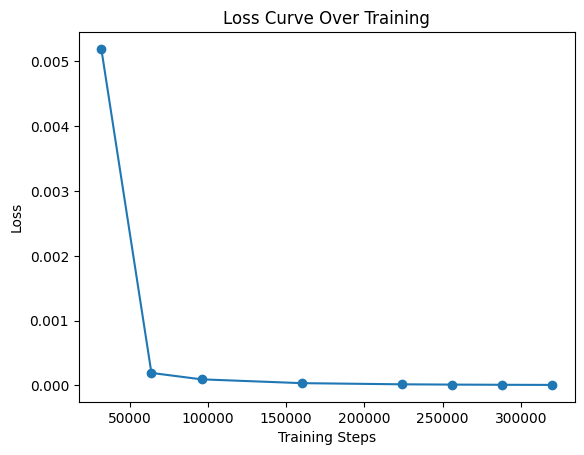

In [ ]:
  

import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os
import matplotlib.pyplot as plt


from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


device = 'cuda' if torch.cuda.is_available() else 'cpu'
max_seq_length=10

model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=4,
    d_model=128,
    d_head=32,  
    d_mlp=256,
    n_ctx=max_seq_length,  
    d_vocab=tokenizer.vocab_size + 1,  
    act_fn="solu",
    normalization_type=None,
    tokenizer_name='gpt2',
    device=device,
)


criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='mean')


checkpoint_steps = [100, 200,300, 500, 700, 800,900,1000]  
checkpoint_paths = [f'model_checkpoints_sequence_prediction/model_step_{step}.pt' for step in checkpoint_steps]


losses = []
tokens_trained_on = []


from torch.utils.data import DataLoader, Subset













eval_sequences = generate_testing_data(num_sequences=100, seq_length=max_seq_length, rule='fibonacci')  


eval_dataset = SequencePredictionDataset(eval_sequences, tokenizer, max_seq_length)


eval_dataloader = DataLoader(
    eval_dataset,
    batch_size=32,
    collate_fn=collate_fn,
)


for checkpoint_path, tokens_seen in zip(checkpoint_paths, checkpoint_steps):
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue

    
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(checkpoint_path))
    model.to(device)
    model.eval()
    total_token_seen=10*32*tokens_seen
    
    tokens_trained_on.append(total_token_seen)

    
    total_loss = 0
    num_batches = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            inputs = batch["input_ids"].to(device)
            targets = batch["target_ids"].to(device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets_shifted = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets_shifted.view(-1))
            total_loss += loss.item()
            num_batches += 1

    average_loss = total_loss / num_batches
    losses.append(average_loss)
    print(f"Checkpoint {checkpoint_path}: Loss = {average_loss}")


plt.figure()
plt.plot(tokens_trained_on, losses, marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss Curve Over Training')
plt.show()


In [29]:
batch_size = 10
seq_len = 5
random_tokens = torch.randint(1000, 10000, (batch_size, seq_len)).to(model.cfg.device)
repeated_tokens = einops.repeat(random_tokens, "batch seq_len -> batch (2 seq_len)")
repeated_tokens[:, 0] = model.tokenizer.bos_token_id

In [37]:
import torch
from torch.utils.data import Dataset, DataLoader
from dataclasses import dataclass
from typing import Optional, List, Dict
import torch.optim as optim
from torch.optim import Optimizer
from tqdm.auto import tqdm
from transformer_lens import HookedTransformer, utils
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import collections

In [ ]:

from torchtyping import TensorType as TT

def induction_score_hook(
    pattern: TT["batch", "head_index", "dest_pos", "source_pos"],
    hook: HookPoint,
):
    
    
    induction_stripe = pattern.diagonal(dim1=-2, dim2=-1, offset=1-seq_len)
    
    induction_score = einops.reduce(induction_stripe, "batch head_index position -> head_index", "mean")
    
    induction_score_store[hook.layer(), :] = induction_score


pattern_hook_names_filter = lambda name: name.endswith("pattern")

In [ ]:
checkpoint_indices = [100, 200,300, 500, 700, 800,900,1000]
checkpoint_steps = [100, 200,300, 500, 700, 800,900,1000]
model_to_scores_per_layer_head = {}
model_to_tokens_trained_on = {}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
max_seq_length=10

model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=4,
    d_model=128,
    d_head=32,  
    d_mlp=256,
    n_ctx=max_seq_length,  
    d_vocab=tokenizer.vocab_size + 1,  
    act_fn="solu",
    normalization_type=None,
    tokenizer_name='gpt2',
    device=device,
)


for model_name in [ "attn-only-2l"]:
    tokens_trained_on = []
    induction_scores_per_layer_head = collections.defaultdict(list)
    for index, tokens_seen in zip(checkpoint_indices, checkpoint_steps):
        
        
        model_checkpoint_path = f"model_checkpoints_sequence_prediction/model_step_{index}.pt"

        
        model_for_this_checkpoint = HookedTransformer(model_config) 

        
        checkpoint = torch.load(model_checkpoint_path, map_location=device)

        
        try:
            model_for_this_checkpoint.load_state_dict(torch.load(checkpoint_path))
        except RuntimeError as e:
            print(f"Error loading state_dict for checkpoint {index}: {e}")
            continue

        tokens_seen_for_this_checkpoint = tokens_seen*32*10
        tokens_trained_on.append(tokens_seen_for_this_checkpoint)


        
        induction_score_store = torch.zeros((model_for_this_checkpoint.cfg.n_layers, model_for_this_checkpoint.cfg.n_heads), device=model_for_this_checkpoint.cfg.device)

        model_for_this_checkpoint.run_with_hooks(
            repeated_tokens,
            return_type=None, 
            fwd_hooks=[(
                pattern_hook_names_filter,
                induction_score_hook
            )]
        )

        for layer in range(model_for_this_checkpoint.cfg.n_layers):
            for head in range(model_for_this_checkpoint.cfg.n_heads):
                induction_scores_per_layer_head[str(layer) + ',' + str(head)].append(induction_score_store[layer][head].item())
    model_to_scores_per_layer_head[model_name] = induction_scores_per_layer_head
    model_to_tokens_trained_on[model_name] = tokens_trained_on

/tmp/ipykernel_1107602/2568313121.py:36: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

/tmp/ipykernel_1107602/2568313121.py:40: FutureWarning:

You are using `torch.load` wi

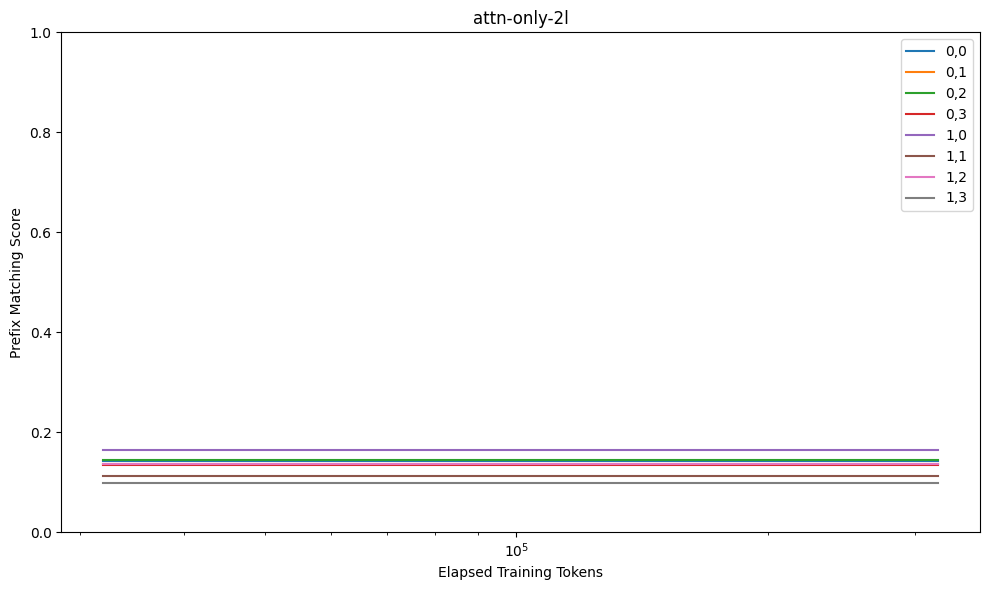

In [ ]:












import matplotlib.pyplot as plt
import numpy as np

for model_name in model_to_scores_per_layer_head:
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    scores_per_layer_head = model_to_scores_per_layer_head[model_name]
    
    
    plt.figure(figsize=(10, 6))
    plt.title(model_name)
    
    
    plt.xscale('log')
    
    
    plt.xlabel("Elapsed Training Tokens")
    plt.ylabel("Prefix Matching Score")
    
    
    
    
    
    for layer_head, scores in scores_per_layer_head.items():
        plt.plot(tokens_trained_on, scores, label=layer_head)
    
    
    plt.ylim(0.0, 1.0)
    
    
    plt.legend()
    
    
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_1107602/128255320.py:76: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_100.pt: Tokens Trained = 32000, Loss = 13.517678260803223
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_200.pt: Tokens Trained = 64000, Loss = 21.047547817230225
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_300.pt: Tokens Trained = 96000, Loss = 25.65898323059082
Moving model to device:  cuda
Checkpoint model_checkpoints_sequence_prediction/model_step_400.pt: Tokens Trained = 128000, Loss = 24.768563747406006


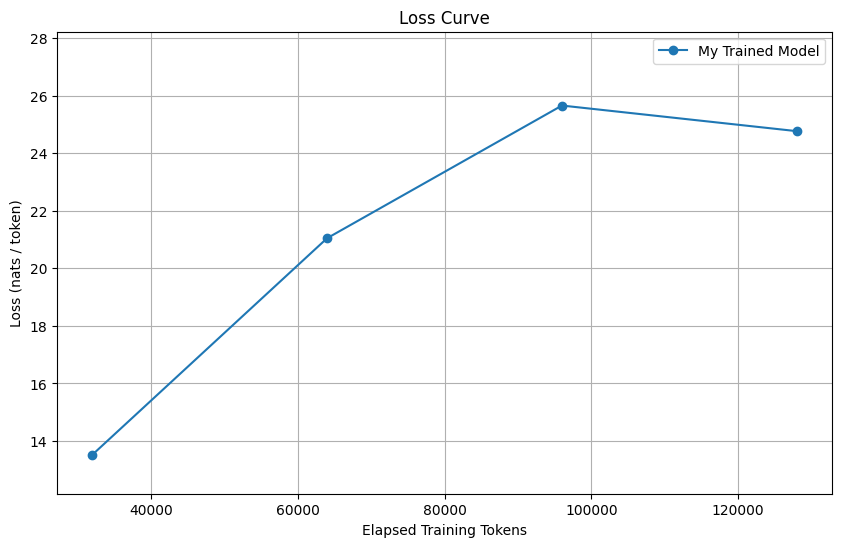

In [ ]:
import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm


from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token



device = 'cuda' if torch.cuda.is_available() else 'cpu'


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=4,
    d_model=128,
    d_head=32,  
    d_mlp=256,
    n_ctx=max_seq_length,  
    d_vocab=tokenizer.vocab_size + 1,  
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    device=device,
)


criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='mean')


checkpoint_steps = [100, 200, 300, 400]  
checkpoint_paths = [f'model_checkpoints_sequence_prediction/model_step_{step}.pt' for step in checkpoint_steps]


losses = []
tokens_trained_on = []


batch_size = config.batch_size  
max_seq_length = max_seq_length  
tokens_per_step = batch_size * max_seq_length  


from torch.utils.data import DataLoader, Subset


eval_dataset = Subset(dataset, range(100))  
eval_dataloader = DataLoader(
    eval_dataset,
    batch_size=batch_size,
    collate_fn=collate_fn,
)


model_name = "My Trained Model"
model_to_loss_curve = {}
model_to_tokens_trained_on = {}

tokens_trained_on = []
losses = []

for index in checkpoint_steps:
    checkpoint_path = f'model_checkpoints_sequence_prediction/model_step_{index}.pt'
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue

    
    model_for_this_checkpoint = HookedTransformer(model_config)
    model_for_this_checkpoint.load_state_dict(torch.load(checkpoint_path))
    model_for_this_checkpoint.to(device)
    model_for_this_checkpoint.eval()

    
    tokens_trained = index * tokens_per_step
    tokens_trained_on.append(tokens_trained)

    
    total_loss = 0
    num_batches = 0
    num_batches_to_evaluate = 10  

    with torch.no_grad():
        for i, batch in enumerate(eval_dataloader):
            inputs = batch["input_ids"].to(device)
            targets = batch["target_ids"].to(device)

            
            outputs = model_for_this_checkpoint(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets_shifted = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets_shifted.view(-1))
            total_loss += loss.item()
            num_batches += 1

            if num_batches >= num_batches_to_evaluate:
                break

    average_loss = total_loss / num_batches
    losses.append(average_loss)
    print(f"Checkpoint {checkpoint_path}: Tokens Trained = {tokens_trained}, Loss = {average_loss}")


model_to_loss_curve[model_name] = losses
model_to_tokens_trained_on[model_name] = tokens_trained_on


for model_name in model_to_loss_curve:
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    losses = model_to_loss_curve[model_name]

    plt.figure(figsize=(10, 6))
    plt.plot(tokens_trained_on, losses, marker='o', label=model_name)
    plt.title("Loss Curve")
    plt.xlabel("Elapsed Training Tokens")
    plt.ylabel("Loss (nats / token)")
    plt.grid(True)
    plt.legend()
    plt.ylim([min(losses) * 0.9, max(losses) * 1.1])  

    plt.show()


In [4]:
import plotly.io as pio
import plotly.express as px

pio.renderers.default = "notebook"
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()


In [15]:
print(pio.renderers)


Renderers configuration
-----------------------
    Default renderer: 'notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from dataclasses import dataclass
from typing import Optional, List, Dict
import torch.optim as optim
from torch.optim import Optimizer
from tqdm.auto import tqdm
from transformer_lens import HookedTransformer, utils
from transformers import GPT2Tokenizer
import torch.nn as nn
import random
import os
import matplotlib.pyplot as plt
import numpy as np


def plot_per_token_loss(per_token_loss_array, steps):
    
    X, Y = np.meshgrid(np.arange(per_token_loss_array.shape[1]), steps)
    
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(X, Y, per_token_loss_array, shading='auto', cmap='viridis')
    plt.colorbar(label='Per-Token Loss')
    plt.xlabel('Token Position in Sequence')
    plt.ylabel('Training Step')
    plt.title('Per-Token Loss Over Training Steps')
    plt.show()

def plot_mean_loss(mean_loss_history, steps):
    plt.figure()
    plt.plot(steps, mean_loss_history)
    plt.xlabel('Training Step')
    plt.ylabel('Mean Loss')
    plt.title('Mean Loss Over Training Steps')
    plt.show()


@dataclass
class HookedTransformerTrainConfig:
    num_epochs: int
    batch_size: int
    lr: float = 1e-3
    seed: int = 0
    momentum: float = 0.0
    max_grad_norm: Optional[float] = None
    weight_decay: Optional[float] = None
    optimizer_name: str = "Adam"
    device: Optional[str] = None
    warmup_steps: int = 0
    save_every: Optional[int] = None  
    save_dir: Optional[str] = None
    wandb: bool = False
    wandb_project_name: Optional[str] = None
    print_every: Optional[int] = 50
    max_steps: Optional[int] = None
    collate_fn: Optional[callable] = None



def train(
    model: HookedTransformer,
    config: HookedTransformerTrainConfig,
    train_dataset: Dataset,
    val_dataset: Dataset,
) -> HookedTransformer:
    torch.manual_seed(config.seed)
    model.train()
    if config.wandb:
        if config.wandb_project_name is None:
            config.wandb_project_name = "easy-transformer"
        wandb.init(project=config.wandb_project_name, config=vars(config))

    if config.device is None:
        config.device = utils.get_device()

    optimizer: Optimizer
    if config.optimizer_name in ["Adam", "AdamW"]:
        if config.weight_decay is not None:
            optimizer = optim.AdamW(
                model.parameters(),
                lr=config.lr,
                weight_decay=config.weight_decay,
            )
        else:
            optimizer = optim.Adam(
                model.parameters(),
                lr=config.lr,
            )
    elif config.optimizer_name == "SGD":
        optimizer = optim.SGD(
            model.parameters(),
            lr=config.lr,
            weight_decay=(config.weight_decay if config.weight_decay is not None else 0.0),
            momentum=config.momentum,
        )
    else:
        raise ValueError(f"Optimizer {config.optimizer_name} not supported")

    scheduler = None
    if config.warmup_steps > 0:
        scheduler = optim.lr_scheduler.LambdaLR(
            optimizer,
            lr_lambda=lambda step: min(1.0, step / config.warmup_steps),
        )

    train_loader = DataLoader(
        train_dataset,
        batch_size=config.batch_size,
        shuffle=True,
        collate_fn=config.collate_fn,
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        collate_fn=config.collate_fn,
    )
    steps_per_epoch = len(train_loader)
    model.to(config.device)

    
    criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='none')

    per_token_loss_history = []
    mean_loss_history = []
    val_loss_history = []  
    steps = []

    global_step = 0  

    for epoch in tqdm(range(1, config.num_epochs + 1), desc="Epochs"):
        samples = 0
        model.train()
        for step, batch in enumerate(tqdm(train_loader, desc="Steps", leave=False)):
            inputs = batch["input_ids"].to(config.device)
            targets = batch["target_ids"].to(config.device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets.view(-1))  
            loss = loss.view(inputs.size(0), -1)  

            
            mean_loss = loss.mean()

            
            mean_loss.backward()
            if config.max_grad_norm is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), config.max_grad_norm)
            optimizer.step()
            if config.warmup_steps > 0:
                assert scheduler is not None
                scheduler.step()
            optimizer.zero_grad()

            samples += inputs.size(0)
            global_step += 1

            
            per_token_loss_history.append(loss.mean(dim=0).cpu().detach().numpy())  
            mean_loss_history.append(mean_loss.item())
            steps.append(global_step)

            if config.wandb:
                wandb.log({"train_loss": mean_loss.item(), "samples": samples, "epoch": epoch})

            if config.print_every is not None and global_step % config.print_every == 0:
                print(f"Epoch {epoch}, Step {global_step}, Samples {samples}, Loss {mean_loss.item()}")

            if (
                config.save_every is not None
                and global_step % config.save_every == 0
                and config.save_dir is not None
            ):
                if not os.path.exists(config.save_dir):
                    os.makedirs(config.save_dir)
                checkpoint_path = os.path.join(config.save_dir, f"model_step_{global_step}.pt")
                torch.save(model.state_dict(), checkpoint_path)
                print(f"Saved model checkpoint at {checkpoint_path}")

            if config.max_steps is not None and global_step >= config.max_steps:
                break

        
        model.eval()
        val_loss = 0
        val_steps = 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc="Validation", leave=False):
                inputs = batch["input_ids"].to(config.device)
                targets = batch["target_ids"].to(config.device)

                outputs = model(inputs)
                logits = outputs[:, :-1, :].contiguous()
                targets = targets[:, 1:].contiguous()

                loss = criterion(logits.view(-1, logits.size(-1)), targets.view(-1))
                val_loss += loss.mean().item()
                val_steps += 1

        avg_val_loss = val_loss / val_steps
        val_loss_history.append(avg_val_loss)

        print(f"Epoch {epoch} Validation Loss: {avg_val_loss}")

        if config.max_steps is not None and global_step >= config.max_steps:
            break

    
    per_token_loss_array = np.stack(per_token_loss_history)  

    
    plot_per_token_loss(per_token_loss_array, steps)

    
    plot_mean_loss_with_validation(mean_loss_history, val_loss_history, steps, steps_per_epoch)


    return model


def plot_mean_loss_with_validation(mean_loss_history, val_loss_history, steps, steps_per_epoch):
    
    epochs_for_training_loss = [step / steps_per_epoch for step in steps]

    plt.figure(figsize=(10, 6))
    plt.plot(epochs_for_training_loss, mean_loss_history, label='Training Loss')
    plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Mean Loss Over Epochs (Train vs Validation)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()





class SequenceReversalDataset(Dataset):
    def __init__(self, sequences: List[List[str]], tokenizer, max_seq_length):
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length
        self.data = []
        for seq in sequences:
            input_seq = seq
            target_seq = seq[::-1]  
            
            input_ids = self.tokenizer.convert_tokens_to_ids(input_seq)
            target_ids = self.tokenizer.convert_tokens_to_ids(target_seq)
            
            input_ids = input_ids[:self.max_seq_length]
            target_ids = target_ids[:self.max_seq_length]
            self.data.append({
                "input_ids": torch.tensor(input_ids, dtype=torch.long),
                "target_ids": torch.tensor(target_ids, dtype=torch.long),
            })

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  


max_seq_length = 5  
def generate_reversal_data(tokenizer, num_samples=1000, seq_len=10):
    sequences = []
    for _ in range(num_samples):
        seq = [str(random.randint(0, 9)) for _ in range(seq_len)]  
        sequences.append(seq)
    return sequences



sequences = generate_reversal_data(tokenizer, num_samples=5000, seq_len=max_seq_length)
dataset = SequenceReversalDataset(sequences, tokenizer, max_seq_length)

from sklearn.model_selection import train_test_split


train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])



def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    target_ids = [item['target_ids'] for item in batch]

    
    input_ids_padded = torch.nn.utils.rnn.pad_sequence(
        input_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    target_ids_padded = torch.nn.utils.rnn.pad_sequence(
        target_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    
    input_ids_padded = input_ids_padded[:, :max_seq_length]
    if input_ids_padded.size(1) < max_seq_length:
        padding = torch.full(
            (input_ids_padded.size(0), max_seq_length - input_ids_padded.size(1)),
            tokenizer.pad_token_id,
            dtype=torch.long
        )
        input_ids_padded = torch.cat([input_ids_padded, padding], dim=1)

    target_ids_padded = target_ids_padded[:, :max_seq_length]
    if target_ids_padded.size(1) < max_seq_length:
        padding = torch.full(
            (target_ids_padded.size(0), max_seq_length - target_ids_padded.size(1)),
            tokenizer.pad_token_id,
            dtype=torch.long
        )
        target_ids_padded = torch.cat([target_ids_padded, padding], dim=1)

    return {'input_ids': input_ids_padded, 'target_ids': target_ids_padded}


from transformer_lens.HookedTransformerConfig import HookedTransformerConfig


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=False,
    
    device='cuda' if torch.cuda.is_available() else 'cpu',
)


model = HookedTransformer(model_config)


config = HookedTransformerTrainConfig(
    num_epochs=100,  
    batch_size=100,
    lr=1e-3,
    seed=42,
    optimizer_name='Adam',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    print_every=100,
    save_every=100,  
    save_dir='model_checkpoints_mlp_2l_test',  
    collate_fn=collate_fn
)


trained_model = train(model, config, train_dataset,val_dataset )


final_model_path = os.path.join(config.save_dir, 'final_model.pt')
torch.save(trained_model.state_dict(), final_model_path)
print(f"Saved final model at {final_model_path}")



def load_model(model_path, model_config):
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model


loaded_model = load_model(final_model_path, model_config)


def test_model(model, tokenizer, input_sequence):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer.convert_tokens_to_ids(input_sequence)
        input_ids = torch.tensor([input_ids], dtype=torch.long).to(model.cfg.device)
        outputs = model(input_ids)  
        
        logits = outputs[:, :-1, :]  
        
        predicted_ids = logits.argmax(dim=-1).squeeze().tolist()
        
        predicted_tokens = tokenizer.convert_ids_to_tokens(predicted_ids)
        print("Input Sequence: ", input_sequence)
        print("Model Output:   ", predicted_tokens)






Moving model to device:  cuda


Epochs:   1%|          | 1/100 [00:02<03:33,  2.15s/it]

Epoch 1 Validation Loss: 2.2964134931564333


Epochs:   2%|▏         | 2/100 [00:03<03:08,  1.92s/it]

Epoch 2 Validation Loss: 2.1665154933929442


Epoch 3, Step 100, Samples 2000, Loss 2.0342280864715576
Saved model checkpoint at model_checkpoints_mlp_2l_test/model_step_100.pt


Epochs:   2%|▏         | 2/100 [00:05<04:23,  2.69s/it]


KeyboardInterrupt: 

In [250]:
max_seq_length

5

In [ ]:

import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    attn_only=False,
    normalization_type=None,
    tokenizer_name="gpt2",
    device='cuda' if torch.cuda.is_available() else 'cpu',
)


model = HookedTransformer(model_config)


5


/tmp/ipykernel_3538275/3038992801.py:60: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_100.pt: Loss = 2.0728771686553955
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_200.pt: Loss = 1.4802606105804443
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_400.pt: Loss = 1.1763455271720886
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_600.pt: Loss = 1.1768872141838074
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_800.pt: Loss = 1.1736230850219727
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_1000.pt: Loss = 1.180720955133438
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_1200.pt: Loss = 1.178978979587555
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_1400.pt: Loss = 1.1707307994365692
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_1600.pt: Loss = 1.160169780254364


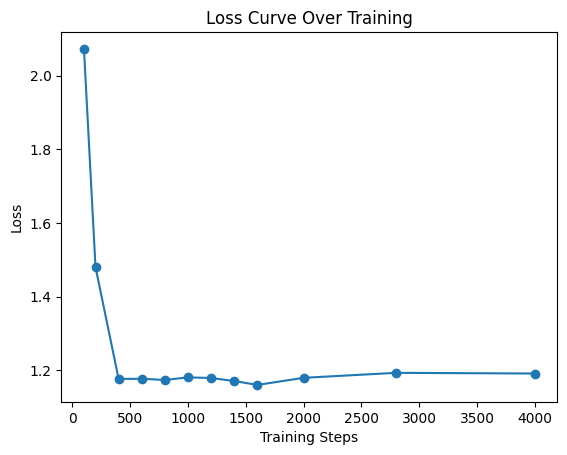

In [ ]:
import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os
import matplotlib.pyplot as plt


from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(max_seq_length)

model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    attn_only=False,
    normalization_type=None,
    tokenizer_name="gpt2",
    device='cuda' if torch.cuda.is_available() else 'cpu',
)

criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='mean')


checkpoint_steps = [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 2000, 2800, 4000]  
checkpoint_paths = [f'model_checkpoints_mlp_2l/model_step_{step}.pt' for step in checkpoint_steps]


losses = []
tokens_trained_on = []


from torch.utils.data import DataLoader, Subset


eval_dataset = Subset(dataset, range(100))  
eval_dataloader = DataLoader(
    eval_dataset,
    batch_size=32,
    collate_fn=collate_fn,
)

for checkpoint_path, tokens_seen in zip(checkpoint_paths, checkpoint_steps):
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue

    
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(checkpoint_path))
    model.to(device)
    model.eval()
    

    tokens_trained_on.append(tokens_seen)

    
    total_loss = 0
    num_batches = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            inputs = batch["input_ids"].to(device)
            targets = batch["target_ids"].to(device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets_shifted = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets_shifted.view(-1))
            total_loss += loss.item()
            num_batches += 1

    average_loss = total_loss / num_batches
    losses.append(average_loss)
    print(f"Checkpoint {checkpoint_path}: Loss = {average_loss}")


plt.figure()
plt.plot(tokens_trained_on, losses, marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss Curve Over Training')
plt.show()


/tmp/ipykernel_3538275/1282637435.py:66: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_100.pt: Tokens Trained = 50000, Loss = 2.085524320602417
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_200.pt: Tokens Trained = 100000, Loss = 1.4823238849639893
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_400.pt: Tokens Trained = 200000, Loss = 1.1813715696334839
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_600.pt: Tokens Trained = 300000, Loss = 1.176787257194519
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_800.pt: Tokens Trained = 400000, Loss = 1.1706993579864502
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_1000.pt: Tokens Trained = 500000, Loss = 1.1700892448425293
Moving model to device:  cuda
Checkpoint model_checkpoints_mlp_2l/model_step_1200.pt: Tokens Trained = 600000, Loss = 1.1731781959533691
Moving model to device:  cuda
Checkpoint model_ch

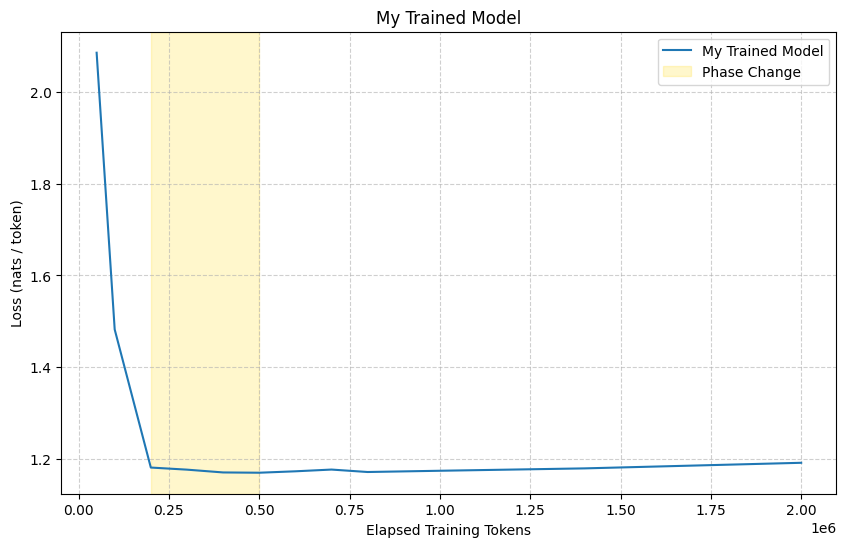

In [ ]:
import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os
import plotly.express as px


from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


device = 'cuda' if torch.cuda.is_available() else 'cpu'


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=False,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)


criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='mean')


checkpoint_steps =[100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 2000, 2800, 4000]  
checkpoint_paths = [f'model_checkpoints_mlp_2l/model_step_{step}.pt' for step in checkpoint_steps]


losses = []
tokens_trained_on = []


batch_size = config.batch_size  
max_seq_length = max_seq_length  
tokens_per_step = batch_size * max_seq_length  


from torch.utils.data import DataLoader, Subset


eval_dataset = Subset(dataset, range(100))  
eval_dataloader = DataLoader(
    eval_dataset,
    batch_size=batch_size,
    collate_fn=collate_fn,
)

for checkpoint_path, step in zip(checkpoint_paths, checkpoint_steps):
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue

    
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(checkpoint_path))
    model.to(device)
    model.eval()

    
    tokens_trained = step * tokens_per_step
    tokens_trained_on.append(tokens_trained)

    
    total_loss = 0
    num_batches = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            inputs = batch["input_ids"].to(device)
            targets = batch["target_ids"].to(device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets_shifted = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets_shifted.view(-1))
            total_loss += loss.item()
            num_batches += 1

    average_loss = total_loss / num_batches
    losses.append(average_loss)
    print(f"Checkpoint {checkpoint_path}: Tokens Trained = {tokens_trained}, Loss = {average_loss}")


model_name = 'My Trained Model'
model_to_loss_curve = {model_name: losses}
model_to_tokens_trained_on = {model_name: tokens_trained_on}

import plotly.express as px

import matplotlib.pyplot as plt

for model_name in model_to_loss_curve:
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    losses = model_to_loss_curve[model_name]
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(tokens_trained_on, losses, label=model_name)
    plt.title(model_name)
    plt.xlabel("Elapsed Training Tokens")
    plt.ylabel("Loss (nats / token)")
    
    
    min_loss = min(losses)
    max_loss = max(losses)
    
    
    
    
    
    
    x0, x1 = 0.20e6, 0.5e6  
    plt.axvspan(x0, x1, color='gold', alpha=0.2, label="Phase Change")

    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    
    filename = f"{model_name}.svg"
    plt.savefig(filename, format="svg")
    print(f"Saved plot for {model_name} as {filename}")
    
    
    plt.show()



Saved log-scale plot for My Trained Model as My Trained Model_log_scale.svg


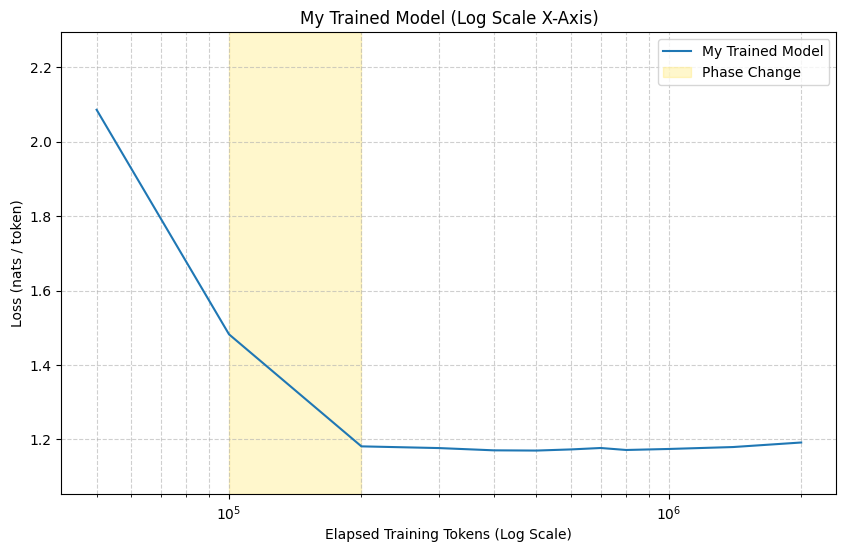

In [ ]:
import matplotlib.pyplot as plt

for model_name in model_to_loss_curve:
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    losses = model_to_loss_curve[model_name]
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(tokens_trained_on, losses, label=model_name)
    plt.title(f"{model_name} (Log Scale X-Axis)")
    plt.xlabel("Elapsed Training Tokens (Log Scale)")
    plt.ylabel("Loss (nats / token)")
    
    
    plt.xscale("log")
    
    
    min_loss = min(losses)
    max_loss = max(losses)
    plt.ylim([min_loss * 0.9, max_loss * 1.1])
    
    
    
    x0, x1 = 1e5, 2e5  
    plt.axvspan(x0, x1, color='gold', alpha=0.2, label="Phase Change")
    
    
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    
    
    filename = f"{model_name}_log_scale.svg"
    plt.savefig(filename, format="svg")
    print(f"Saved log-scale plot for {model_name} as {filename}")
    
    
    plt.show()


In [11]:
max_seq_length = 5

/tmp/ipykernel_3538275/205051995.py:74: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Saved plot for My Trained Model as My Trained Model_loss_curve.svg


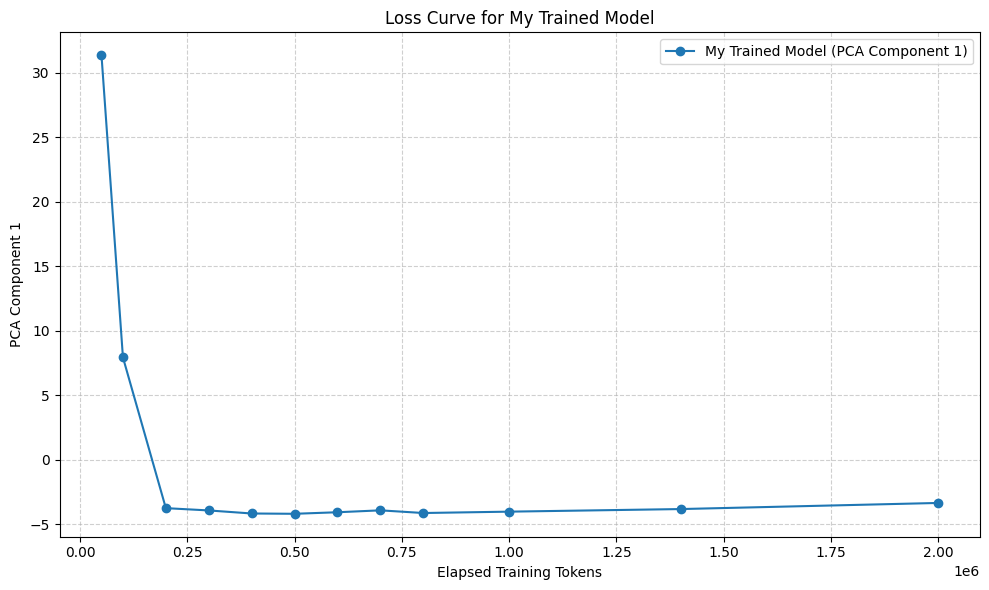

In [ ]:
import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os


from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


device = 'cuda' if torch.cuda.is_available() else 'cpu'


pca = PCA(n_components=2)
scaler = StandardScaler()


checkpoint_indices = [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 2000, 2800, 4000]
checkpoint_steps =[100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 2000, 2800, 4000]  
checkpoint_paths = [f'model_checkpoints_mlp_2l/model_step_{step}.pt' for step in checkpoint_steps]
model_to_pca_features = {}
model_to_tokens_trained_on = {}


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=False,
    device=device,
)


criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='mean')


eval_dataset = Subset(dataset, range(100))  
eval_dataloader = DataLoader(
    eval_dataset,
    batch_size=batch_size,
    collate_fn=collate_fn,
)
loss_data_matrix = torch.zeros((len(checkpoint_indices), len(eval_dataloader) * config.batch_size))
tokens_trained_on = []
batch_size = config.batch_size  
max_seq_length = max_seq_length  
tokens_per_step = batch_size * max_seq_length  


from torch.utils.data import DataLoader, Subset



for pos, index in enumerate(checkpoint_indices):
    
    checkpoint_path = f"model_checkpoints_mlp_2l/model_step_{index}.pt"
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue

    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(checkpoint_path))
    model.to(device)
    model.eval()

    tokens_seen_for_this_checkpoint = index * config.batch_size * max_seq_length
    tokens_trained_on.append(tokens_seen_for_this_checkpoint)

    
    loss_vec_store = torch.zeros((len(eval_dataloader) * config.batch_size, max_seq_length - 1))

    
    for i, batch in enumerate(eval_dataloader):
        inputs = batch["input_ids"].to(device)
        
        targets = batch["target_ids"].to(device)

        
        logits = model(inputs)[:, :-1, :].contiguous()
        targets_shifted = targets[:, 1:].contiguous()

        
        loss_vec = criterion(logits.view(-1, logits.size(-1)), targets_shifted.view(-1))
        loss_vec_store[i * config.batch_size:(i + 1) * config.batch_size] = loss_vec.cpu()

    
    sampled_indices = torch.randint(0, loss_vec_store.shape[1], (loss_vec_store.shape[0],))
    loss_sampled = loss_vec_store[torch.arange(loss_vec_store.shape[0]), sampled_indices]
    loss_data_matrix[pos] = loss_sampled.cpu()

model_name = 'My Trained Model'


    
loss_data_scaled = scaler.fit_transform(loss_data_matrix.detach().numpy())
pca_features = pca.fit_transform(loss_data_scaled)

model_to_pca_features= {model_name: pca_features}
model_to_tokens_trained_on = {model_name :tokens_trained_on}


for model_name in model_to_pca_features:
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    pca_features = model_to_pca_features[model_name]

    
    plt.figure(figsize=(10, 6))
    plt.plot(tokens_trained_on, pca_features[:, 0], label=f"{model_name} (PCA Component 1)", marker='o')
    plt.title(f"Loss Curve for {model_name}")
    plt.xlabel("Elapsed Training Tokens")
    plt.ylabel("PCA Component 1")
    plt.grid(True, linestyle='--', alpha=0.6)

    
    

    plt.legend()
    plt.tight_layout()

    
    filename = f"{model_name}_loss_curve.svg"
    plt.savefig(filename, format="svg")
    print(f"Saved plot for {model_name} as {filename}")

    plt.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

for model_name in model_to_pca_features:
    pca_features = model_to_pca_features[model_name]
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    
    
    fig1 = go.Figure()
    for i in range(1, len(pca_features)):
        
        line_color = "red" if 0.20e6 <= tokens_trained_on[i] <= 0.5e6 else 'blue'
        fig1.add_trace(go.Scatter(x=pca_features[i-1: i+1, 0],
                                    y=pca_features[i-1: i+1, 1],
                                    line={"width": 1, "dash": "dash", "color": line_color}, showlegend=False))
    fig1.update(layout_showlegend=False)
    
    
 
    fig2 = px.scatter(x=pca_features[:, 0], y=pca_features[:, 1], color=list(map(str, tokens_trained_on)))
    
    
    fig3 = go.Figure(data=fig1.data + fig2.data)
    fig3.update_layout(legend_title="Elapsed Training Tokens", title=model_name)
    
    
    fig3.write_image(f"{model_name}_pca_plot.png")  
    print(f"Saved figure for {model_name} as {model_name}_pca_plot.png")
    
    
    fig3.show()

Saved figure for My Trained Model as My Trained Model_pca_plot.png


In [ ]:
import torch
from torch.nn import CrossEntropyLoss
from transformer_lens import HookedTransformer, HookedTransformerConfig


context = torch.tensor([[1, 2, 3, 4, 5]], dtype=torch.long).to(device)  
gold_labels = context.flip(dims=[1])  


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,
    d_mlp=256,
    n_ctx=6,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=False,
    device=device,
)


model_before_phase_change = HookedTransformer(model_config)
model_before_phase_change.load_state_dict(torch.load("model_checkpoints_mlp_2l/model_step_300.pt"))
model_before_phase_change.to(device)
model_before_phase_change.eval()

model_after_phase_change = HookedTransformer(model_config)
model_after_phase_change.load_state_dict(torch.load("model_checkpoints_mlp_2l/model_step_1000.pt"))
model_after_phase_change.to(device)
model_after_phase_change.eval()


criterion = CrossEntropyLoss()


with torch.no_grad():
    
    logits_before = model_before_phase_change(context)  
    logits_after = model_after_phase_change(context)  

    
    logits_before_flat = logits_before.view(-1, logits_before.size(-1))  
    logits_after_flat = logits_after.view(-1, logits_after.size(-1))  
    gold_labels_flat = gold_labels.view(-1)  

    
    loss_vec_before = criterion(logits_before_flat, gold_labels_flat)
    loss_vec_after = criterion(logits_after_flat, gold_labels_flat)


loss_vec_difference = loss_vec_after - loss_vec_before


print("Loss before phase change:", loss_vec_before.item())
print("Loss after phase change:", loss_vec_after.item())
print("Loss difference:", loss_vec_difference.item())


/tmp/ipykernel_3538275/2638034544.py:27: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Moving model to device:  cuda
Loss before phase change: 18.605703353881836
Loss after phase change: 14.738970756530762
Loss difference: -3.866732597351074


/tmp/ipykernel_3538275/2638034544.py:32: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



["tensor([1, 2, 3, 4, 5], device='cuda:0')"]


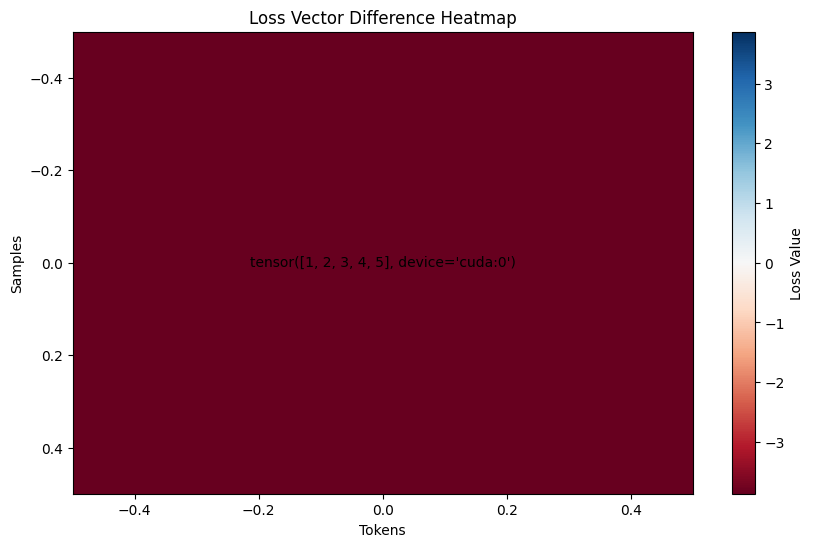

In [ ]:

str_tokens = [str(num) for num in context] 
print(str_tokens)
z = loss_vec_difference.cpu().numpy().reshape(1, -1) 
z_text = np.array(str_tokens * (z.shape[1] // len(str_tokens) + 1))[:z.shape[1]]  


plt.figure(figsize=(10, 6))
heatmap = plt.imshow(z, cmap='RdBu', aspect='auto', vmin=-np.max(np.abs(z)), vmax=np.max(np.abs(z)))


for (i, j), val in np.ndenumerate(z):
    plt.text(j, i, z_text[j], ha='center', va='center', color='black')


plt.colorbar(heatmap, label='Loss Value')


plt.title('Loss Vector Difference Heatmap')
plt.xlabel('Tokens')
plt.ylabel('Samples')


plt.show()

/tmp/ipykernel_3538275/3873222182.py:27: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda


/tmp/ipykernel_3538275/3873222182.py:58: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



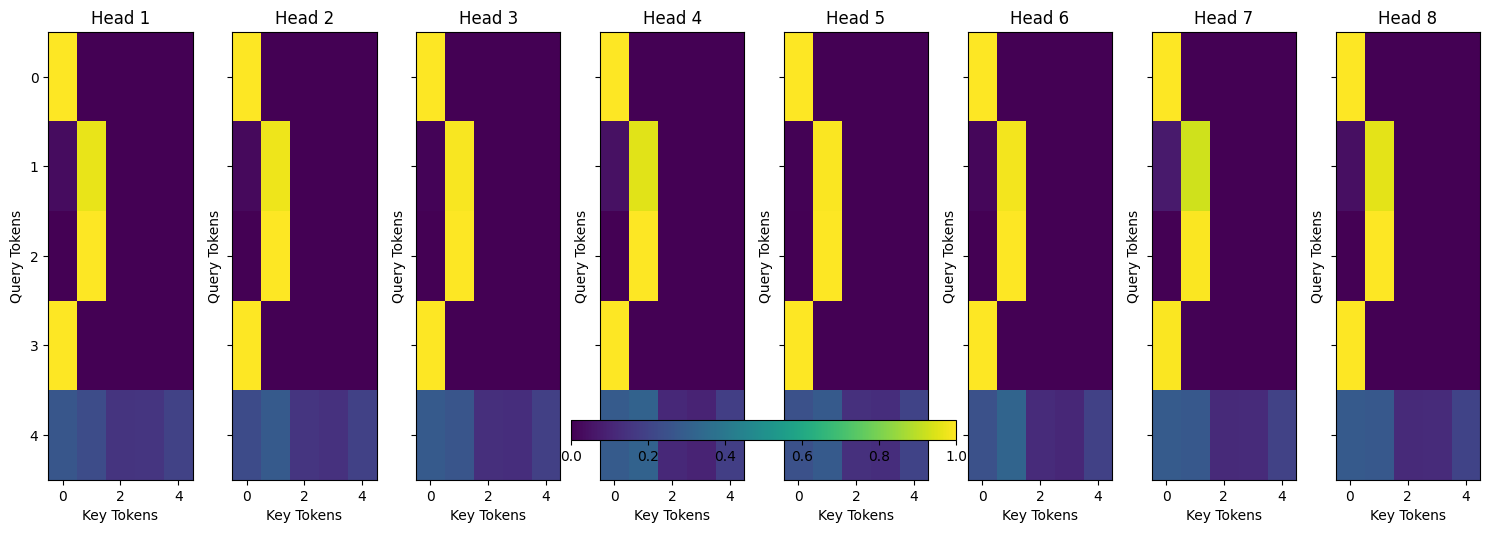

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformer_lens import HookedTransformer


context = torch.tensor([[1, 2, 3, 4, 5]], dtype=torch.long).to(device)  


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,
    d_mlp=256,
    n_ctx=6,
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=False,
    device=device,
)


model = HookedTransformer(model_config)
model.load_state_dict(torch.load("model_checkpoints_mlp_2l/model_step_300.pt"))
model.to(device)
model.eval()


with torch.no_grad():
    logits, cache = model.run_with_cache(context)  
    attention_weights = cache["pattern", 0]  


attention_weights_np = attention_weights[0].cpu().numpy()  


num_heads = attention_weights_np.shape[0]
fig, axes = plt.subplots(1, num_heads, figsize=(15, 5), sharey=True)

for head in range(num_heads):
    ax = axes[head]
    heatmap = ax.imshow(
        attention_weights_np[head],
        cmap="viridis",
        aspect="auto",
        vmin=0,
        vmax=1,
    )
    ax.set_title(f"Head {head+1}")
    ax.set_xlabel("Key Tokens")
    ax.set_ylabel("Query Tokens")


fig.colorbar(heatmap, ax=axes, orientation="horizontal", fraction=0.05, pad=0.2)
plt.tight_layout()
plt.show()


Moving model to device:  cuda


Epochs:   1%|          | 1/100 [00:02<04:34,  2.77s/it]

Epoch 1 Validation Loss: 2.8790944814682007


Epochs:   2%|▏         | 2/100 [00:05<04:22,  2.68s/it]

Epoch 2 Validation Loss: 2.5053228735923767


Epochs:   3%|▎         | 3/100 [00:07<04:11,  2.59s/it]

Epoch 3 Validation Loss: 1.9355712234973907


Epoch 4, Step 100, Samples 400, Loss 1.9112721681594849


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_100.pt


Epochs:   4%|▍         | 4/100 [00:10<04:25,  2.76s/it]

Epoch 4 Validation Loss: 0.9708285704255104


Epochs:   5%|▌         | 5/100 [00:13<04:14,  2.67s/it]

Epoch 5 Validation Loss: 0.5297194793820381


Epochs:   6%|▌         | 6/100 [00:16<04:10,  2.67s/it]

Epoch 6 Validation Loss: 0.3953205831348896


Epoch 7, Step 200, Samples 800, Loss 0.37440353631973267


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_200.pt


Epochs:   7%|▋         | 7/100 [00:18<04:10,  2.69s/it]

Epoch 7 Validation Loss: 0.3175343871116638


Epochs:   8%|▊         | 8/100 [00:21<04:04,  2.66s/it]

Epoch 8 Validation Loss: 1.2684075981378555


Epochs:   9%|▉         | 9/100 [00:24<04:01,  2.65s/it]

Epoch 9 Validation Loss: 0.40798525884747505


Epoch 10, Step 300, Samples 1200, Loss 0.3637947738170624


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_300.pt


Epochs:  10%|█         | 10/100 [00:26<04:01,  2.69s/it]

Epoch 10 Validation Loss: 0.2942631281912327


Epochs:  11%|█         | 11/100 [00:29<03:57,  2.67s/it]

Epoch 11 Validation Loss: 0.24684343114495277


Epochs:  12%|█▏        | 12/100 [00:31<03:49,  2.61s/it]

Epoch 12 Validation Loss: 0.23069844767451286


Epoch 13, Step 400, Samples 1600, Loss 0.20817649364471436


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_400.pt


Epochs:  13%|█▎        | 13/100 [00:34<03:54,  2.70s/it]

Epoch 13 Validation Loss: 0.21201064437627792


Epochs:  14%|█▍        | 14/100 [00:37<03:47,  2.64s/it]

Epoch 14 Validation Loss: 0.20711185596883297


Epochs:  15%|█▌        | 15/100 [00:39<03:42,  2.62s/it]

Epoch 15 Validation Loss: 0.19485803693532944


Epoch 16, Step 500, Samples 2000, Loss 0.17994526028633118


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_500.pt


Epochs:  16%|█▌        | 16/100 [00:42<03:49,  2.73s/it]

Epoch 16 Validation Loss: 0.182753287255764


Epochs:  17%|█▋        | 17/100 [00:45<03:40,  2.66s/it]

Epoch 17 Validation Loss: 0.1815292201936245


Epochs:  18%|█▊        | 18/100 [00:48<03:38,  2.66s/it]

Epoch 18 Validation Loss: 0.1753663569688797


Epoch 19, Step 600, Samples 2400, Loss 0.1726187914609909


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_600.pt


Epochs:  19%|█▉        | 19/100 [00:50<03:38,  2.70s/it]

Epoch 19 Validation Loss: 0.17706845700740814


Epochs:  20%|██        | 20/100 [00:53<03:34,  2.69s/it]

Epoch 20 Validation Loss: 0.1627835538238287


Epochs:  21%|██        | 21/100 [00:56<03:31,  2.67s/it]

Epoch 21 Validation Loss: 0.1714076418429613


Epoch 22, Step 700, Samples 2800, Loss 0.1682225465774536


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_700.pt


Epochs:  22%|██▏       | 22/100 [00:58<03:31,  2.71s/it]

Epoch 22 Validation Loss: 0.16706862300634384


Epochs:  23%|██▎       | 23/100 [01:01<03:25,  2.67s/it]

Epoch 23 Validation Loss: 0.1647444274276495


Epochs:  24%|██▍       | 24/100 [01:03<03:17,  2.60s/it]

Epoch 24 Validation Loss: 0.1578103043138981


Epoch 25, Step 800, Samples 3200, Loss 0.15344180166721344


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_800.pt


Epochs:  25%|██▌       | 25/100 [01:06<03:23,  2.72s/it]

Epoch 25 Validation Loss: 0.1559421494603157


Epochs:  26%|██▌       | 26/100 [01:09<03:18,  2.68s/it]

Epoch 26 Validation Loss: 0.1576014030724764


Epochs:  27%|██▋       | 27/100 [01:12<03:11,  2.63s/it]

Epoch 27 Validation Loss: 0.15314659290015697


Epochs:  28%|██▊       | 28/100 [01:14<03:10,  2.64s/it]

Epoch 28 Validation Loss: 0.15846826881170273


Epoch 29, Step 900, Samples 400, Loss 0.14287085831165314


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_900.pt


Epochs:  29%|██▉       | 29/100 [01:17<03:10,  2.69s/it]

Epoch 29 Validation Loss: 0.14757447130978107


Epochs:  30%|███       | 30/100 [01:20<03:05,  2.65s/it]

Epoch 30 Validation Loss: 0.1515176258981228


Epochs:  31%|███       | 31/100 [01:22<03:00,  2.61s/it]

Epoch 31 Validation Loss: 0.15458366461098194


Epoch 32, Step 1000, Samples 800, Loss 0.14736329019069672


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1000.pt


Epochs:  32%|███▏      | 32/100 [01:25<03:03,  2.71s/it]

Epoch 32 Validation Loss: 0.14453675970435143


Epochs:  33%|███▎      | 33/100 [01:28<02:59,  2.68s/it]

Epoch 33 Validation Loss: 0.14117695204913616


Epochs:  34%|███▍      | 34/100 [01:30<02:51,  2.61s/it]

Epoch 34 Validation Loss: 0.14534777589142323


Epoch 35, Step 1100, Samples 1200, Loss 0.14701929688453674


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1100.pt


Epochs:  35%|███▌      | 35/100 [01:33<02:53,  2.67s/it]

Epoch 35 Validation Loss: 0.1456803623586893


Epochs:  36%|███▌      | 36/100 [01:35<02:49,  2.65s/it]

Epoch 36 Validation Loss: 0.14159037545323372


Epochs:  37%|███▋      | 37/100 [01:38<02:43,  2.59s/it]

Epoch 37 Validation Loss: 0.13691224344074726


Epoch 38, Step 1200, Samples 1600, Loss 0.13399536907672882


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1200.pt


Epochs:  38%|███▊      | 38/100 [01:41<02:44,  2.66s/it]

Epoch 38 Validation Loss: 0.15266120247542858


Epochs:  39%|███▉      | 39/100 [01:43<02:36,  2.56s/it]

Epoch 39 Validation Loss: 0.14095397107303143


Epochs:  40%|████      | 40/100 [01:46<02:33,  2.57s/it]

Epoch 40 Validation Loss: 0.14100123569369316


Epoch 41, Step 1300, Samples 2000, Loss 0.1343493014574051


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1300.pt


Epochs:  41%|████      | 41/100 [01:48<02:33,  2.60s/it]

Epoch 41 Validation Loss: 0.14175358414649963


Epochs:  42%|████▏     | 42/100 [01:51<02:30,  2.60s/it]

Epoch 42 Validation Loss: 0.13649982400238514


Epochs:  43%|████▎     | 43/100 [01:53<02:25,  2.55s/it]

Epoch 43 Validation Loss: 0.1399465948343277


Epoch 44, Step 1400, Samples 2400, Loss 0.14060568809509277


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1400.pt


Epochs:  44%|████▍     | 44/100 [01:56<02:27,  2.63s/it]

Epoch 44 Validation Loss: 0.13546313904225826


Epochs:  45%|████▌     | 45/100 [01:59<02:24,  2.63s/it]

Epoch 45 Validation Loss: 0.13250995613634586


Epochs:  46%|████▌     | 46/100 [02:01<02:18,  2.56s/it]

Epoch 46 Validation Loss: 0.13517077080905437


Epoch 47, Step 1500, Samples 2800, Loss 0.13461387157440186


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1500.pt


Epochs:  47%|████▋     | 47/100 [02:04<02:19,  2.64s/it]

Epoch 47 Validation Loss: 0.13362987712025642


Epochs:  48%|████▊     | 48/100 [02:06<02:14,  2.59s/it]

Epoch 48 Validation Loss: 0.13240954838693142


Epochs:  49%|████▉     | 49/100 [02:09<02:12,  2.59s/it]

Epoch 49 Validation Loss: 0.13666260056197643


Epoch 50, Step 1600, Samples 3200, Loss 0.1320001780986786


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1600.pt


Epochs:  50%|█████     | 50/100 [02:12<02:12,  2.65s/it]

Epoch 50 Validation Loss: 0.13961797952651978


Epochs:  51%|█████     | 51/100 [02:14<02:07,  2.60s/it]

Epoch 51 Validation Loss: 0.1370964553207159


Epochs:  52%|█████▏    | 52/100 [02:17<02:05,  2.61s/it]

Epoch 52 Validation Loss: 0.12985502369701862


Epochs:  53%|█████▎    | 53/100 [02:19<01:59,  2.54s/it]

Epoch 53 Validation Loss: 0.13309975899755955


Epoch 54, Step 1700, Samples 400, Loss 0.13216030597686768


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1700.pt


Epochs:  54%|█████▍    | 54/100 [02:22<01:59,  2.61s/it]

Epoch 54 Validation Loss: 0.13072479888796806


Epochs:  55%|█████▌    | 55/100 [02:25<01:54,  2.55s/it]

Epoch 55 Validation Loss: 0.13212144561111927


Epochs:  56%|█████▌    | 56/100 [02:27<01:52,  2.56s/it]

Epoch 56 Validation Loss: 0.13037619460374117


Epoch 57, Step 1800, Samples 800, Loss 0.12824393808841705


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1800.pt


Epochs:  57%|█████▋    | 57/100 [02:30<01:53,  2.64s/it]

Epoch 57 Validation Loss: 0.1288196872919798


Epochs:  58%|█████▊    | 58/100 [02:32<01:49,  2.60s/it]

Epoch 58 Validation Loss: 0.13715429976582527


Epochs:  59%|█████▉    | 59/100 [02:35<01:45,  2.58s/it]

Epoch 59 Validation Loss: 0.1298044864088297


Epoch 60, Step 1900, Samples 1200, Loss 0.13413305580615997


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_1900.pt


Epochs:  60%|██████    | 60/100 [02:38<01:45,  2.64s/it]

Epoch 60 Validation Loss: 0.13194209337234497


Epochs:  61%|██████    | 61/100 [02:40<01:41,  2.61s/it]

Epoch 61 Validation Loss: 0.13297012262046337


Epochs:  62%|██████▏   | 62/100 [02:43<01:36,  2.54s/it]

Epoch 62 Validation Loss: 0.13066756539046764


Epoch 63, Step 2000, Samples 1600, Loss 0.13493439555168152


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2000.pt


Epochs:  63%|██████▎   | 63/100 [02:46<01:37,  2.63s/it]

Epoch 63 Validation Loss: 0.13002843596041203


Epochs:  64%|██████▍   | 64/100 [02:48<01:33,  2.61s/it]

Epoch 64 Validation Loss: 0.129285903647542


Epochs:  65%|██████▌   | 65/100 [02:51<01:29,  2.56s/it]

Epoch 65 Validation Loss: 0.134785333648324


Epoch 66, Step 2100, Samples 2000, Loss 0.12658299505710602


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2100.pt


Epochs:  66%|██████▌   | 66/100 [02:53<01:29,  2.63s/it]

Epoch 66 Validation Loss: 0.1316240131855011


Epochs:  67%|██████▋   | 67/100 [02:56<01:24,  2.56s/it]

Epoch 67 Validation Loss: 0.14382425509393215


Epochs:  68%|██████▊   | 68/100 [02:58<01:21,  2.56s/it]

Epoch 68 Validation Loss: 0.1362552009522915


Epoch 69, Step 2200, Samples 2400, Loss 0.13427430391311646


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2200.pt


Epochs:  69%|██████▉   | 69/100 [03:01<01:20,  2.60s/it]

Epoch 69 Validation Loss: 0.1324895042926073


Epochs:  70%|███████   | 70/100 [03:04<01:17,  2.59s/it]

Epoch 70 Validation Loss: 0.13174674101173878


Epochs:  71%|███████   | 71/100 [03:06<01:15,  2.59s/it]

Epoch 71 Validation Loss: 0.13388356380164623


Epoch 72, Step 2300, Samples 2800, Loss 0.12961825728416443


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2300.pt


Epochs:  72%|███████▏  | 72/100 [03:09<01:14,  2.67s/it]

Epoch 72 Validation Loss: 0.1297950902953744


Epochs:  73%|███████▎  | 73/100 [03:12<01:11,  2.65s/it]

Epoch 73 Validation Loss: 0.13147123530507088


Epochs:  74%|███████▍  | 74/100 [03:14<01:07,  2.59s/it]

Epoch 74 Validation Loss: 0.12982985377311707


Epoch 75, Step 2400, Samples 3200, Loss 0.12873338162899017


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2400.pt


Epochs:  75%|███████▌  | 75/100 [03:17<01:06,  2.68s/it]

Epoch 75 Validation Loss: 0.13222349621355534


Epochs:  76%|███████▌  | 76/100 [03:19<01:02,  2.62s/it]

Epoch 76 Validation Loss: 0.13195176795125008


Epochs:  77%|███████▋  | 77/100 [03:22<01:00,  2.62s/it]

Epoch 77 Validation Loss: 0.133476497605443


Epochs:  78%|███████▊  | 78/100 [03:25<00:56,  2.58s/it]

Epoch 78 Validation Loss: 0.1300428193062544


Epoch 79, Step 2500, Samples 400, Loss 0.1308096945285797


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2500.pt


Epochs:  79%|███████▉  | 79/100 [03:27<00:55,  2.64s/it]

Epoch 79 Validation Loss: 0.13083511777222157


Epochs:  80%|████████  | 80/100 [03:30<00:52,  2.64s/it]

Epoch 80 Validation Loss: 0.1333064753562212


Epochs:  81%|████████  | 81/100 [03:32<00:49,  2.59s/it]

Epoch 81 Validation Loss: 0.12918983399868011


Epoch 82, Step 2600, Samples 800, Loss 0.13218115270137787


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2600.pt


Epochs:  82%|████████▏ | 82/100 [03:35<00:47,  2.65s/it]

Epoch 82 Validation Loss: 0.13069644011557102


Epochs:  83%|████████▎ | 83/100 [03:38<00:43,  2.57s/it]

Epoch 83 Validation Loss: 0.12937656044960022


Epochs:  84%|████████▍ | 84/100 [03:40<00:41,  2.58s/it]

Epoch 84 Validation Loss: 0.12994645535945892


Epoch 85, Step 2700, Samples 1200, Loss 0.13191433250904083


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2700.pt


Epochs:  85%|████████▌ | 85/100 [03:43<00:39,  2.65s/it]

Epoch 85 Validation Loss: 0.1304774284362793


Epochs:  86%|████████▌ | 86/100 [03:46<00:36,  2.59s/it]

Epoch 86 Validation Loss: 0.12880580872297287


Epochs:  87%|████████▋ | 87/100 [03:48<00:33,  2.59s/it]

Epoch 87 Validation Loss: 0.12975606881082058


Epoch 88, Step 2800, Samples 1600, Loss 0.1260555535554886


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2800.pt


Epochs:  88%|████████▊ | 88/100 [03:51<00:31,  2.66s/it]

Epoch 88 Validation Loss: 0.13028033543378115


Epochs:  89%|████████▉ | 89/100 [03:53<00:28,  2.63s/it]

Epoch 89 Validation Loss: 0.12923411466181278


Epochs:  90%|█████████ | 90/100 [03:56<00:25,  2.57s/it]

Epoch 90 Validation Loss: 0.1275630472227931


Epoch 91, Step 2900, Samples 2000, Loss 0.13292862474918365


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_2900.pt


Epochs:  91%|█████████ | 91/100 [03:59<00:24,  2.67s/it]

Epoch 91 Validation Loss: 0.12977332808077335


Epochs:  92%|█████████▏| 92/100 [04:01<00:20,  2.62s/it]

Epoch 92 Validation Loss: 0.13147885166108608


Epochs:  93%|█████████▎| 93/100 [04:04<00:18,  2.59s/it]

Epoch 93 Validation Loss: 0.13150081597268581


Epoch 94, Step 3000, Samples 2400, Loss 0.1277763694524765


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_3000.pt


Epochs:  94%|█████████▍| 94/100 [04:07<00:15,  2.66s/it]

Epoch 94 Validation Loss: 0.12701048143208027


Epochs:  95%|█████████▌| 95/100 [04:09<00:13,  2.61s/it]

Epoch 95 Validation Loss: 0.1281756144016981


Epochs:  96%|█████████▌| 96/100 [04:12<00:10,  2.61s/it]

Epoch 96 Validation Loss: 0.12714819889515638


Epoch 97, Step 3100, Samples 2800, Loss 0.14115425944328308


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_3100.pt


Epochs:  97%|█████████▋| 97/100 [04:15<00:08,  2.68s/it]

Epoch 97 Validation Loss: 0.1281699314713478


Epochs:  98%|█████████▊| 98/100 [04:17<00:05,  2.66s/it]

Epoch 98 Validation Loss: 0.12860739417374134


Epochs:  99%|█████████▉| 99/100 [04:20<00:02,  2.62s/it]

Epoch 99 Validation Loss: 0.1297623198479414


Epoch 100, Step 3200, Samples 3200, Loss 0.12258327752351761


Saved model checkpoint at model_checkpoints_fibonacci_mlp_2l/model_step_3200.pt


Epochs: 100%|██████████| 100/100 [04:23<00:00,  2.63s/it]


Epoch 100 Validation Loss: 0.1268774475902319


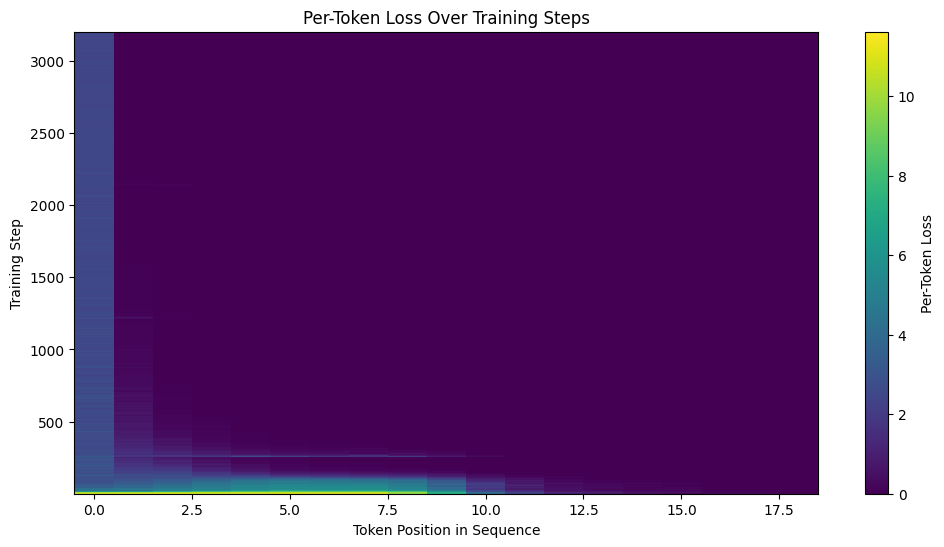

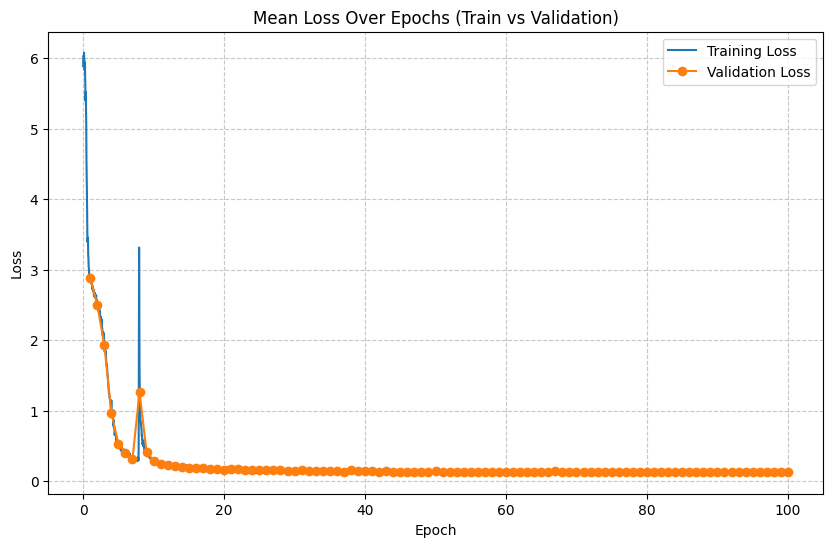

Saved final model at model_checkpoints_fibonacci_mlp_2l/final_model.pt


/tmp/ipykernel_3538275/2538331982.py:159: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from dataclasses import dataclass
from typing import Optional, List, Dict
import torch.optim as optim
from torch.optim import Optimizer
from tqdm.auto import tqdm
from transformer_lens import HookedTransformer, utils
from transformers import GPT2Tokenizer
import torch.nn as nn
import random
import os
import matplotlib.pyplot as plt
import numpy as np


def generate_fibonacci_data(num_samples=1000, seq_len=10):
    sequences = []
    for _ in range(num_samples):
        a = random.randint(0, 9)  
        b = random.randint(0, 9)  
        fib_sequence = [a, b]
        for _ in range(2, seq_len):
            fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
        sequences.append(fib_sequence)
    return sequences


class FibonacciDataset(Dataset):
    def __init__(self, sequences: List[List[int]], tokenizer, max_seq_length):
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length
        self.data = []
        for seq in sequences:
            input_seq = seq[:-1]  
            target_seq = seq[1:]  
            
            input_ids = self.tokenizer.convert_tokens_to_ids([str(num) for num in input_seq])
            target_ids = self.tokenizer.convert_tokens_to_ids([str(num) for num in target_seq])
            
            input_ids = input_ids[:self.max_seq_length]
            target_ids = target_ids[:self.max_seq_length]
            self.data.append({
                "input_ids": torch.tensor(input_ids, dtype=torch.long),
                "target_ids": torch.tensor(target_ids, dtype=torch.long),
            })

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  


max_seq_length = 20  


sequences = generate_fibonacci_data(num_samples=4000, seq_len=max_seq_length)
dataset = FibonacciDataset(sequences, tokenizer, max_seq_length)

from sklearn.model_selection import train_test_split


train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])


def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    target_ids = [item['target_ids'] for item in batch]

    
    input_ids_padded = torch.nn.utils.rnn.pad_sequence(
        input_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    target_ids_padded = torch.nn.utils.rnn.pad_sequence(
        target_ids,
        batch_first=True,
        padding_value=tokenizer.pad_token_id
    )

    
    input_ids_padded = input_ids_padded[:, :max_seq_length]
    if input_ids_padded.size(1) < max_seq_length:
        padding = torch.full(
            (input_ids_padded.size(0), max_seq_length - input_ids_padded.size(1)),
            tokenizer.pad_token_id,
            dtype=torch.long
        )
        input_ids_padded = torch.cat([input_ids_padded, padding], dim=1)

    target_ids_padded = target_ids_padded[:, :max_seq_length]
    if target_ids_padded.size(1) < max_seq_length:
        padding = torch.full(
            ( target_ids_padded.size(0), max_seq_length - target_ids_padded.size(1)),
            tokenizer.pad_token_id,
            dtype=torch.long
        )
        target_ids_padded = torch.cat([target_ids_padded, padding], dim=1)

    return {'input_ids': input_ids_padded, 'target_ids': target_ids_padded}


from transformer_lens.HookedTransformerConfig import HookedTransformerConfig


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=True,
    
    device='cuda' if torch.cuda.is_available() else 'cpu',
)


model = HookedTransformer(model_config)


config = HookedTransformerTrainConfig(
    num_epochs=100,  
    batch_size=100,
    lr=1e-3,
    seed=42,
    optimizer_name='Adam',
    device='cuda' if torch.cuda.is_available() else 'cpu',
    print_every=100,
    save_every=100,  
    save_dir='model_checkpoints_fibonacci_mlp_2l',  
    collate_fn=collate_fn
)


trained_model = train(model, config, train_dataset, val_dataset)


final_model_path = os.path.join(config.save_dir, 'final_model.pt')
torch.save(trained_model.state_dict(), final_model_path)
print(f"Saved final model at {final_model_path}")


def load_model(model_path, model_config):
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model


loaded_model = load_model(final_model_path, model_config)


def test_model(model, tokenizer, input_sequence):
    model.eval()
    with torch.no_grad():
        input_ids = tokenizer.convert_tokens_to_ids(input_sequence)
        input_ids = torch.tensor([input_ids], dtype=torch.long).to(model.cfg.device)
        outputs = model(input_ids)  
        
        logits = outputs[:, :-1, :]  
        
        predicted_ids = logits.argmax(dim=-1).squeeze().tolist()
        
        predicted_tokens = tokenizer.convert_ids_to_tokens(predicted_ids)
        print("Input Sequence: ", input_sequence)
        print("Model Output:   ", predicted_tokens)





/tmp/ipykernel_3538275/3248515196.py:66: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Checkpoint model_checkpoints_fibonacci_attn_2l/model_step_100.pt: Tokens Trained = 200000, Loss = 3.297793388366699
Moving model to device:  cuda
Checkpoint model_checkpoints_fibonacci_attn_2l/model_step_200.pt: Tokens Trained = 400000, Loss = 0.6994730234146118
Moving model to device:  cuda
Checkpoint model_checkpoints_fibonacci_attn_2l/model_step_400.pt: Tokens Trained = 800000, Loss = 0.39328446984291077
Moving model to device:  cuda
Checkpoint model_checkpoints_fibonacci_attn_2l/model_step_600.pt: Tokens Trained = 1200000, Loss = 0.3080987334251404
Moving model to device:  cuda
Checkpoint model_checkpoints_fibonacci_attn_2l/model_step_800.pt: Tokens Trained = 1600000, Loss = 0.2708607017993927
Moving model to device:  cuda
Checkpoint model_checkpoints_fibonacci_attn_2l/model_step_1000.pt: Tokens Trained = 2000000, Loss = 0.26113250851631165
Moving model to device:  cuda
Checkpoint model_checkpoints_fibonacci_attn_2l/model_step_1200.pt: Tokens Trained =

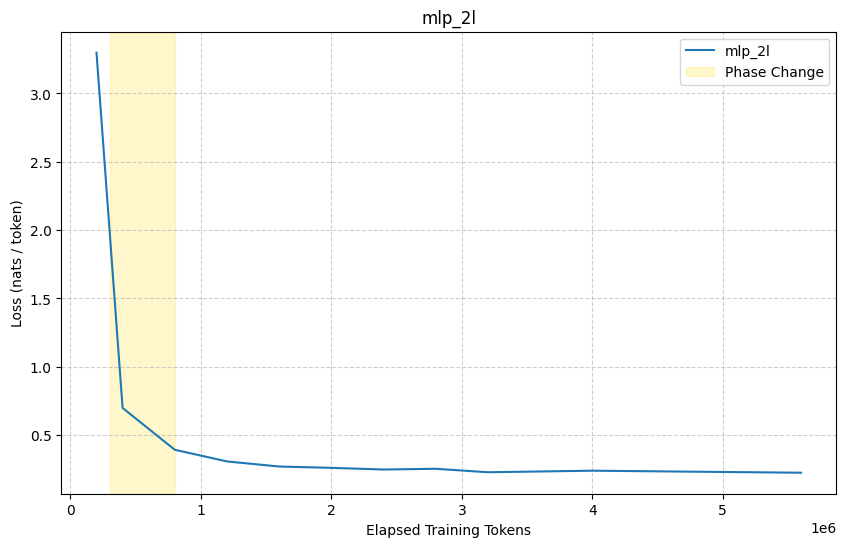

In [ ]:
import torch
from transformer_lens import HookedTransformer
from transformer_lens.HookedTransformerConfig import HookedTransformerConfig
import torch.nn as nn
import os
import plotly.express as px


from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


device = 'cuda' if torch.cuda.is_available() else 'cpu'


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,  
    d_mlp=256,
    n_ctx=max_seq_length + 1,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=True,
    device='cuda' if torch.cuda.is_available() else 'cpu',
)


criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id, reduction='mean')


checkpoint_steps =[100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 2000, 2800, 4000]  
checkpoint_paths = [f'model_checkpoints_fibonacci_attn_2l/model_step_{step}.pt' for step in checkpoint_steps]


losses = []
tokens_trained_on = []


batch_size = config.batch_size  
max_seq_length = max_seq_length  
tokens_per_step = batch_size * max_seq_length  


from torch.utils.data import DataLoader, Subset


eval_dataset = Subset(dataset, range(100))  
eval_dataloader = DataLoader(
    eval_dataset,
    batch_size=batch_size,
    collate_fn=collate_fn,
)

for checkpoint_path, step in zip(checkpoint_paths, checkpoint_steps):
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue

    
    model = HookedTransformer(model_config)
    model.load_state_dict(torch.load(checkpoint_path))
    model.to(device)
    model.eval()

    
    tokens_trained = step * tokens_per_step
    tokens_trained_on.append(tokens_trained)

    
    total_loss = 0
    num_batches = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            inputs = batch["input_ids"].to(device)
            targets = batch["target_ids"].to(device)

            
            outputs = model(inputs)

            
            logits = outputs[:, :-1, :].contiguous()
            targets_shifted = targets[:, 1:].contiguous()

            
            loss = criterion(logits.view(-1, logits.size(-1)), targets_shifted.view(-1))
            total_loss += loss.item()
            num_batches += 1

    average_loss = total_loss / num_batches
    losses.append(average_loss)
    print(f"Checkpoint {checkpoint_path}: Tokens Trained = {tokens_trained}, Loss = {average_loss}")


model_name = 'mlp_2l'
model_to_loss_curve = {model_name: losses}
model_to_tokens_trained_on = {model_name: tokens_trained_on}

import plotly.express as px

import matplotlib.pyplot as plt

for model_name in model_to_loss_curve:
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    losses = model_to_loss_curve[model_name]
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(tokens_trained_on, losses, label=model_name)
    plt.title(model_name)
    plt.xlabel("Elapsed Training Tokens")
    plt.ylabel("Loss (nats / token)")
    
    
    min_loss = min(losses)
    max_loss = max(losses)
    
    
    
    
    
    
    x0, x1 = 0.3e6, 0.8e6  
    plt.axvspan(x0, x1, color='gold', alpha=0.2, label="Phase Change")

    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    
    filename = f"{model_name}.svg"
    plt.savefig(filename, format="svg")
    print(f"Saved plot for {model_name} as {filename}")
    
    
    plt.show()



Saved log-scale plot for mlp_2l as mlp_2l_log_scale.svg


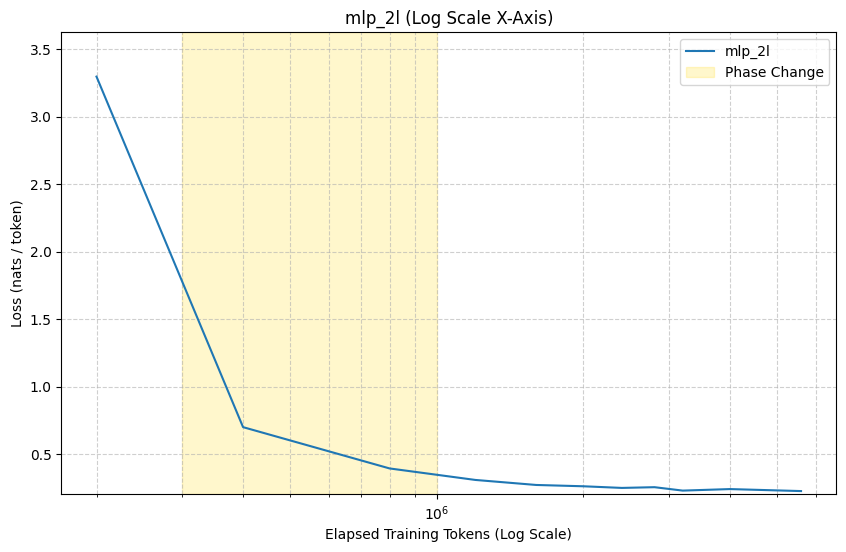

In [ ]:
import matplotlib.pyplot as plt

for model_name in model_to_loss_curve:
    tokens_trained_on = model_to_tokens_trained_on[model_name]
    losses = model_to_loss_curve[model_name]
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(tokens_trained_on, losses, label=model_name)
    plt.title(f"{model_name} (Log Scale X-Axis)")
    plt.xlabel("Elapsed Training Tokens (Log Scale)")
    plt.ylabel("Loss (nats / token)")
    
    
    plt.xscale("log")
    
    
    min_loss = min(losses)
    max_loss = max(losses)
    plt.ylim([min_loss * 0.9, max_loss * 1.1])
    
    
    
    x0, x1 = 3e5, 1e6  
    plt.axvspan(x0, x1, color='gold', alpha=0.2, label="Phase Change")
    
    
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    
    
    filename = f"{model_name}_log_scale.svg"
    plt.savefig(filename, format="svg")
    print(f"Saved log-scale plot for {model_name} as {filename}")
    
    
    plt.show()


/tmp/ipykernel_3538275/3455810861.py:27: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda


/tmp/ipykernel_3538275/3455810861.py:58: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



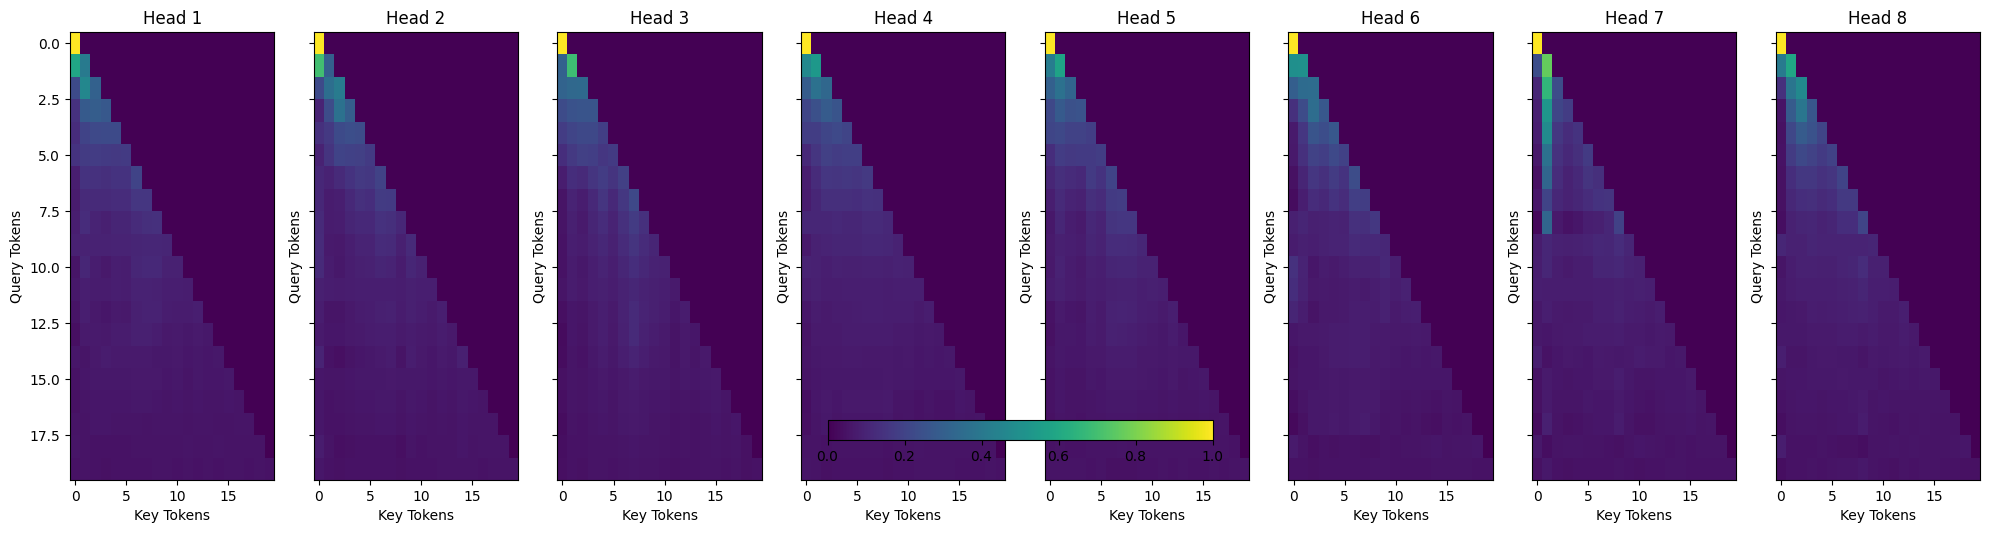

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformer_lens import HookedTransformer


context = torch.tensor([[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]], dtype=torch.long).to(device)  


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,
    d_mlp=256,
    n_ctx=21,
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=True,
    device=device,
)


model = HookedTransformer(model_config)
model.load_state_dict(torch.load("model_checkpoints_fibonacci_attn_2l/model_step_300.pt"))
model.to(device)
model.eval()


with torch.no_grad():
    logits, cache = model.run_with_cache(context)  
    attention_weights = cache["pattern", 0]  


attention_weights_np = attention_weights[0].cpu().numpy()  


num_heads = attention_weights_np.shape[0]
fig, axes = plt.subplots(1, num_heads, figsize=(20, 5), sharey=True)

for head in range(num_heads):
    ax = axes[head]
    heatmap = ax.imshow(
        attention_weights_np[head],
        cmap="viridis",
        aspect="auto",
        vmin=0,
        vmax=1,
    )
    ax.set_title(f"Head {head+1}")
    ax.set_xlabel("Key Tokens")
    ax.set_ylabel("Query Tokens")


fig.colorbar(heatmap, ax=axes, orientation="horizontal", fraction=0.05, pad=0.2)
plt.tight_layout()
plt.show()


In [ ]:
import torch
import numpy as np
import plotly.graph_objects as go
from transformer_lens import HookedTransformer, HookedTransformerConfig


context = torch.tensor([[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]], dtype=torch.long).to(device)


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,
    d_mlp=256,
    n_ctx=21,
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=True,
    device=device,
)


model = HookedTransformer(model_config)
model.load_state_dict(torch.load("model_checkpoints_fibonacci_attn_2l/model_step_300.pt"))
model.to(device)
model.eval()


with torch.no_grad():
    logits, cache = model.run_with_cache(context)  
    attention_weights = cache["pattern", 0]  


attention_weights_np = attention_weights[0].cpu().numpy()  


num_heads = attention_weights_np.shape[0]
fig = go.Figure()

for head in range(num_heads):
    fig.add_trace(go.Heatmap(
        z=attention_weights_np[head],
        colorscale='Viridis',
        colorbar=dict(title='Attention Weight'),
        zmin=0,
        zmax=1,
        name=f'Head {head + 1}',
        hovertemplate='Query Token: %{y}<br>Key Token: %{x}<br>Attention: %{z:.2f}<extra></extra>'
    ))


fig.update_layout(
    title='Attention Weights for Each Head',
    xaxis_title='Key Tokens',
    yaxis_title='Query Tokens',
    height=600,
    width=1200,
    showlegend=True,
)


fig.write_image("attention_weights_plot.png")


fig.show()

/tmp/ipykernel_3538275/1923753698.py:27: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda


In [ ]:
import torch
from torch.nn import CrossEntropyLoss
from transformer_lens import HookedTransformer, HookedTransformerConfig


context = torch.tensor([[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]], dtype=torch.long).to(device)  
gold_labels = context.flip(dims=[1])  


model_config = HookedTransformerConfig(
    n_layers=2,
    n_heads=8,
    d_model=128,
    d_head=16,
    d_mlp=256,
    n_ctx=21,  
    d_vocab=tokenizer.vocab_size,
    act_fn="solu",
    normalization_type=None,
    tokenizer_name="gpt2",
    attn_only=True,
    device=device,
)


model_before_phase_change = HookedTransformer(model_config)
model_before_phase_change.load_state_dict(torch.load("model_checkpoints_fibonacci_attn_2l/model_step_1000.pt"))
model_before_phase_change.to(device)
model_before_phase_change.eval()

model_after_phase_change = HookedTransformer(model_config)
model_after_phase_change.load_state_dict(torch.load("model_checkpoints_fibonacci_attn_2l/model_step_3100.pt"))
model_after_phase_change.to(device)
model_after_phase_change.eval()


criterion = CrossEntropyLoss()


with torch.no_grad():
    
    logits_before = model_before_phase_change(context)  
    logits_after = model_after_phase_change(context)  

    
    logits_before_flat = logits_before.view(-1, logits_before.size(-1))  
    logits_after_flat = logits_after.view(-1, logits_after.size(-1))  
    gold_labels_flat = gold_labels.view(-1)  

    
    loss_vec_before = criterion(logits_before_flat, gold_labels_flat)
    loss_vec_after = criterion(logits_after_flat, gold_labels_flat)


loss_vec_difference = loss_vec_after - loss_vec_before


print("Loss before phase change:", loss_vec_before.item())
print("Loss after phase change:", loss_vec_after.item())
print("Loss difference:", loss_vec_difference.item())


/tmp/ipykernel_3538275/424829598.py:27: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Moving model to device:  cuda
Loss before phase change: 39.88057327270508
Loss after phase change: 37.24181365966797
Loss difference: -2.6387596130371094


/tmp/ipykernel_3538275/424829598.py:32: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



["tensor([   0,    1,    1,    2,    3,    5,    8,   13,   21,   34,   55,   89,\n         144,  233,  377,  610,  987, 1597, 2584, 4181], device='cuda:0')"]


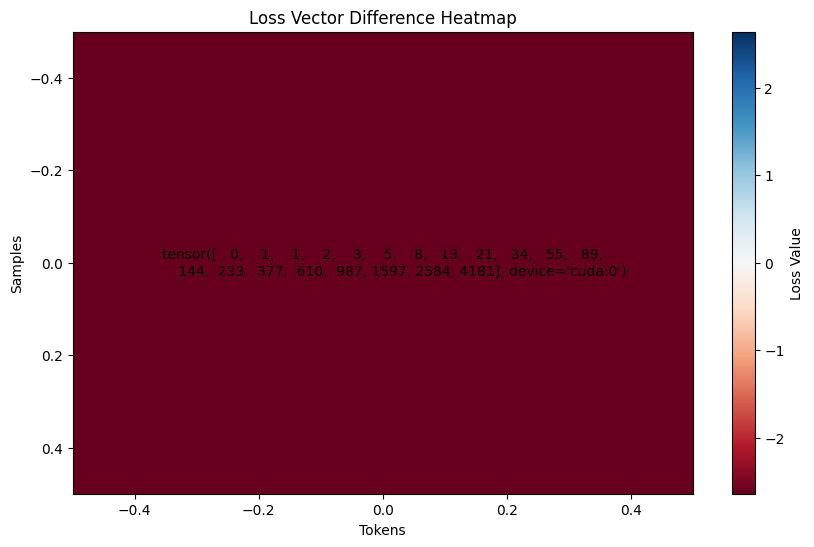

In [ ]:

str_tokens = [str(num) for num in context] 
print(str_tokens)
z = loss_vec_difference.cpu().numpy().reshape(1, -1) 
z_text = np.array(str_tokens * (z.shape[1] // len(str_tokens) + 1))[:z.shape[1]]  


plt.figure(figsize=(10, 6))
heatmap = plt.imshow(z, cmap='RdBu', aspect='auto', vmin=-np.max(np.abs(z)), vmax=np.max(np.abs(z)))


for (i, j), val in np.ndenumerate(z):
    plt.text(j, i, z_text[j], ha='center', va='center', color='black')


plt.colorbar(heatmap, label='Loss Value')


plt.title('Loss Vector Difference Heatmap')
plt.xlabel('Tokens')
plt.ylabel('Samples')


plt.show()

In [124]:
one_idx = max(idx for idx, token in enumerate(context[0]) if token.item() == 0)
ff_idx = max(idx for idx, token in enumerate(context[0]) if token.item() == 13)

In [ ]:
checkpoint_indices = [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600]
tokens_trained_on = []
leys_losses = []
useful_losses = []
mean_losses = []

criterion = torch.nn.CrossEntropyLoss()

def calculate_ce_loss(logits, targets):
    
    logits = logits.view(-1, logits.size(-1))
    targets = targets.view(-1)
    return criterion(logits, targets)

for index in checkpoint_indices:
    print(index)
    
    model_for_this_checkpoint = HookedTransformer(model_config)
    model_for_this_checkpoint.load_state_dict(torch.load(f"model_checkpoints_fibonacci_attn_2l/model_step_{index}.pt"))
    model_for_this_checkpoint.to(device)
    model_for_this_checkpoint.eval()
   
    
    tokens_trained_on_for_this_checkpoint = index * tokens_per_step
    tokens_trained_on.append(tokens_trained_on_for_this_checkpoint)

    
   

    total_leys_loss = 0
    total_useful_loss = 0
    total_mean_loss = 0
    num_batches = 0

   
    for batch in eval_dataloader:
        inputs = batch["input_ids"].to(device)
        targets = batch["target_ids"].to(device)

        
        outputs = model_for_this_checkpoint(inputs)
        logits = outputs[:, :-1, :].contiguous()
        targets_shifted = targets[:, 1:].contiguous()

        
        loss = calculate_ce_loss(logits, targets_shifted)
        total_mean_loss += loss.item()

        
        leys_loss = calculate_ce_loss(logits[:, one_idx - 1, :], targets_shifted[:, one_idx - 1])
        useful_loss = calculate_ce_loss(logits[:, ff_idx - 1, :], targets_shifted[:, ff_idx - 1])

        total_leys_loss += leys_loss.item()
        total_useful_loss += useful_loss.item()
        num_batches += 1

    
    leys_losses.append(total_leys_loss / num_batches)
    useful_losses.append(total_useful_loss / num_batches)
    mean_losses.append(total_mean_loss / num_batches)

    print(f"Checkpoint {index}: Tokens Trained = {tokens_trained_on_for_this_checkpoint}, \
          Leys Loss = {leys_losses[-1]}, Useful Loss = {useful_losses[-1]}, Mean Loss = {mean_losses[-1]}")


model_name = 'attn-only-2l'
model_to_loss_curve = {
    model_name: {
        "leys_losses": leys_losses,
        "useful_losses": useful_losses,
        "mean_losses": mean_losses
    }
}
model_to_tokens_trained_on = {model_name: tokens_trained_on}


100


/tmp/ipykernel_3538275/2924948421.py:19: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Moving model to device:  cuda
Checkpoint 100: Tokens Trained = 200000,           Leys Loss = 16.3896427154541, Useful Loss = 3.7019827365875244, Mean Loss = 8.79106330871582
200
Moving model to device:  cuda
Checkpoint 200: Tokens Trained = 400000,           Leys Loss = 36.26738357543945, Useful Loss = 0.06574812531471252, Mean Loss = 14.80447769165039
400
Moving model to device:  cuda
Checkpoint 400: Tokens Trained = 800000,           Leys Loss = 34.078792572021484, Useful Loss = 0.017884189262986183, Mean Loss = 14.286227226257324
600
Moving model to device:  cuda
Checkpoint 600: Tokens Trained = 1200000,           Leys Loss = 44.481781005859375, Useful Loss = 0.005895947106182575, Mean Loss = 18.132415771484375
800
Moving model to device:  cuda
Checkpoint 800: Tokens Trained = 1600000,           Leys Loss = 47.5326042175293, Useful Loss = 0.0035866827238351107, Mean Loss = 19.593704223632812
1000
Moving model to device:  cuda
Checkpoint 1000: Tokens Trained = 2000000,           Leys

In [ ]:
tokens_trained_on


[200000, 400000, 800000, 1200000, 1600000, 2000000, 2400000, 2800000, 3200000]

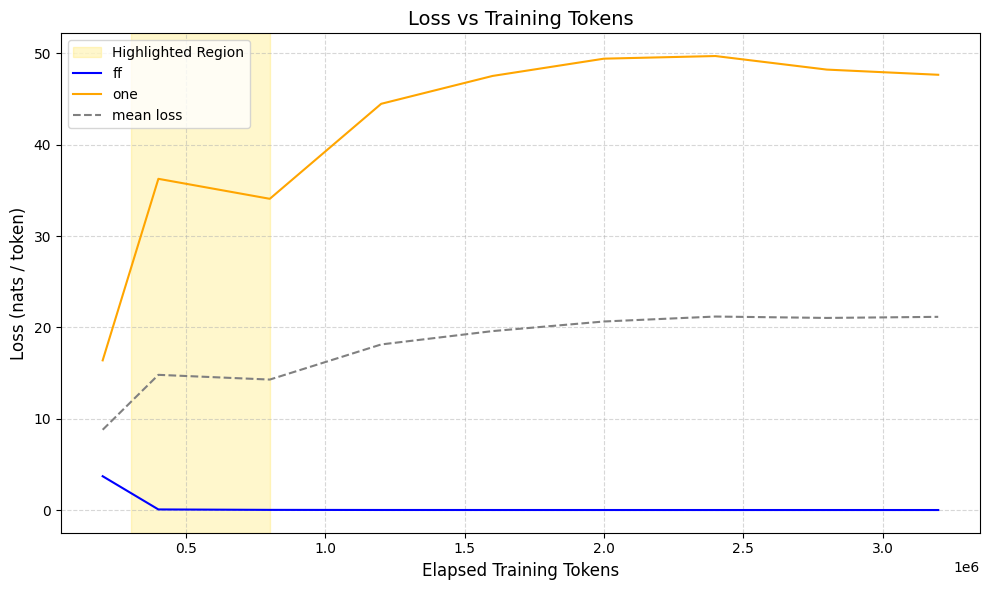

In [ ]:
import matplotlib.pyplot as plt
import numpy as np




plt.figure(figsize=(10, 6))


plt.axvspan(0.3e6, .8e6, color='gold', alpha=0.2, label='Highlighted Region')



plt.plot(tokens_trained_on, useful_losses, label='ff', color='blue')
plt.plot(tokens_trained_on, leys_losses, label='one', color='orange')
plt.plot(tokens_trained_on, mean_losses, label='mean loss', color='gray', linestyle='--')


plt.xlabel('Elapsed Training Tokens', fontsize=12)
plt.ylabel('Loss (nats / token)', fontsize=12)
plt.title('Loss vs Training Tokens', fontsize=14)


plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()